# Preparation 

In [2]:
import rootutils
import os
from biopandas.pdb import PandasPdb
from omegaconf import DictConfig, open_dict

rootutils.setup_root(os.getcwd(), indicator=".project-root", pythonpath=True)

from cogligandbench.utils.data_utils import (
    extract_protein_and_ligands_with_prody,
    parse_inference_inputs_from_dir,
)

from cogligandbench.analysis.complex_alignment import (
    save_aligned_complex,
)

from posebusters.posebusters import PoseBusters


# Test case: 1afb

In [68]:
data_dir = "data/plinder_set_0/"
pred_protein = "/home/aoxu/projects/PoseBench/forks/boltz/inference/plinder_set_0/boltz_results_1afb__1__1.A__1.D_1.F/predictions/1afb__1__1.A__1.D_1.F/1afb__1__1.A__1.D_1.F_model_0.pdb"
ref_protein_path = "/home/aoxu/projects/PoseBench/data/plinder_set/1afb__1__1.A__1.D_1.F/1afb__1__1.A__1.D_1.F_protein.pdb"
ref_ligand_path = "/home/aoxu/projects/PoseBench/data/plinder_set/1afb__1__1.A__1.D_1.F/1afb__1__1.A__1.D_1.F_ligand.sdf"

@> 1207 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-19 20:37:34,158] {logger.py:135} DEBUG - 1207 atoms and 1 coordinate set(s) were parsed in 0.00s.


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


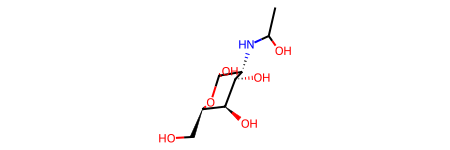

In [69]:
tmp_dir = "/tmp"
extract_protein_and_ligands_with_prody(
    input_pdb_file=pred_protein,
    protein_output_pdb_file=os.path.join(tmp_dir, "pred_protein.pdb"),
    ligands_output_sdf_file=os.path.join(tmp_dir, "pred_ligands.sdf"),
)

In [71]:
assert os.path.exists(ref_ligand_path)
assert os.path.exists(ref_protein_path)

In [ ]:
save_aligned_complex(
    predicted_protein_pdb=os.path.join(tmp_dir, "pred_protein.pdb"),
    predicted_ligand_sdf=os.path.join(tmp_dir, "pred_ligands.sdf"),
    reference_protein_pdb=ref_protein_path,
    reference_ligand_sdf=ref_ligand_path,
)

In [ ]:
pb = PoseBusters(config="redock", top_n=None)
pb.bust(
        mol_pred="/tmp/pred_ligands_aligned.sdf",
        mol_true=ref_ligand_path,
        mol_cond=ref_protein_path,
        full_report=True
) 

/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1642: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1642: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1642: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


,,mol_pred_loaded,mol_true_loaded,mol_cond_loaded,sanitization,all_atoms_connected,molecular_formula,molecular_bonds,double_bond_stereochemistry,tetrahedral_chirality,bond_lengths,...,most_extreme_sum_radii_scaled_waters,most_extreme_relative_distance_waters,most_extreme_clash_waters,volume_overlap_protein,volume_overlap_organic_cofactors,volume_overlap_inorganic_cofactors,volume_overlap_waters,rmsd,kabsch_rmsd,centroid_distance
file,molecule,,,,,,,,,,,,,,,,,,,,,
/tmp/pred_ligands_aligned.sdf,mol_at_pos_0,True,True,True,True,True,False,True,True,False,True,...,3.25,1.262752,False,0.028556,NaN,NaN,NaN,NaN,NaN,0.383036


In [77]:
import os
import numpy as np
from prody import parsePDB
from rdkit import Chem
from rdkit.Chem import AllChem

# compute protein RMSD (CA atoms only)
pred_prot = parsePDB(os.path.join(tmp_dir, "pred_protein.pdb"))
ref_prot = parsePDB(ref_protein_path)
pred_ca = pred_prot.select("name CA")
ref_ca = ref_prot.select("name CA")
diffs = pred_ca.getCoords() - ref_ca.getCoords()
rmsd_protein = np.sqrt((diffs**2).sum(axis=1).mean())

# compute ligand RMSD
pred_lig_path = os.path.join(tmp_dir, "pred_ligands_aligned.sdf")
pred_lig = Chem.SDMolSupplier(pred_lig_path, removeHs=False)[0]
ref_lig = Chem.SDMolSupplier(ref_ligand_path, removeHs=False)[0]
if ref_lig.GetNumConformers() == 0:
    AllChem.EmbedMolecule(ref_lig)
rmsd_ligand = AllChem.GetBestRMS(pred_lig, ref_lig)

print(f"Protein RMSD (CA): {rmsd_protein:.3f} Å")
try:
    rmsd_ligand = AllChem.GetBestRMS(pred_lig, ref_lig)
    print(f"Ligand RMSD: {rmsd_ligand:.3f} Å")
except RuntimeError:
    print("Ligand RMSD: could not be computed (no substructure match)")

@> 1192 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-19 20:37:56,571] {logger.py:135} DEBUG - 1192 atoms and 1 coordinate set(s) were parsed in 0.00s.
@> 1194 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-19 20:37:56,576] {logger.py:135} DEBUG - 1194 atoms and 1 coordinate set(s) were parsed in 0.00s.


RuntimeError: No sub-structure match found between the reference and probe mol

In [75]:
from rdkit.Chem import AllChem

# Method 1: Using AllChem.GetBestRMS
try:
    rmsd_ligand = AllChem.GetBestRMS(pred_lig, ref_lig)
    print("Ligand RMSD (Method 1):", f"{rmsd_ligand:.3f} Å")
except Exception:
    print("Ligand RMSD (Method 1): could not be computed (no match)")

# Method 2: Directly compute RMSD from conformer coordinates
try:
    pred_conf = pred_lig.GetConformer()
    ref_conf = ref_lig.GetConformer()
    pred_coords = np.array(pred_conf.GetPositions())
    ref_coords = np.array(ref_conf.GetPositions())
    rmsd = np.sqrt(np.mean(np.sum((pred_coords - ref_coords)**2, axis=1)))
    print("Ligand RMSD (Method 2):", f"{rmsd:.3f} Å")
except Exception:
    print("Ligand RMSD (Method 2): could not be computed (no match)")


Ligand RMSD (Method 1): could not be computed (no match)
Ligand RMSD (Method 2): 3.999 Å


In [76]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms

# Load the predicted and reference protein structures
u_pred = mda.Universe(f"{tmp_dir}/pred_protein.pdb")
u_ref  = mda.Universe(ref_protein_path)

# Select CA atoms from both structures
sel_pred = u_pred.select_atoms("name CA")
sel_ref  = u_ref.select_atoms("name CA")

# Compute the RMSD between the two selections
rms_obj = rms.RMSD(sel_pred, sel_ref)
rms_obj.run()
print("Protein CA RMSD:", rms_obj.rmsd[-1, -1])


Protein CA RMSD: 7.288222795223699


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/MDAnalysis/analysis/base.py:447: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/MDAnalysis/coordinates/base.py:754: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.time
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


# Extract the ligand and align in each case

In [3]:
os.getcwd()

'/home/aoxu/projects/PoseBench/forks/boltz'

In [9]:
from pathlib import Path
data_dir = Path.cwd().parent.parent / "data" / "plinder_set"
pred_dir = Path.cwd() / "inference" / "plinder_set_0"
print(
    f"Data directory: {data_dir}\n"
    f"Prediction directory: {pred_dir}"
)


Data directory: /home/aoxu/projects/PoseBench/data/plinder_set
Prediction directory: /home/aoxu/projects/PoseBench/forks/boltz/inference/plinder_set_0


In [10]:

# Get all prediction directories
pred_subdirs = [d for d in os.listdir(pred_dir) if os.path.isdir(os.path.join(pred_dir, d)) and d.startswith("boltz_results_")]

for subdir in pred_subdirs:
    # Extract complex ID from directory name (e.g., "boltz_results_1afb__1__1.A__1.D_1.F" -> "1afb__1__1.A__1.D_1.F")
    complex_id = subdir.replace("boltz_results_", "")
    

    # Define paths
    pred_pdb_path = os.path.join(pred_dir, subdir, "predictions", complex_id, f"{complex_id}_model_0.pdb")
    ref_protein_path = os.path.join(data_dir, complex_id, f"{complex_id}_protein.pdb")
    ref_ligand_path = os.path.join(data_dir, complex_id, f"{complex_id}_ligand.sdf")
    
    # Create output directory for this complex
    output_dir = os.path.join(pred_dir, subdir, "predictions", complex_id)
    
    # Check if all required files exist
    if not all(os.path.exists(path) for path in [pred_pdb_path, ref_protein_path, ref_ligand_path]):
        print(f"Skipping {complex_id}: missing files")
        continue
    
    print(f"Processing {complex_id}...")
    
    # Extract protein and ligands from prediction
    extract_protein_and_ligands_with_prody(
        input_pdb_file=pred_pdb_path,
        protein_output_pdb_file=os.path.join(output_dir, f"{complex_id}_extracted_protein.pdb"),
        ligands_output_sdf_file=os.path.join(output_dir, f"{complex_id}_extracted_ligands.sdf"),
    )
    
    print(
        f"Extracted protein and ligands for {complex_id}: "
        f"ref_protein_path: {ref_protein_path}, ref_ligand_path: {ref_ligand_path}"
    )
    # Save aligned complex
    failed_complexes = []
    try:
        save_aligned_complex(
            predicted_protein_pdb=os.path.join(output_dir, f"{complex_id}_extracted_protein.pdb"),
            predicted_ligand_sdf=os.path.join(output_dir, f"{complex_id}_extracted_ligands.sdf"),
            reference_protein_pdb=ref_protein_path,
            reference_ligand_sdf=ref_ligand_path,
        )
    except Exception as e:
        print(f"Error aligning complex for {complex_id}: {e}")
        failed_complexes.append(complex_id)
        continue

@> 2409 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:16,714] {logger.py:135} DEBUG - 2409 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 2xtk__2__1.B__1.L...
Extracted protein and ligands for 2xtk__2__1.B__1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2xtk__2__1.B__1.L/2xtk__2__1.B__1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2xtk__2__1.B__1.L/2xtk__2__1.B__1.L_ligand.sdf
Processing 7qea__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5642 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:16,922] {logger.py:135} DEBUG - 5642 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 7qea__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7qea__1__1.A__1.C/7qea__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7qea__1__1.A__1.C/7qea__1__1.A__1.C_ligand.sdf


@> 1217 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:17,297] {logger.py:135} DEBUG - 1217 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2470 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:17,435] {logger.py:135} DEBUG - 2470 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5ml8__1__1.A__1.B...
Extracted protein and ligands for 5ml8__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ml8__1__1.A__1.B/5ml8__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ml8__1__1.A__1.B/5ml8__1__1.A__1.B_ligand.sdf
Processing 4a61__1__1.A__1.B_1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2252 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:17,631] {logger.py:135} DEBUG - 2252 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 4a61__1__1.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4a61__1__1.A__1.B_1.C/4a61__1__1.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4a61__1__1.A__1.B_1.C/4a61__1__1.A__1.B_1.C_ligand.sdf
Processing 5adv__2__1.C__1.L_1.M_1.N...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4085 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:17,817] {logger.py:135} DEBUG - 4085 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")


Extracted protein and ligands for 5adv__2__1.C__1.L_1.M_1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5adv__2__1.C__1.L_1.M_1.N/5adv__2__1.C__1.L_1.M_1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5adv__2__1.C__1.L_1.M_1.N/5adv__2__1.C__1.L_1.M_1.N_ligand.sdf
Processing 5la7__1__1.A__1.D...
Extracted protein and ligands for 5la7__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5la7__1__1.A__1.D/5la7__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5la7__1__1.A__1.D/5la7__1__1.A__1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3618 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:18,160] {logger.py:135} DEBUG - 3618 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6y87__6__1.F__1.O...
Extracted protein and ligands for 6y87__6__1.F__1.O: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6y87__6__1.F__1.O/6y87__6__1.F__1.O_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6y87__6__1.F__1.O/6y87__6__1.F__1.O_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1191 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:18,427] {logger.py:135} DEBUG - 1191 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 759 atoms and 1 coordinate set(s) 

Processing 5bzq__1__1.A__1.B...
Extracted protein and ligands for 5bzq__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzq__1__1.A__1.B/5bzq__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzq__1__1.A__1.B/5bzq__1__1.A__1.B_ligand.sdf
Processing 1rwo__1__2.A_2.B__2.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 1rwo__1__2.A_2.B__2.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1rwo__1__2.A_2.B__2.C/1rwo__1__2.A_2.B__2.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1rwo__1__2.A_2.B__2.C/1rwo__1__2.A_2.B__2.C_ligand.sdf
Processing 1pj6__1__2.A__2.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 1pj6__1__2.A__2.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1pj6__1__2.A__2.C/1pj6__1__2.A__2.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1pj6__1__2.A__2.C/1pj6__1__2.A__2.C_ligand.sdf


@> 3322 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:19,125] {logger.py:135} DEBUG - 3322 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 8b0d__1__1.A__1.C...
Extracted protein and ligands for 8b0d__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b0d__1__1.A__1.C/8b0d__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b0d__1__1.A__1.C/8b0d__1__1.A__1.C_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4022 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:19,365] {logger.py:135} DEBUG - 4022 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 4xm6__1__1.A__1.B_1.C...
Extracted protein and ligands for 4xm6__1__1.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4xm6__1__1.A__1.B_1.C/4xm6__1__1.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4xm6__1__1.A__1.B_1.C/4xm6__1__1.A__1.B_1.C_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3810 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:19,720] {logger.py:135} DEBUG - 3810 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6gxv__2__1.B__1.D...
Extracted protein and ligands for 6gxv__2__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6gxv__2__1.B__1.D/6gxv__2__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6gxv__2__1.B__1.D/6gxv__2__1.B__1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4748 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:19,967] {logger.py:135} DEBUG - 4748 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 4kgj__1__1.A__1.J...
Extracted protein and ligands for 4kgj__1__1.A__1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4kgj__1__1.A__1.J/4kgj__1__1.A__1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4kgj__1__1.A__1.J/4kgj__1__1.A__1.J_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2483 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:20,242] {logger.py:135} DEBUG - 2483 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1280 atoms and 1 coordinate set(s)

Processing 6yab__2__1.B__1.I...
Extracted protein and ligands for 6yab__2__1.B__1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6yab__2__1.B__1.I/6yab__2__1.B__1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6yab__2__1.B__1.I/6yab__2__1.B__1.I_ligand.sdf
Processing 5j61__3__1.E_1.F__1.M...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 5j61__3__1.E_1.F__1.M: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5j61__3__1.E_1.F__1.M/5j61__3__1.E_1.F__1.M_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5j61__3__1.E_1.F__1.M/5j61__3__1.E_1.F__1.M_ligand.sdf
Processing 3hf8__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1105 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:20,823] {logger.py:135} DEBUG - 1105 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Extracted protein and ligands for 3hf8__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3hf8__1__1.A__1.C/3hf8__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3hf8__1__1.A__1.C/3hf8__1__1.A__1.C_ligand.sdf
Processing 2hmw__1__4.A_4.B__4.D...
Extracted protein and ligands for 2hmw__1__4.A_4.B__4.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2hmw__1__4.A_4.B__4.D/2hmw__1__4.A_4.B__4.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2hmw__1__4.A_4.B__4.D/2hmw__1__4.A_4.B__4.D_ligand.sdf
Processing 8hq3__1__1.C__1.JA...


@> 8073 atoms and 1 coordinate set(s) were parsed in 0.03s.
[2025-06-26 12:59:20,959] {logger.py:135} DEBUG - 8073 atoms and 1 coordinate set(s) were parsed in 0.03s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 8hq3__1__1.C__1.JA: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8hq3__1__1.C__1.JA/8hq3__1__1.C__1.JA_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8hq3__1__1.C__1.JA/8hq3__1__1.C__1.JA_ligand.sdf


@> 5627 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:21,481] {logger.py:135} DEBUG - 5627 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 4zr5__2__1.A__1.G_1.H...
Extracted protein and ligands for 4zr5__2__1.A__1.G_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4zr5__2__1.A__1.G_1.H/4zr5__2__1.A__1.G_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4zr5__2__1.A__1.G_1.H/4zr5__2__1.A__1.G_1.H_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3378 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:21,804] {logger.py:135} DEBUG - 3378 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 4x8d__2__1.B__1.T_1.U_1.V...
Extracted protein and ligands for 4x8d__2__1.B__1.T_1.U_1.V: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4x8d__2__1.B__1.T_1.U_1.V/4x8d__2__1.B__1.T_1.U_1.V_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4x8d__2__1.B__1.T_1.U_1.V/4x8d__2__1.B__1.T_1.U_1.V_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2187 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:22,038] {logger.py:135} DEBUG - 2187 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 3pde__1__1.B__1.J_1.K_1.L_1.M...
Extracted protein and ligands for 3pde__1__1.B__1.J_1.K_1.L_1.M: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3pde__1__1.B__1.J_1.K_1.L_1.M/3pde__1__1.B__1.J_1.K_1.L_1.M_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3pde__1__1.B__1.J_1.K_1.L_1.M/3pde__1__1.B__1.J_1.K_1.L_1.M_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1418 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:22,317] {logger.py:135} DEBUG - 1418 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Processing 4x2a__1__1.A_1.B__1.C_1.E...
Extracted protein and ligands for 4x2a__1__1.A_1.B__1.C_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4x2a__1__1.A_1.B__1.C_1.E/4x2a__1__1.A_1.B__1.C_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4x2a__1__1.A_1.B__1.C_1.E/4x2a__1__1.A_1.B__1.C_1.E_ligand.sdf
Processing 6oug__1__1.A_1.B_1.C_1.D__1.I...
Extracted protein and ligands for 6oug__1__1.A_1.B_1.C_1.D__1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6oug__1__1.A_1.B_1.C_1.D__1.I/6oug__1__1.A_1.B_1.C_1.D__1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6oug__1__1.A_1.B_1.C_1.D__1.I/6oug__1__1.A_1.B_1.C_1.D__1.I_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 8b1e__1__1.A__1.C...
Extracted protein and ligands for 8b1e__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b1e__1__1.A__1.C/8b1e__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b1e__1__1.A__1.C/8b1e__1__1.A__1.C_ligand.sdf


@> 4330 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:22,762] {logger.py:135} DEBUG - 4330 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 3oky__1__2.B__2.C...
Extracted protein and ligands for 3oky__1__2.B__2.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3oky__1__2.B__2.C/3oky__1__2.B__2.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3oky__1__2.B__2.C/3oky__1__2.B__2.C_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4227 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:23,022] {logger.py:135} DEBUG - 4227 atoms and 1 coordinate set(s) were parsed in 0.01s.


Skipping 1siw__1__1.B_1.C__1.L: missing files
Processing 6cfc__1__1.A__1.B...
Extracted protein and ligands for 6cfc__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6cfc__1__1.A__1.B/6cfc__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6cfc__1__1.A__1.B/6cfc__1__1.A__1.B_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2609 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:23,375] {logger.py:135} DEBUG - 2609 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2653 atoms and 1 coordinate set(s)

Processing 8e0t__1__1.B__1.E...
Extracted protein and ligands for 8e0t__1__1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8e0t__1__1.B__1.E/8e0t__1__1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8e0t__1__1.B__1.E/8e0t__1__1.B__1.E_ligand.sdf
Processing 7m2o__1__1.A__1.B_1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4803 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:23,762] {logger.py:135} DEBUG - 4803 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 7m2o__1__1.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7m2o__1__1.A__1.B_1.C/7m2o__1__1.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7m2o__1__1.A__1.B_1.C/7m2o__1__1.A__1.B_1.C_ligand.sdf
Processing 4jsd__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4jsd__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4jsd__1__1.A__1.B/4jsd__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4jsd__1__1.A__1.B/4jsd__1__1.A__1.B_ligand.sdf


@> 5622 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:24,135] {logger.py:135} DEBUG - 5622 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 5jmy__2__1.B__1.M_1.N...
Extracted protein and ligands for 5jmy__2__1.B__1.M_1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5jmy__2__1.B__1.M_1.N/5jmy__2__1.B__1.M_1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5jmy__2__1.B__1.M_1.N/5jmy__2__1.B__1.M_1.N_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 8941 atoms and 1 coordinate set(s) were parsed in 0.03s.
[2025-06-26 12:59:24,463] {logger.py:135} DEBUG - 8941 atoms and 1 coordinate set(s) were parsed in 0.03s.


Processing 5h41__1__1.A__1.C_1.E_1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5h41__1__1.A__1.C_1.E_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5h41__1__1.A__1.C_1.E_1.F/5h41__1__1.A__1.C_1.E_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5h41__1__1.A__1.C_1.E_1.F/5h41__1__1.A__1.C_1.E_1.F_ligand.sdf


@> 1211 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:25,000] {logger.py:135} DEBUG - 1211 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4633 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:25,143] {logger.py:135} DEBUG - 4633 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 1bcj__1__1.B__1.I_1.K...
Extracted protein and ligands for 1bcj__1__1.B__1.I_1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1bcj__1__1.B__1.I_1.K/1bcj__1__1.B__1.I_1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1bcj__1__1.B__1.I_1.K/1bcj__1__1.B__1.I_1.K_ligand.sdf
Processing 7nn0__2__1.B__1.J...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1191 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:25,408] {logger.py:135} DEBUG - 1191 atoms and 1 coordinate set(s) were parsed in 0.00s.


Extracted protein and ligands for 7nn0__2__1.B__1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7nn0__2__1.B__1.J/7nn0__2__1.B__1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7nn0__2__1.B__1.J/7nn0__2__1.B__1.J_ligand.sdf
Processing 5bzm__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3841 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:25,545] {logger.py:135} DEBUG - 3841 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5bzm__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzm__1__1.A__1.B/5bzm__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzm__1__1.A__1.B/5bzm__1__1.A__1.B_ligand.sdf
Processing 6e1a__1__1.A__1.B_1.C_1.G...
Extracted protein and ligands for 6e1a__1__1.A__1.B_1.C_1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6e1a__1__1.A__1.B_1.C_1.G/6e1a__1__1.A__1.B_1.C_1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6e1a__1__1.A__1.B_1.C_1.G/6e1a__1__1.A__1.B_1.C_1.G_ligand.sdf


@> 1191 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:25,878] {logger.py:135} DEBUG - 1191 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 2xd9__1__4.A_4.C__4.F...
Extracted protein and ligands for 2xd9__1__4.A_4.C__4.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2xd9__1__4.A_4.C__4.F/2xd9__1__4.A_4.C__4.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2xd9__1__4.A_4.C__4.F/2xd9__1__4.A_4.C__4.F_ligand.sdf
Skipping 2cix__1__1.A__1.E_1.F_1.S: missing files
Processing 4tlb__1__1.A_1.F__1.V_1.W...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 4tlb__1__1.A_1.F__1.V_1.W: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4tlb__1__1.A_1.F__1.V_1.W/4tlb__1__1.A_1.F__1.V_1.W_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4tlb__1__1.A_1.F__1.V_1.W/4tlb__1__1.A_1.F__1.V_1.W_ligand.sdf
Processing 1zed__1__2.A__2.C...
Extracted protein and ligands for 1zed__1__2.A__2.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1zed__1__2.A__2.C/1zed__1__2.A__2.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1zed__1__2.A__2.C/1zed__1__2.A__2.C_ligand.sdf


@> 3433 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:26,369] {logger.py:135} DEBUG - 3433 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6fl8__1__1.A__1.C_1.D_1.E_1.G...
Extracted protein and ligands for 6fl8__1__1.A__1.C_1.D_1.E_1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fl8__1__1.A__1.C_1.D_1.E_1.G/6fl8__1__1.A__1.C_1.D_1.E_1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fl8__1__1.A__1.C_1.D_1.E_1.G/6fl8__1__1.A__1.C_1.D_1.E_1.G_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3767 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:26,683] {logger.py:135} DEBUG - 3767 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 2yqh__1__1.A__1.C...
Extracted protein and ligands for 2yqh__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2yqh__1__1.A__1.C/2yqh__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2yqh__1__1.A__1.C/2yqh__1__1.A__1.C_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3973 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:26,926] {logger.py:135} DEBUG - 3973 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 1qmg__2__1.D__1.R...
Extracted protein and ligands for 1qmg__2__1.D__1.R: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1qmg__2__1.D__1.R/1qmg__2__1.D__1.R_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1qmg__2__1.D__1.R/1qmg__2__1.D__1.R_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 384 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:27,157] {logger.py:135} DEBUG - 384 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most r

Processing 8r3d__1__1.B_1.E__1.J...
Extracted protein and ligands for 8r3d__1__1.B_1.E__1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8r3d__1__1.B_1.E__1.J/8r3d__1__1.B_1.E__1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8r3d__1__1.B_1.E__1.J/8r3d__1__1.B_1.E__1.J_ligand.sdf
Processing 1qnf__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 1qnf__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1qnf__1__1.A__1.C/1qnf__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1qnf__1__1.A__1.C/1qnf__1__1.A__1.C_ligand.sdf


@> 1851 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:27,587] {logger.py:135} DEBUG - 1851 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 6gwv__3__1.O_1.P__1.CA...
Extracted protein and ligands for 6gwv__3__1.O_1.P__1.CA: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6gwv__3__1.O_1.P__1.CA/6gwv__3__1.O_1.P__1.CA_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6gwv__3__1.O_1.P__1.CA/6gwv__3__1.O_1.P__1.CA_ligand.sdf
Processing 6hmh__1__1.A__1.B_1.D_1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2621 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:27,945] {logger.py:135} DEBUG - 2621 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6hmh__1__1.A__1.B_1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6hmh__1__1.A__1.B_1.D_1.E/6hmh__1__1.A__1.B_1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6hmh__1__1.A__1.B_1.D_1.E/6hmh__1__1.A__1.B_1.D_1.E_ligand.sdf
Processing 3zyg__1__1.A__1.D...
Extracted protein and ligands for 3zyg__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3zyg__1__1.A__1.D/3zyg__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3zyg__1__1.A__1.D/3zyg__1__1.A__1.D_ligand.sdf


@> 2024 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:28,226] {logger.py:135} DEBUG - 2024 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1021 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:28,389] {logger.py:135} DEBUG - 1021 atoms and 1 coordinate set(s) were parsed in 0.00s.


Processing 2gfj__1__1.A__1.C_1.D_1.I...
Extracted protein and ligands for 2gfj__1__1.A__1.C_1.D_1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2gfj__1__1.A__1.C_1.D_1.I/2gfj__1__1.A__1.C_1.D_1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2gfj__1__1.A__1.C_1.D_1.I/2gfj__1__1.A__1.C_1.D_1.I_ligand.sdf
Processing 4j8t__3__1.C__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4369 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:28,525] {logger.py:135} DEBUG - 4369 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4j8t__3__1.C__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4j8t__3__1.C__1.G/4j8t__3__1.C__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4j8t__3__1.C__1.G/4j8t__3__1.C__1.G_ligand.sdf
Processing 3cde__1__1.A__1.C...
Extracted protein and ligands for 3cde__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3cde__1__1.A__1.C/3cde__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3cde__1__1.A__1.C/3cde__1__1.A__1.C_ligand.sdf


@> 3408 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:28,790] {logger.py:135} DEBUG - 3408 atoms and 1 coordinate set(s) were parsed in 0.01s.


Skipping 3ocd__1__1.A__1.E: missing files
Processing 4jaf__1__1.B_3.B__1.H...
Extracted protein and ligands for 4jaf__1__1.B_3.B__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4jaf__1__1.B_3.B__1.H/4jaf__1__1.B_3.B__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4jaf__1__1.B_3.B__1.H/4jaf__1__1.B_3.B__1.H_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 3qw7__1__1.A_1.B__1.B_1.C_1.F_1.G...
Extracted protein and ligands for 3qw7__1__1.A_1.B__1.B_1.C_1.F_1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3qw7__1__1.A_1.B__1.B_1.C_1.F_1.G/3qw7__1__1.A_1.B__1.B_1.C_1.F_1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3qw7__1__1.A_1.B__1.B_1.C_1.F_1.G/3qw7__1__1.A_1.B__1.B_1.C_1.F_1.G_ligand.sdf
Processing 4myw__2__1.C__1.F...
Extracted protein and ligands for 4myw__2__1.C__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4myw__2__1.C__1.F/4myw__2__1.C__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4myw__2__1.C__1.F/4myw__2__1.C__1.F_ligand.sdf


@> 3152 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:29,340] {logger.py:135} DEBUG - 3152 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 2vfs__1__1.A__1.B_1.C...
Extracted protein and ligands for 2vfs__1__1.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2vfs__1__1.A__1.B_1.C/2vfs__1__1.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2vfs__1__1.A__1.B_1.C/2vfs__1__1.A__1.B_1.C_ligand.sdf


@> 2019 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:29,550] {logger.py:135} DEBUG - 2019 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 5lnr__1__3.A_3.D__3.N...
Extracted protein and ligands for 5lnr__1__3.A_3.D__3.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5lnr__1__3.A_3.D__3.N/5lnr__1__3.A_3.D__3.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5lnr__1__3.A_3.D__3.N/5lnr__1__3.A_3.D__3.N_ligand.sdf
Processing 4x90__2__1.B__1.R...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4x90__2__1.B__1.R: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4x90__2__1.B__1.R/4x90__2__1.B__1.R_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4x90__2__1.B__1.R/4x90__2__1.B__1.R_ligand.sdf
Processing 6apl__1__1.A__1.G...


@> 2370 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:29,997] {logger.py:135} DEBUG - 2370 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Extracted protein and ligands for 6apl__1__1.A__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6apl__1__1.A__1.G/6apl__1__1.A__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6apl__1__1.A__1.G/6apl__1__1.A__1.G_ligand.sdf
Processing 7em1__1__1.A__1.D...
Extracted protein and ligands for 7em1__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7em1__1__1.A__1.D/7em1__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7em1__1__1.A__1.D/7em1__1__1.A__1.D_ligand.sdf


@> 6693 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:30,344] {logger.py:135} DEBUG - 6693 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 5nn4__1__1.A__1.D...
Extracted protein and ligands for 5nn4__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5nn4__1__1.A__1.D/5nn4__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5nn4__1__1.A__1.D/5nn4__1__1.A__1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4122 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:30,794] {logger.py:135} DEBUG - 4122 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 4zdk__1__1.B_3.A__3.D_3.F...
Extracted protein and ligands for 4zdk__1__1.B_3.A__3.D_3.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4zdk__1__1.B_3.A__3.D_3.F/4zdk__1__1.B_3.A__3.D_3.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4zdk__1__1.B_3.A__3.D_3.F/4zdk__1__1.B_3.A__3.D_3.F_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 5man__1__1.A__1.B...
Extracted protein and ligands for 5man__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5man__1__1.A__1.B/5man__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5man__1__1.A__1.B/5man__1__1.A__1.B_ligand.sdf


@> 2028 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:31,279] {logger.py:135} DEBUG - 2028 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5uj7__1__1.C__1.K...
Extracted protein and ligands for 5uj7__1__1.C__1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5uj7__1__1.C__1.K/5uj7__1__1.C__1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5uj7__1__1.C__1.K/5uj7__1__1.C__1.K_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4277 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:31,558] {logger.py:135} DEBUG - 4277 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 6iqy__2__1.B__1.S...
Extracted protein and ligands for 6iqy__2__1.B__1.S: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6iqy__2__1.B__1.S/6iqy__2__1.B__1.S_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6iqy__2__1.B__1.S/6iqy__2__1.B__1.S_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1668 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:31,823] {logger.py:135} DEBUG - 1668 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Processing 3ltp__1__1.A_1.B__1.D...
Extracted protein and ligands for 3ltp__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ltp__1__1.A_1.B__1.D/3ltp__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ltp__1__1.A_1.B__1.D/3ltp__1__1.A_1.B__1.D_ligand.sdf
Processing 8ogh__1__1.A_1.B__1.M_1.R...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 8ogh__1__1.A_1.B__1.M_1.R: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ogh__1__1.A_1.B__1.M_1.R/8ogh__1__1.A_1.B__1.M_1.R_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ogh__1__1.A_1.B__1.M_1.R/8ogh__1__1.A_1.B__1.M_1.R_ligand.sdf
Processing 6zxb__1__1.B__1.L_1.N_1.O...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4195 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:32,451] {logger.py:135} DEBUG - 4195 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6zxb__1__1.B__1.L_1.N_1.O: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6zxb__1__1.B__1.L_1.N_1.O/6zxb__1__1.B__1.L_1.N_1.O_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6zxb__1__1.B__1.L_1.N_1.O/6zxb__1__1.B__1.L_1.N_1.O_ligand.sdf
Processing 8ttj__4__1.D__1.CA...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 6058 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:32,714] {logger.py:135} DEBUG - 6058 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 8ttj__4__1.D__1.CA: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ttj__4__1.D__1.CA/8ttj__4__1.D__1.CA_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ttj__4__1.D__1.CA/8ttj__4__1.D__1.CA_ligand.sdf
Processing 3p5p__1__1.A__1.B_1.C_1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 3p5p__1__1.A__1.B_1.C_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3p5p__1__1.A__1.B_1.C_1.E/3p5p__1__1.A__1.B_1.C_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3p5p__1__1.A__1.B_1.C_1.E/3p5p__1__1.A__1.B_1.C_1.E_ligand.sdf


@> 2792 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:33,138] {logger.py:135} DEBUG - 2792 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 3n5h__1__2.A__2.B_2.D...
Extracted protein and ligands for 3n5h__1__2.A__2.B_2.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3n5h__1__2.A__2.B_2.D/3n5h__1__2.A__2.B_2.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3n5h__1__2.A__2.B_2.D/3n5h__1__2.A__2.B_2.D_ligand.sdf
Processing 1wxy__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2816 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:33,333] {logger.py:135} DEBUG - 2816 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2220 atoms and 1 coordinate set(s)

Extracted protein and ligands for 1wxy__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1wxy__1__1.A__1.C/1wxy__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1wxy__1__1.A__1.C/1wxy__1__1.A__1.C_ligand.sdf
Processing 5zk4__2__1.B__1.J_1.N...
Extracted protein and ligands for 5zk4__2__1.B__1.J_1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5zk4__2__1.B__1.J_1.N/5zk4__2__1.B__1.J_1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5zk4__2__1.B__1.J_1.N/5zk4__2__1.B__1.J_1.N_ligand.sdf


@> 2033 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:33,703] {logger.py:135} DEBUG - 2033 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1673 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:33,865] {logger.py:135} DEBUG - 1673 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 1isi__1__1.A__1.C...
Extracted protein and ligands for 1isi__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1isi__1__1.A__1.C/1isi__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1isi__1__1.A__1.C/1isi__1__1.A__1.C_ligand.sdf
Processing 3qmt__1__1.A_1.B__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3qmt__1__1.A_1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3qmt__1__1.A_1.B__1.E/3qmt__1__1.A_1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3qmt__1__1.A_1.B__1.E/3qmt__1__1.A_1.B__1.E_ligand.sdf
Processing 1on6__1__1.A__1.C_1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4488 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:34,278] {logger.py:135} DEBUG - 4488 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 1on6__1__1.A__1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1on6__1__1.A__1.C_1.D/1on6__1__1.A__1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1on6__1__1.A__1.C_1.D/1on6__1__1.A__1.C_1.D_ligand.sdf
Processing 4glx__1__1.D__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1166 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:34,536] {logger.py:135} DEBUG - 1166 atoms and 1 coordinate set(s) were parsed in 0.00s.


Extracted protein and ligands for 4glx__1__1.D__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4glx__1__1.D__1.G/4glx__1__1.D__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4glx__1__1.D__1.G/4glx__1__1.D__1.G_ligand.sdf
Processing 3k42__1__1.B__1.I...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4625 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:34,685] {logger.py:135} DEBUG - 4625 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 3k42__1__1.B__1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3k42__1__1.B__1.I/3k42__1__1.B__1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3k42__1__1.B__1.I/3k42__1__1.B__1.I_ligand.sdf
Processing 3lu6__1__1.A__1.D...
Extracted protein and ligands for 3lu6__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lu6__1__1.A__1.D/3lu6__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lu6__1__1.A__1.D/3lu6__1__1.A__1.D_ligand.sdf


@> 1183 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:35,041] {logger.py:135} DEBUG - 1183 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2062 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:35,174] {logger.py:135} DEBUG - 2062 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 4l0p__1__1.B__1.C...
Extracted protein and ligands for 4l0p__1__1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4l0p__1__1.B__1.C/4l0p__1__1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4l0p__1__1.B__1.C/4l0p__1__1.B__1.C_ligand.sdf
Processing 1omz__2__1.A__1.C_1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1882 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:35,343] {logger.py:135} DEBUG - 1882 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 1omz__2__1.A__1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1omz__2__1.A__1.C_1.D/1omz__2__1.A__1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1omz__2__1.A__1.C_1.D/1omz__2__1.A__1.C_1.D_ligand.sdf
Processing 5w6y__1__1.A_1.B__1.D...
Extracted protein and ligands for 5w6y__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5w6y__1__1.A_1.B__1.D/5w6y__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5w6y__1__1.A_1.B__1.D/5w6y__1__1.A_1.B__1.D_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 4a7g__1__1.B__1.O...
Extracted protein and ligands for 4a7g__1__1.B__1.O: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4a7g__1__1.B__1.O/4a7g__1__1.B__1.O_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4a7g__1__1.B__1.O/4a7g__1__1.B__1.O_ligand.sdf
Processing 1uoo__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 1uoo__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1uoo__1__1.A__1.B/1uoo__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1uoo__1__1.A__1.B/1uoo__1__1.A__1.B_ligand.sdf


@> 1209 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:36,028] {logger.py:135} DEBUG - 1209 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 5ui4__1__1.D_1.F__1.L...
Extracted protein and ligands for 5ui4__1__1.D_1.F__1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ui4__1__1.D_1.F__1.L/5ui4__1__1.D_1.F__1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ui4__1__1.D_1.F__1.L/5ui4__1__1.D_1.F__1.L_ligand.sdf
Processing 8wsm__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2962 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:36,387] {logger.py:135} DEBUG - 2962 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 8wsm__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8wsm__1__1.A__1.D/8wsm__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8wsm__1__1.A__1.D/8wsm__1__1.A__1.D_ligand.sdf
Processing 6pyy__1__1.D__1.P...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2204 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:36,584] {logger.py:135} DEBUG - 2204 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6pyy__1__1.D__1.P: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6pyy__1__1.D__1.P/6pyy__1__1.D__1.P_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6pyy__1__1.D__1.P/6pyy__1__1.D__1.P_ligand.sdf
Processing 8akb__2__1.B__1.K...
Extracted protein and ligands for 8akb__2__1.B__1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8akb__2__1.B__1.K/8akb__2__1.B__1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8akb__2__1.B__1.K/8akb__2__1.B__1.K_ligand.sdf


@> 5339 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:36,764] {logger.py:135} DEBUG - 5339 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 8get__1__1.C__1.P...
Extracted protein and ligands for 8get__1__1.C__1.P: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8get__1__1.C__1.P/8get__1__1.C__1.P_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8get__1__1.C__1.P/8get__1__1.C__1.P_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3634 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:37,160] {logger.py:135} DEBUG - 3634 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 7v0j__3__1.C__1.F...
Extracted protein and ligands for 7v0j__3__1.C__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7v0j__3__1.C__1.F/7v0j__3__1.C__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7v0j__3__1.C__1.F/7v0j__3__1.C__1.F_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3996 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:37,406] {logger.py:135} DEBUG - 3996 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 2xcg__2__1.A_2.A__1.F...
Extracted protein and ligands for 2xcg__2__1.A_2.A__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2xcg__2__1.A_2.A__1.F/2xcg__2__1.A_2.A__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2xcg__2__1.A_2.A__1.F/2xcg__2__1.A_2.A__1.F_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 2yr6__1__1.A__1.D_1.E_1.F...
Extracted protein and ligands for 2yr6__1__1.A__1.D_1.E_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2yr6__1__1.A__1.D_1.E_1.F/2yr6__1__1.A__1.D_1.E_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2yr6__1__1.A__1.D_1.E_1.F/2yr6__1__1.A__1.D_1.E_1.F_ligand.sdf


@> 3497 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:38,009] {logger.py:135} DEBUG - 3497 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 8b18__1__1.A__1.C...
Extracted protein and ligands for 8b18__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b18__1__1.A__1.C/8b18__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b18__1__1.A__1.C/8b18__1__1.A__1.C_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1344 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:38,324] {logger.py:135} DEBUG - 1344 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3320 atoms and 1 coordinate set(s)

Processing 3elm__1__2.A__2.C_2.I...
Extracted protein and ligands for 3elm__1__2.A__2.C_2.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3elm__1__2.A__2.C_2.I/3elm__1__2.A__2.C_2.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3elm__1__2.A__2.C_2.I/3elm__1__2.A__2.C_2.I_ligand.sdf
Processing 8w6p__1__1.A_1.B__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 8w6p__1__1.A_1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8w6p__1__1.A_1.B__1.E/8w6p__1__1.A_1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8w6p__1__1.A_1.B__1.E/8w6p__1__1.A_1.B__1.E_ligand.sdf
Processing 4mlp__1__1.A__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1296 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:38,935] {logger.py:135} DEBUG - 1296 atoms and 1 coordinate set(s) were parsed in 0.00s.


Extracted protein and ligands for 4mlp__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4mlp__1__1.A__1.E/4mlp__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4mlp__1__1.A__1.E/4mlp__1__1.A__1.E_ligand.sdf
Processing 4az3__1__1.A_1.B__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 4az3__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4az3__1__1.A_1.B__1.C/4az3__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4az3__1__1.A_1.B__1.C/4az3__1__1.A_1.B__1.C_ligand.sdf
Processing 4xph__1__1.A__1.J...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3164 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:39,436] {logger.py:135} DEBUG - 3164 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 4xph__1__1.A__1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4xph__1__1.A__1.J/4xph__1__1.A__1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4xph__1__1.A__1.J/4xph__1__1.A__1.J_ligand.sdf
Processing 7tfp__2__1.B_2.C__2.F_2.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 7tfp__2__1.B_2.C__2.F_2.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7tfp__2__1.B_2.C__2.F_2.G/7tfp__2__1.B_2.C__2.F_2.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7tfp__2__1.B_2.C__2.F_2.G/7tfp__2__1.B_2.C__2.F_2.G_ligand.sdf
Processing 5zdq__1__2.A__2.E_2.F_2.G_2.H...
Extracted protein and ligands for 5zdq__1__2.A__2.E_2.F_2.G_2.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5zdq__1__2.A__2.E_2.F_2.G_2.H/5zdq__1__2.A__2.E_2.F_2.G_2.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5zdq__1__2.A__2.E_2.F_2.G_2.H/5zdq__1__2.A__2.E_2.F_2.G_2.H_ligand.sdf


@> 1492 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:39,879] {logger.py:135} DEBUG - 1492 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4264 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:40,038] {logger.py:135} DEBUG - 4264 atoms and 1 coordinate set(s) were parsed in 0.02s.


Skipping 8p0m__1__1.C__1.L: missing files
Processing 7cfd__1__1.A__1.B...
Extracted protein and ligands for 7cfd__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7cfd__1__1.A__1.B/7cfd__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7cfd__1__1.A__1.B/7cfd__1__1.A__1.B_ligand.sdf
Processing 3uel__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1634 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:40,286] {logger.py:135} DEBUG - 1634 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 3uel__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3uel__1__1.A__1.D/3uel__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3uel__1__1.A__1.D/3uel__1__1.A__1.D_ligand.sdf
Processing 2hxd__1__1.A_3.A__1.B_1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 2hxd__1__1.A_3.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2hxd__1__1.A_3.A__1.B_1.C/2hxd__1__1.A_3.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2hxd__1__1.A_3.A__1.B_1.C/2hxd__1__1.A_3.A__1.B_1.C_ligand.sdf
Processing 5ezv__1__1.E__1.K_1.L...
Extracted protein and ligands for 5ezv__1__1.E__1.K_1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ezv__1__1.E__1.K_1.L/5ezv__1__1.E__1.K_1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ezv__1__1.E__1.K_1.L/5ezv__1__1.E__1.K_1.L_ligand.sdf


@> 2535 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:40,688] {logger.py:135} DEBUG - 2535 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1685 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:40,871] {logger.py:135} DEBUG - 1685 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 3n13__1__1.A__1.B...
Extracted protein and ligands for 3n13__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3n13__1__1.A__1.B/3n13__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3n13__1__1.A__1.B/3n13__1__1.A__1.B_ligand.sdf
Processing 3p5y__1__1.A_1.B__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3p5y__1__1.A_1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3p5y__1__1.A_1.B__1.E/3p5y__1__1.A_1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3p5y__1__1.A_1.B__1.E/3p5y__1__1.A_1.B__1.E_ligand.sdf
Processing 8jyf__1__1.B__1.F...
Extracted protein and ligands for 8jyf__1__1.B__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8jyf__1__1.B__1.F/8jyf__1__1.B__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8jyf__1__1.B__1.F/8jyf__1__1.B__1.F_ligand.sdf
Processing 8bnx__1__1.A__1.C...


[2025-06-26 12:59:41,168] {logger.py:135} DEBUG - 3439 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5089 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:41,396] {logger.py:135} DEBUG - 5089 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 8bnx__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8bnx__1__1.A__1.C/8bnx__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8bnx__1__1.A__1.C/8bnx__1__1.A__1.C_ligand.sdf
Processing 7bo7__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 7bo7__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7bo7__1__1.A__1.C/7bo7__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7bo7__1__1.A__1.C/7bo7__1__1.A__1.C_ligand.sdf


@> 4870 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:41,814] {logger.py:135} DEBUG - 4870 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 6h15__1__1.D__1.G...
Extracted protein and ligands for 6h15__1__1.D__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6h15__1__1.D__1.G/6h15__1__1.D__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6h15__1__1.D__1.G/6h15__1__1.D__1.G_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1238 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:42,088] {logger.py:135} DEBUG - 1238 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Processing 5v3a__2__2.C_3.C_3.D__3.L...
Extracted protein and ligands for 5v3a__2__2.C_3.C_3.D__3.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5v3a__2__2.C_3.C_3.D__3.L/5v3a__2__2.C_3.C_3.D__3.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5v3a__2__2.C_3.C_3.D__3.L/5v3a__2__2.C_3.C_3.D__3.L_ligand.sdf
Processing 7vbv__1__1.B__1.N...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2679 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:42,500] {logger.py:135} DEBUG - 2679 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 7vbv__1__1.B__1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7vbv__1__1.B__1.N/7vbv__1__1.B__1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7vbv__1__1.B__1.N/7vbv__1__1.B__1.N_ligand.sdf
Processing 8e1v__1__1.A__1.C_1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2681 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:42,697] {logger.py:135} DEBUG - 2681 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 8e1v__1__1.A__1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8e1v__1__1.A__1.C_1.D/8e1v__1__1.A__1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8e1v__1__1.A__1.C_1.D/8e1v__1__1.A__1.C_1.D_ligand.sdf
Processing 6boi__1__1.A__1.C...
Extracted protein and ligands for 6boi__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6boi__1__1.A__1.C/6boi__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6boi__1__1.A__1.C/6boi__1__1.A__1.C_ligand.sdf


@> 728 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:42,878] {logger.py:135} DEBUG - 728 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1718 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:42,999] {logger.py:135} DEBUG - 1718 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6zc8__1__1.A__1.C...
Extracted protein and ligands for 6zc8__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6zc8__1__1.A__1.C/6zc8__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6zc8__1__1.A__1.C/6zc8__1__1.A__1.C_ligand.sdf
Processing 2yc5__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1068 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:43,155] {logger.py:135} DEBUG - 1068 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2810 atoms and 1 coordinate set(s)

Extracted protein and ligands for 2yc5__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2yc5__1__1.A__1.B/2yc5__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2yc5__1__1.A__1.B/2yc5__1__1.A__1.B_ligand.sdf
Processing 3elh__2__1.F__1.Q_1.R...
Extracted protein and ligands for 3elh__2__1.F__1.Q_1.R: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3elh__2__1.F__1.Q_1.R/3elh__2__1.F__1.Q_1.R_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3elh__2__1.F__1.Q_1.R/3elh__2__1.F__1.Q_1.R_ligand.sdf
Processing 2ada__1__1.A__1.B_1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2671 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:43,571] {logger.py:135} DEBUG - 2671 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 2ada__1__1.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2ada__1__1.A__1.B_1.C/2ada__1__1.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2ada__1__1.A__1.B_1.C/2ada__1__1.A__1.B_1.C_ligand.sdf
Skipping 2uag__1__1.A__1.B_1.D: missing files
Processing 6f5w__1__1.B__1.HA...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1676 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:43,758] {logger.py:135} DEBUG - 1676 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6f5w__1__1.B__1.HA: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6f5w__1__1.B__1.HA/6f5w__1__1.B__1.HA_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6f5w__1__1.B__1.HA/6f5w__1__1.B__1.HA_ligand.sdf
Processing 3p60__1__1.A_1.B__1.D...
Extracted protein and ligands for 3p60__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3p60__1__1.A_1.B__1.D/3p60__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3p60__1__1.A_1.B__1.D/3p60__1__1.A_1.B__1.D_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 5ayc__1__2.A_3.A__2.B_2.C...
Extracted protein and ligands for 5ayc__1__2.A_3.A__2.B_2.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ayc__1__2.A_3.A__2.B_2.C/5ayc__1__2.A_3.A__2.B_2.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ayc__1__2.A_3.A__2.B_2.C/5ayc__1__2.A_3.A__2.B_2.C_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 5e62__2__2.C_2.D_3.D__3.N...
Extracted protein and ligands for 5e62__2__2.C_2.D_3.D__3.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5e62__2__2.C_2.D_3.D__3.N/5e62__2__2.C_2.D_3.D__3.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5e62__2__2.C_2.D_3.D__3.N/5e62__2__2.C_2.D_3.D__3.N_ligand.sdf
Processing 3qcp__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1084 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:44,514] {logger.py:135} DEBUG - 1084 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 3qcp__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3qcp__1__1.A__1.B/3qcp__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3qcp__1__1.A__1.B/3qcp__1__1.A__1.B_ligand.sdf
Processing 5bvb__1__1.A__1.E...
Extracted protein and ligands for 5bvb__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bvb__1__1.A__1.E/5bvb__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bvb__1__1.A__1.E/5bvb__1__1.A__1.E_ligand.sdf


@> 4905 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:44,663] {logger.py:135} DEBUG - 4905 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 4hsi__2__1.B_2.B__2.K...
Extracted protein and ligands for 4hsi__2__1.B_2.B__2.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4hsi__2__1.B_2.B__2.K/4hsi__2__1.B_2.B__2.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4hsi__2__1.B_2.B__2.K/4hsi__2__1.B_2.B__2.K_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 1g4t__2__1.B__1.F_1.G_1.H...
Extracted protein and ligands for 1g4t__2__1.B__1.F_1.G_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1g4t__2__1.B__1.F_1.G_1.H/1g4t__2__1.B__1.F_1.G_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1g4t__2__1.B__1.F_1.G_1.H/1g4t__2__1.B__1.F_1.G_1.H_ligand.sdf
Skipping 7nim__1__1.A__1.C: missing files
Processing 7t8f__1__1.A_1.B__1.E_1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 7t8f__1__1.A_1.B__1.E_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7t8f__1__1.A_1.B__1.E_1.H/7t8f__1__1.A_1.B__1.E_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7t8f__1__1.A_1.B__1.E_1.H/7t8f__1__1.A_1.B__1.E_1.H_ligand.sdf
Processing 1lhu__1__2.A__2.C...
Extracted protein and ligands for 1lhu__1__2.A__2.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1lhu__1__2.A__2.C/1lhu__1__2.A__2.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1lhu__1__2.A__2.C/1lhu__1__2.A__2.C_ligand.sdf
Processing 3v1p__1__1.A_1.B__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3v1p__1__1.A_1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3v1p__1__1.A_1.B__1.E/3v1p__1__1.A_1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3v1p__1__1.A_1.B__1.E/3v1p__1__1.A_1.B__1.E_ligand.sdf
Processing 6i5p__4__1.G__1.H...
Extracted protein and ligands for 6i5p__4__1.G__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i5p__4__1.G__1.H/6i5p__4__1.G__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i5p__4__1.G__1.H/6i5p__4__1.G__1.H_ligand.sdf
Processing 6iil__1__1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1665 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:45,980] {logger.py:135} DEBUG - 1665 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6iil__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6iil__1__1.B__1.D/6iil__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6iil__1__1.B__1.D/6iil__1__1.B__1.D_ligand.sdf
Processing 3li1__1__1.A_1.B__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3li1__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3li1__1__1.A_1.B__1.C/3li1__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3li1__1__1.A_1.B__1.C/3li1__1__1.A_1.B__1.C_ligand.sdf
Processing 3rlu__1__1.A_1.B__1.D...
Extracted protein and ligands for 3rlu__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3rlu__1__1.A_1.B__1.D/3rlu__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3rlu__1__1.A_1.B__1.D/3rlu__1__1.A_1.B__1.D_ligand.sdf
Processing 4tn2__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2542 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:46,514] {logger.py:135} DEBUG - 2542 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 4tn2__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4tn2__1__1.A__1.B/4tn2__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4tn2__1__1.A__1.B/4tn2__1__1.A__1.B_ligand.sdf
Processing 6g3y__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2688 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:46,787] {logger.py:135} DEBUG - 2688 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6g3y__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6g3y__1__1.A__1.D/6g3y__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6g3y__1__1.A__1.D/6g3y__1__1.A__1.D_ligand.sdf
Processing 3it3__1__1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5272 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:47,002] {logger.py:135} DEBUG - 5272 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 3it3__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3it3__1__1.B__1.D/3it3__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3it3__1__1.B__1.D/3it3__1__1.B__1.D_ligand.sdf
Processing 5wgu__1__1.A__1.N...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3431 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:47,295] {logger.py:135} DEBUG - 3431 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 5wgu__1__1.A__1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5wgu__1__1.A__1.N/5wgu__1__1.A__1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5wgu__1__1.A__1.N/5wgu__1__1.A__1.N_ligand.sdf
Processing 6x6v__3__1.C__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3553 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6x6v__3__1.C__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6x6v__3__1.C__1.G/6x6v__3__1.C__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6x6v__3__1.C__1.G/6x6v__3__1.C__1.G_ligand.sdf
Processing 7r2v__2__1.B__1.L...


[2025-06-26 12:59:47,605] {logger.py:135} DEBUG - 3553 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1754 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:47,827] {logger.py:135} DEBUG - 1754 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 7r2v__2__1.B__1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7r2v__2__1.B__1.L/7r2v__2__1.B__1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7r2v__2__1.B__1.L/7r2v__2__1.B__1.L_ligand.sdf
Processing 4lrh__4__1.D__1.T...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2210 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:47,984] {logger.py:135} DEBUG - 2210 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4lrh__4__1.D__1.T: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4lrh__4__1.D__1.T/4lrh__4__1.D__1.T_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4lrh__4__1.D__1.T/4lrh__4__1.D__1.T_ligand.sdf
Processing 7vjt__1__1.A__1.C...
Extracted protein and ligands for 7vjt__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7vjt__1__1.A__1.C/7vjt__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7vjt__1__1.A__1.C/7vjt__1__1.A__1.C_ligand.sdf


@> 3493 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:48,163] {logger.py:135} DEBUG - 3493 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 8b1f__1__1.A__1.C...
Extracted protein and ligands for 8b1f__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b1f__1__1.A__1.C/8b1f__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b1f__1__1.A__1.C/8b1f__1__1.A__1.C_ligand.sdf


@> 3311 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:48,478] {logger.py:135} DEBUG - 3311 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 7wmi__1__1.B__1.F_1.G...
Extracted protein and ligands for 7wmi__1__1.B__1.F_1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7wmi__1__1.B__1.F_1.G/7wmi__1__1.B__1.F_1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7wmi__1__1.B__1.F_1.G/7wmi__1__1.B__1.F_1.G_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5032 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:48,708] {logger.py:135} DEBUG - 5032 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 5odi__1__1.A_1.G__1.N...
Extracted protein and ligands for 5odi__1__1.A_1.G__1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5odi__1__1.A_1.G__1.N/5odi__1__1.A_1.G__1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5odi__1__1.A_1.G__1.N/5odi__1__1.A_1.G__1.N_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 3vv0__1__1.A__1.B...
Extracted protein and ligands for 3vv0__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3vv0__1__1.A__1.B/3vv0__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3vv0__1__1.A__1.B/3vv0__1__1.A__1.B_ligand.sdf


@> 2818 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:49,219] {logger.py:135} DEBUG - 2818 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 4ffo__1__1.A__1.B_1.C_1.D_1.E...
Extracted protein and ligands for 4ffo__1__1.A__1.B_1.C_1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ffo__1__1.A__1.B_1.C_1.D_1.E/4ffo__1__1.A__1.B_1.C_1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ffo__1__1.A__1.B_1.C_1.D_1.E/4ffo__1__1.A__1.B_1.C_1.D_1.E_ligand.sdf
Processing 1kv3__2__1.B_1.F__1.L...


@> 5172 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:49,426] {logger.py:135} DEBUG - 5172 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Extracted protein and ligands for 1kv3__2__1.B_1.F__1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1kv3__2__1.B_1.F__1.L/1kv3__2__1.B_1.F__1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1kv3__2__1.B_1.F__1.L/1kv3__2__1.B_1.F__1.L_ligand.sdf
Processing 4z2l__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4z2l__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4z2l__1__1.A__1.B/4z2l__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4z2l__1__1.A__1.B/4z2l__1__1.A__1.B_ligand.sdf


@> 4287 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:50,039] {logger.py:135} DEBUG - 4287 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 4xp1__1__1.A__1.N...
Extracted protein and ligands for 4xp1__1__1.A__1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4xp1__1__1.A__1.N/4xp1__1__1.A__1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4xp1__1__1.A__1.N/4xp1__1__1.A__1.N_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1633 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:50,286] {logger.py:135} DEBUG - 1633 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Processing 2oz2__1__2.A_2.B__2.F_2.L...
Extracted protein and ligands for 2oz2__1__2.A_2.B__2.F_2.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2oz2__1__2.A_2.B__2.F_2.L/2oz2__1__2.A_2.B__2.F_2.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2oz2__1__2.A_2.B__2.F_2.L/2oz2__1__2.A_2.B__2.F_2.L_ligand.sdf
Processing 5hmw__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5hmw__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5hmw__1__1.A__1.D/5hmw__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5hmw__1__1.A__1.D/5hmw__1__1.A__1.D_ligand.sdf


@> 2772 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:50,788] {logger.py:135} DEBUG - 2772 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5f2n__1__1.B__1.E_1.F...
Extracted protein and ligands for 5f2n__1__1.B__1.E_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5f2n__1__1.B__1.E_1.F/5f2n__1__1.B__1.E_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5f2n__1__1.B__1.E_1.F/5f2n__1__1.B__1.E_1.F_ligand.sdf
Processing 8bf4__1__1.B__1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3726 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:50,987] {logger.py:135} DEBUG - 3726 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4107 atoms and 1 coordinate set(s)

Extracted protein and ligands for 8bf4__1__1.B__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8bf4__1__1.B__1.H/8bf4__1__1.B__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8bf4__1__1.B__1.H/8bf4__1__1.B__1.H_ligand.sdf
Processing 1esw__1__1.A__1.B_1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5463 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:51,559] {logger.py:135} DEBUG - 5463 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 1esw__1__1.A__1.B_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1esw__1__1.A__1.B_1.D/1esw__1__1.A__1.B_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1esw__1__1.A__1.B_1.D/1esw__1__1.A__1.B_1.D_ligand.sdf
Processing 4s3q__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2563 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:51,860] {logger.py:135} DEBUG - 2563 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 4s3q__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4s3q__1__1.A__1.D/4s3q__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4s3q__1__1.A__1.D/4s3q__1__1.A__1.D_ligand.sdf
Processing 6wuu__1__1.A__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1190 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:52,130] {logger.py:135} DEBUG - 1190 atoms and 1 coordinate set(s) were parsed in 0.00s.


Extracted protein and ligands for 6wuu__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6wuu__1__1.A__1.E/6wuu__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6wuu__1__1.A__1.E/6wuu__1__1.A__1.E_ligand.sdf
Processing 5bzj__1__1.A__1.D_1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3257 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:52,272] {logger.py:135} DEBUG - 3257 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5bzj__1__1.A__1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzj__1__1.A__1.D_1.E/5bzj__1__1.A__1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzj__1__1.A__1.D_1.E/5bzj__1__1.A__1.D_1.E_ligand.sdf
Processing 4fz0__1__1.B__1.K...
Extracted protein and ligands for 4fz0__1__1.B__1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4fz0__1__1.B__1.K/4fz0__1__1.B__1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4fz0__1__1.B__1.K/4fz0__1__1.B__1.K_ligand.sdf


@> 2120 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:52,493] {logger.py:135} DEBUG - 2120 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2840 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:52,667] {logger.py:135} DEBUG - 2840 atoms and 1 coordinate set(s) were parsed in 0.01s.


Skipping 5oef__2__1.B__1.K_1.L: missing files
Processing 5d4v__2__1.B__1.I_1.L...
Extracted protein and ligands for 5d4v__2__1.B__1.I_1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5d4v__2__1.B__1.I_1.L/5d4v__2__1.B__1.I_1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5d4v__2__1.B__1.I_1.L/5d4v__2__1.B__1.I_1.L_ligand.sdf
Processing 8gmi__1__1.B__1.K...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4987 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:52,882] {logger.py:135} DEBUG - 4987 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 8gmi__1__1.B__1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8gmi__1__1.B__1.K/8gmi__1__1.B__1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8gmi__1__1.B__1.K/8gmi__1__1.B__1.K_ligand.sdf
Skipping 3ayg__2__2.A__2.B_2.C_2.E: missing files
Processing 6qp8__1__1.B__1.I...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6qp8__1__1.B__1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6qp8__1__1.B__1.I/6qp8__1__1.B__1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6qp8__1__1.B__1.I/6qp8__1__1.B__1.I_ligand.sdf


@> 2717 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:53,259] {logger.py:135} DEBUG - 2717 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 2y38__1__1.A__1.B...
Extracted protein and ligands for 2y38__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2y38__1__1.A__1.B/2y38__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2y38__1__1.A__1.B/2y38__1__1.A__1.B_ligand.sdf
Processing 8a0v__2__1.B__1.L...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1720 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:53,452] {logger.py:135} DEBUG - 1720 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3390 atoms and 1 coordinate set(s)

Extracted protein and ligands for 8a0v__2__1.B__1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8a0v__2__1.B__1.L/8a0v__2__1.B__1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8a0v__2__1.B__1.L/8a0v__2__1.B__1.L_ligand.sdf
Processing 1v3e__1__1.B__1.I...
Extracted protein and ligands for 1v3e__1__1.B__1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1v3e__1__1.B__1.I/1v3e__1__1.B__1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1v3e__1__1.B__1.I/1v3e__1__1.B__1.I_ligand.sdf


@> 6012 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 12:59:53,846] {logger.py:135} DEBUG - 6012 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 1zxv__1__1.A__1.C_1.D...
Extracted protein and ligands for 1zxv__1__1.A__1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1zxv__1__1.A__1.C_1.D/1zxv__1__1.A__1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1zxv__1__1.A__1.C_1.D/1zxv__1__1.A__1.C_1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 8193 atoms and 1 coordinate set(s) were parsed in 0.03s.
[2025-06-26 12:59:54,282] {logger.py:135} DEBUG - 8193 atoms and 1 coordinate set(s) were parsed in 0.03s.


Processing 1qwu__1__1.A__1.C_1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 1qwu__1__1.A__1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1qwu__1__1.A__1.C_1.D/1qwu__1__1.A__1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1qwu__1__1.A__1.C_1.D/1qwu__1__1.A__1.C_1.D_ligand.sdf


@> 3829 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:54,794] {logger.py:135} DEBUG - 3829 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6x5u__4__2.F__2.X...
Extracted protein and ligands for 6x5u__4__2.F__2.X: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6x5u__4__2.F__2.X/6x5u__4__2.F__2.X_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6x5u__4__2.F__2.X/6x5u__4__2.F__2.X_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1242 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:55,032] {logger.py:135} DEBUG - 1242 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3751 atoms and 1 coordinate set(s)

Processing 6w8z__1__1.A__1.E...
Extracted protein and ligands for 6w8z__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6w8z__1__1.A__1.E/6w8z__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6w8z__1__1.A__1.E/6w8z__1__1.A__1.E_ligand.sdf
Skipping 1h33__1__1.A__1.D: missing files
Skipping 3lgm__1__1.A__1.C: missing files
Processing 4xqc__1__1.B__1.J...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2216 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:55,420] {logger.py:135} DEBUG - 2216 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 4xqc__1__1.B__1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4xqc__1__1.B__1.J/4xqc__1__1.B__1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4xqc__1__1.B__1.J/4xqc__1__1.B__1.J_ligand.sdf
Processing 2nw8__1__1.A_1.B_2.A__2.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 2nw8__1__1.A_1.B_2.A__2.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2nw8__1__1.A_1.B_2.A__2.D/2nw8__1__1.A_1.B_2.A__2.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2nw8__1__1.A_1.B_2.A__2.D/2nw8__1__1.A_1.B_2.A__2.D_ligand.sdf
Processing 7rtc__2__1.B__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1561 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:55,894] {logger.py:135} DEBUG - 1561 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 7rtc__2__1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7rtc__2__1.B__1.E/7rtc__2__1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7rtc__2__1.B__1.E/7rtc__2__1.B__1.E_ligand.sdf
Skipping 4hjh__2__1.B__1.IC: missing files
Skipping 2xpc__1__1.A__1.B_1.D: missing files
Processing 7oa4__4__1.D__1.S_1.T_1.U_1.V...
Extracted protein and ligands for 7oa4__4__1.D__1.S_1.T_1.U_1.V: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7oa4__4__1.D__1.S_1.T_1.U_1.V/7oa4__4__1.D__1.S_1.T_1.U_1.V_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7oa4__4__1.D__1.S_1.T_1.U_1.V/7oa4__4__1.D__1.S_1.T_1.U_1.V_ligand.sdf


@> 3588 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:56,059] {logger.py:135} DEBUG - 3588 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 5m8l__4__1.D__1.U...
Extracted protein and ligands for 5m8l__4__1.D__1.U: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5m8l__4__1.D__1.U/5m8l__4__1.D__1.U_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5m8l__4__1.D__1.U/5m8l__4__1.D__1.U_ligand.sdf


@> 3027 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:56,291] {logger.py:135} DEBUG - 3027 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6pe3__1__1.A__1.B...
Extracted protein and ligands for 6pe3__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6pe3__1__1.A__1.B/6pe3__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6pe3__1__1.A__1.B/6pe3__1__1.A__1.B_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1142 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:56,593] {logger.py:135} DEBUG - 1142 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3033 atoms and 1 coordinate set(s)

Processing 7rgy__1__1.A__1.D...
Extracted protein and ligands for 7rgy__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7rgy__1__1.A__1.D/7rgy__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7rgy__1__1.A__1.D/7rgy__1__1.A__1.D_ligand.sdf
Processing 4x91__2__1.B__1.Q...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1911 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:56,932] {logger.py:135} DEBUG - 1911 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4x91__2__1.B__1.Q: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4x91__2__1.B__1.Q/4x91__2__1.B__1.Q_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4x91__2__1.B__1.Q/4x91__2__1.B__1.Q_ligand.sdf
Processing 1jcl__1__1.A__1.C...
Extracted protein and ligands for 1jcl__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1jcl__1__1.A__1.C/1jcl__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1jcl__1__1.A__1.C/1jcl__1__1.A__1.C_ligand.sdf


@> 2558 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:57,093] {logger.py:135} DEBUG - 2558 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 5u1y__1__1.A_2.A__2.E...
Extracted protein and ligands for 5u1y__1__1.A_2.A__2.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5u1y__1__1.A_2.A__2.E/5u1y__1__1.A_2.A__2.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5u1y__1__1.A_2.A__2.E/5u1y__1__1.A_2.A__2.E_ligand.sdf
Processing 2x0u__2__1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2633 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:57,491] {logger.py:135} DEBUG - 2633 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 2x0u__2__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2x0u__2__1.B__1.D/2x0u__2__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2x0u__2__1.B__1.D/2x0u__2__1.B__1.D_ligand.sdf
Processing 3l9h__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2464 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:57,676] {logger.py:135} DEBUG - 2464 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 3l9h__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3l9h__1__1.A__1.D/3l9h__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3l9h__1__1.A__1.D/3l9h__1__1.A__1.D_ligand.sdf
Processing 2ya3__1__1.C__1.D...
Extracted protein and ligands for 2ya3__1__1.C__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2ya3__1__1.C__1.D/2ya3__1__1.C__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2ya3__1__1.C__1.D/2ya3__1__1.C__1.D_ligand.sdf


@> 798 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:57,855] {logger.py:135} DEBUG - 798 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.mess

Processing 8eg6__2__1.G_1.H__1.AA...
Extracted protein and ligands for 8eg6__2__1.G_1.H__1.AA: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8eg6__2__1.G_1.H__1.AA/8eg6__2__1.G_1.H__1.AA_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8eg6__2__1.G_1.H__1.AA/8eg6__2__1.G_1.H__1.AA_ligand.sdf
Processing 4ise__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 7453 atoms and 1 coordinate set(s) were parsed in 0.03s.
[2025-06-26 12:59:58,204] {logger.py:135} DEBUG - 7453 atoms and 1 coordinate set(s) were parsed in 0.03s.


Extracted protein and ligands for 4ise__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ise__1__1.A__1.C/4ise__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ise__1__1.A__1.C/4ise__1__1.A__1.C_ligand.sdf
Processing 6i35__2__1.C__1.N_1.P...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6i35__2__1.C__1.N_1.P: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i35__2__1.C__1.N_1.P/6i35__2__1.C__1.N_1.P_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i35__2__1.C__1.N_1.P/6i35__2__1.C__1.N_1.P_ligand.sdf


@> 1690 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 12:59:58,676] {logger.py:135} DEBUG - 1690 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 3p5z__1__1.A_1.B__1.C...
Extracted protein and ligands for 3p5z__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3p5z__1__1.A_1.B__1.C/3p5z__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3p5z__1__1.A_1.B__1.C/3p5z__1__1.A_1.B__1.C_ligand.sdf
Processing 5f9t__2__1.B__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5f9t__2__1.B__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5f9t__2__1.B__1.G/5f9t__2__1.B__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5f9t__2__1.B__1.G/5f9t__2__1.B__1.G_ligand.sdf


@> 1203 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:59,204] {logger.py:135} DEBUG - 1203 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 53 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:59,340] {logger.py:135} DEBUG - 53 atoms and 1 coordinate set(s) were parsed in 0.00s.


Processing 4i4v__2__1.D__1.L...
Extracted protein and ligands for 4i4v__2__1.D__1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4i4v__2__1.D__1.L/4i4v__2__1.D__1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4i4v__2__1.D__1.L/4i4v__2__1.D__1.L_ligand.sdf
Processing 6yx0__2__1.B_1.D__1.D_1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 6yx0__2__1.B_1.D__1.D_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6yx0__2__1.B_1.D__1.D_1.F/6yx0__2__1.B_1.D__1.D_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6yx0__2__1.B_1.D__1.D_1.F/6yx0__2__1.B_1.D__1.D_1.F_ligand.sdf
Processing 7bht__1__1.A_2.A__2.C...
Extracted protein and ligands for 7bht__1__1.A_2.A__2.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7bht__1__1.A_2.A__2.C/7bht__1__1.A_2.A__2.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7bht__1__1.A_2.A__2.C/7bht__1__1.A_2.A__2.C_ligand.sdf
Processing 5x72__1__1.A__1.B_1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 937 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 12:59:59,737] {logger.py:135} DEBUG - 937 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4543 atoms and 1 coordinate set(s) w

Extracted protein and ligands for 5x72__1__1.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5x72__1__1.A__1.B_1.C/5x72__1__1.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5x72__1__1.A__1.B_1.C/5x72__1__1.A__1.B_1.C_ligand.sdf
Processing 2vzq__1__1.A__1.C_1.F...
Extracted protein and ligands for 2vzq__1__1.A__1.C_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2vzq__1__1.A__1.C_1.F/2vzq__1__1.A__1.C_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2vzq__1__1.A__1.C_1.F/2vzq__1__1.A__1.C_1.F_ligand.sdf
Processing 1thz__1__1.A_1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 1thz__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1thz__1__1.A_1.B__1.D/1thz__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1thz__1__1.A_1.B__1.D/1thz__1__1.A_1.B__1.D_ligand.sdf
Processing 7n54__1__1.B__1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3008 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:00,342] {logger.py:135} DEBUG - 3008 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 7n54__1__1.B__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7n54__1__1.B__1.H/7n54__1__1.B__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7n54__1__1.B__1.H/7n54__1__1.B__1.H_ligand.sdf
Processing 5jau__1__1.A__1.E...
Extracted protein and ligands for 5jau__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5jau__1__1.A__1.E/5jau__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5jau__1__1.A__1.E/5jau__1__1.A__1.E_ligand.sdf


@> 3807 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:00,542] {logger.py:135} DEBUG - 3807 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 2xjb__1__1.A__1.D_1.G...
Extracted protein and ligands for 2xjb__1__1.A__1.D_1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2xjb__1__1.A__1.D_1.G/2xjb__1__1.A__1.D_1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2xjb__1__1.A__1.D_1.G/2xjb__1__1.A__1.D_1.G_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 694 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:00,865] {logger.py:135} DEBUG - 694 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 783 atoms and 1 coordinate set(s) we

Processing 3g1b__1__1.B__1.D...
Extracted protein and ligands for 3g1b__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3g1b__1__1.B__1.D/3g1b__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3g1b__1__1.B__1.D/3g1b__1__1.B__1.D_ligand.sdf
Skipping 3sgu__1__1.A_2.A__1.B: missing files
Processing 1nme__2__3.A_4.A_4.B__4.C_4.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 1nme__2__3.A_4.A_4.B__4.C_4.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1nme__2__3.A_4.A_4.B__4.C_4.D/1nme__2__3.A_4.A_4.B__4.C_4.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1nme__2__3.A_4.A_4.B__4.C_4.D/1nme__2__3.A_4.A_4.B__4.C_4.D_ligand.sdf
Processing 3lty__1__1.A_1.B__1.C...
Extracted protein and ligands for 3lty__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lty__1__1.A_1.B__1.C/3lty__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lty__1__1.A_1.B__1.C/3lty__1__1.A_1.B__1.C_ligand.sdf
Processing 4zmm__1__1.A_1.B__1.C_1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 4zmm__1__1.A_1.B__1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4zmm__1__1.A_1.B__1.C_1.D/4zmm__1__1.A_1.B__1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4zmm__1__1.A_1.B__1.C_1.D/4zmm__1__1.A_1.B__1.C_1.D_ligand.sdf
Processing 2jbs__1__1.A_1.D__1.H...
Extracted protein and ligands for 2jbs__1__1.A_1.D__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2jbs__1__1.A_1.D__1.H/2jbs__1__1.A_1.D__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2jbs__1__1.A_1.D__1.H/2jbs__1__1.A_1.D__1.H_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 7siy__1__1.A__1.B...
Extracted protein and ligands for 7siy__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7siy__1__1.A__1.B/7siy__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7siy__1__1.A__1.B/7siy__1__1.A__1.B_ligand.sdf


@> 2379 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:01,824] {logger.py:135} DEBUG - 2379 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1577 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:01,997] {logger.py:135} DEBUG - 1577 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 8f1g__1__1.A__1.C...
Extracted protein and ligands for 8f1g__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8f1g__1__1.A__1.C/8f1g__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8f1g__1__1.A__1.C/8f1g__1__1.A__1.C_ligand.sdf
Processing 5fra__4__1.D__1.L...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1669 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:02,146] {logger.py:135} DEBUG - 1669 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Extracted protein and ligands for 5fra__4__1.D__1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5fra__4__1.D__1.L/5fra__4__1.D__1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5fra__4__1.D__1.L/5fra__4__1.D__1.L_ligand.sdf
Processing 5m5e__1__1.A_1.B__1.F_1.K...
Extracted protein and ligands for 5m5e__1__1.A_1.B__1.F_1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5m5e__1__1.A_1.B__1.F_1.K/5m5e__1__1.A_1.B__1.F_1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5m5e__1__1.A_1.B__1.F_1.K/5m5e__1__1.A_1.B__1.F_1.K_ligand.sdf
Processing 5sun__1__1.A_1.B__1.D_1.J...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 5sun__1__1.A_1.B__1.D_1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5sun__1__1.A_1.B__1.D_1.J/5sun__1__1.A_1.B__1.D_1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5sun__1__1.A_1.B__1.D_1.J/5sun__1__1.A_1.B__1.D_1.J_ligand.sdf
Processing 6a9a__1__1.A_2.A__2.C_2.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 6a9a__1__1.A_2.A__2.C_2.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6a9a__1__1.A_2.A__2.C_2.D/6a9a__1__1.A_2.A__2.C_2.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6a9a__1__1.A_2.A__2.C_2.D/6a9a__1__1.A_2.A__2.C_2.D_ligand.sdf
Processing 4azm__1__1.A_1.B__1.C...
Extracted protein and ligands for 4azm__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4azm__1__1.A_1.B__1.C/4azm__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4azm__1__1.A_1.B__1.C/4azm__1__1.A_1.B__1.C_ligand.sdf
Processing 1l2a__1__1.A__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1479 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:03,094] {logger.py:135} DEBUG - 1479 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 1l2a__1__1.A__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1l2a__1__1.A__1.G/1l2a__1__1.A__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1l2a__1__1.A__1.G/1l2a__1__1.A__1.G_ligand.sdf
Processing 2ica__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1712 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:03,240] {logger.py:135} DEBUG - 1712 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 2ica__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2ica__1__1.A__1.B/2ica__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2ica__1__1.A__1.B/2ica__1__1.A__1.B_ligand.sdf
Processing 1g4s__2__1.B__1.F_1.G_1.H...
Extracted protein and ligands for 1g4s__2__1.B__1.F_1.G_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1g4s__2__1.B__1.F_1.G_1.H/1g4s__2__1.B__1.F_1.G_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1g4s__2__1.B__1.F_1.G_1.H/1g4s__2__1.B__1.F_1.G_1.H_ligand.sdf


@> 4988 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:03,503] {logger.py:135} DEBUG - 4988 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 1h36__1__2.B__2.G...
Extracted protein and ligands for 1h36__1__2.B__2.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1h36__1__2.B__2.G/1h36__1__2.B__2.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1h36__1__2.B__2.G/1h36__1__2.B__2.G_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5160 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:03,797] {logger.py:135} DEBUG - 5160 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 4u2y__1__1.B__1.D...
Extracted protein and ligands for 4u2y__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4u2y__1__1.B__1.D/4u2y__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4u2y__1__1.B__1.D/4u2y__1__1.B__1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2453 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:04,163] {logger.py:135} DEBUG - 2453 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1671 atoms and 1 coordinate set(s)

Processing 4aha__1__1.A__1.K...
Extracted protein and ligands for 4aha__1__1.A__1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4aha__1__1.A__1.K/4aha__1__1.A__1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4aha__1__1.A__1.K/4aha__1__1.A__1.K_ligand.sdf
Processing 3lv6__1__1.A_1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3lv6__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lv6__1__1.A_1.B__1.D/3lv6__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lv6__1__1.A_1.B__1.D/3lv6__1__1.A_1.B__1.D_ligand.sdf
Processing 6wvh__1__1.A__1.C...
Extracted protein and ligands for 6wvh__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6wvh__1__1.A__1.C/6wvh__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6wvh__1__1.A__1.C/6wvh__1__1.A__1.C_ligand.sdf


@> 130 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:04,670] {logger.py:135} DEBUG - 130 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.mess

Processing 6peu__1__1.A_1.E__1.I_1.J_1.K...
Extracted protein and ligands for 6peu__1__1.A_1.E__1.I_1.J_1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6peu__1__1.A_1.E__1.I_1.J_1.K/6peu__1__1.A_1.E__1.I_1.J_1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6peu__1__1.A_1.E__1.I_1.J_1.K/6peu__1__1.A_1.E__1.I_1.J_1.K_ligand.sdf
Skipping 8cb6__1__1.B__1.E: missing files
Processing 6btp__1__1.A__1.D_1.F...
Extracted protein and ligands for 6btp__1__1.A__1.D_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6btp__1__1.A__1.D_1.F/6btp__1__1.A__1.D_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6btp__1__1.A__1.D_1.F/6btp__1__1.A__1.D_1.F_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 513 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:04,917] {logger.py:135} DEBUG - 513 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 2cc7__1__1.A_2.A_4.A_8.A__1.H_8.H...
Extracted protein and ligands for 2cc7__1__1.A_2.A_4.A_8.A__1.H_8.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2cc7__1__1.A_2.A_4.A_8.A__1.H_8.H/2cc7__1__1.A_2.A_4.A_8.A__1.H_8.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2cc7__1__1.A_2.A_4.A_8.A__1.H_8.H/2cc7__1__1.A_2.A_4.A_8.A__1.H_8.H_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 6q8n__2__1.B__1.W...
Extracted protein and ligands for 6q8n__2__1.B__1.W: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6q8n__2__1.B__1.W/6q8n__2__1.B__1.W_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6q8n__2__1.B__1.W/6q8n__2__1.B__1.W_ligand.sdf
Skipping 2o6p__1__1.A__1.F: missing files
Processing 6kal__1__1.A__1.G_1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2334 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:05,528] {logger.py:135} DEBUG - 2334 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6kal__1__1.A__1.G_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6kal__1__1.A__1.G_1.H/6kal__1__1.A__1.G_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6kal__1__1.A__1.G_1.H/6kal__1__1.A__1.G_1.H_ligand.sdf
Processing 6gy9__1__1.A_1.B__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 6gy9__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6gy9__1__1.A_1.B__1.C/6gy9__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6gy9__1__1.A_1.B__1.C/6gy9__1__1.A_1.B__1.C_ligand.sdf
Processing 3ohb__1__1.A__1.D_1.E_1.F...
Extracted protein and ligands for 3ohb__1__1.A__1.D_1.E_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ohb__1__1.A__1.D_1.E_1.F/3ohb__1__1.A__1.D_1.E_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ohb__1__1.A__1.D_1.E_1.F/3ohb__1__1.A__1.D_1.E_1.F_ligand.sdf


@> 2499 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:06,017] {logger.py:135} DEBUG - 2499 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6fns__2__1.B__1.E...
Extracted protein and ligands for 6fns__2__1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fns__2__1.B__1.E/6fns__2__1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fns__2__1.B__1.E/6fns__2__1.B__1.E_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1607 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:06,217] {logger.py:135} DEBUG - 1607 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Processing 3rou__1__1.A_1.B__1.D...
Extracted protein and ligands for 3rou__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3rou__1__1.A_1.B__1.D/3rou__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3rou__1__1.A_1.B__1.D/3rou__1__1.A_1.B__1.D_ligand.sdf
Processing 4x97__1__1.A__1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1589 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:06,565] {logger.py:135} DEBUG - 1589 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4x97__1__1.A__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4x97__1__1.A__1.H/4x97__1__1.A__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4x97__1__1.A__1.H/4x97__1__1.A__1.H_ligand.sdf
Processing 1ub3__1__1.C__1.G...
Extracted protein and ligands for 1ub3__1__1.C__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1ub3__1__1.C__1.G/1ub3__1__1.C__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1ub3__1__1.C__1.G/1ub3__1__1.C__1.G_ligand.sdf


@> 1674 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:06,809] {logger.py:135} DEBUG - 1674 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 6m3z__1__1.A_1.B_1.C__1.E_1.L...
Extracted protein and ligands for 6m3z__1__1.A_1.B_1.C__1.E_1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6m3z__1__1.A_1.B_1.C__1.E_1.L/6m3z__1__1.A_1.B_1.C__1.E_1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6m3z__1__1.A_1.B_1.C__1.E_1.L/6m3z__1__1.A_1.B_1.C__1.E_1.L_ligand.sdf
Processing 8bq4__1__1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2501 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:07,150] {logger.py:135} DEBUG - 2501 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 8bq4__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8bq4__1__1.B__1.D/8bq4__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8bq4__1__1.B__1.D/8bq4__1__1.B__1.D_ligand.sdf
Processing 1vhn__1__1.A__1.B_1.E...
Extracted protein and ligands for 1vhn__1__1.A__1.B_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1vhn__1__1.A__1.B_1.E/1vhn__1__1.A__1.B_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1vhn__1__1.A__1.B_1.E/1vhn__1__1.A__1.B_1.E_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 2x1n__1__1.D__1.E...
Extracted protein and ligands for 2x1n__1__1.D__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2x1n__1__1.D__1.E/2x1n__1__1.D__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2x1n__1__1.D__1.E/2x1n__1__1.D__1.E_ligand.sdf
Processing 7cta__1__2.B__2.E_2.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2299 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:07,738] {logger.py:135} DEBUG - 2299 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 7cta__1__2.B__2.E_2.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7cta__1__2.B__2.E_2.F/7cta__1__2.B__2.E_2.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7cta__1__2.B__2.E_2.F/7cta__1__2.B__2.E_2.F_ligand.sdf
Processing 1dku__2__1.B_3.A_3.B__3.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 1dku__2__1.B_3.A_3.B__3.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1dku__2__1.B_3.A_3.B__3.E/1dku__2__1.B_3.A_3.B__3.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1dku__2__1.B_3.A_3.B__3.E/1dku__2__1.B_3.A_3.B__3.E_ligand.sdf
Processing 7cfd__5__1.G__1.H...
Extracted protein and ligands for 7cfd__5__1.G__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7cfd__5__1.G__1.H/7cfd__5__1.G__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7cfd__5__1.G__1.H/7cfd__5__1.G__1.H_ligand.sdf


@> 681 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:08,044] {logger.py:135} DEBUG - 681 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5038 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:08,171] {logger.py:135} DEBUG - 5038 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 2wa9__1__1.A__1.H...
Extracted protein and ligands for 2wa9__1__1.A__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2wa9__1__1.A__1.H/2wa9__1__1.A__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2wa9__1__1.A__1.H/2wa9__1__1.A__1.H_ligand.sdf
Processing 5n0m__1__2.A__2.B_2.I...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5n0m__1__2.A__2.B_2.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5n0m__1__2.A__2.B_2.I/5n0m__1__2.A__2.B_2.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5n0m__1__2.A__2.B_2.I/5n0m__1__2.A__2.B_2.I_ligand.sdf


@> 2888 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:08,538] {logger.py:135} DEBUG - 2888 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5qpg__1__2.A__2.H...
Extracted protein and ligands for 5qpg__1__2.A__2.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5qpg__1__2.A__2.H/5qpg__1__2.A__2.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5qpg__1__2.A__2.H/5qpg__1__2.A__2.H_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1041 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:08,733] {logger.py:135} DEBUG - 1041 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4871 atoms and 1 coordinate set(s)

Processing 6g27__1__1.A__1.B...
Extracted protein and ligands for 6g27__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6g27__1__1.A__1.B/6g27__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6g27__1__1.A__1.B/6g27__1__1.A__1.B_ligand.sdf
Processing 3nwd__3__1.C_3.C__3.O...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3nwd__3__1.C_3.C__3.O: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nwd__3__1.C_3.C__3.O/3nwd__3__1.C_3.C__3.O_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nwd__3__1.C_3.C__3.O/3nwd__3__1.C_3.C__3.O_ligand.sdf
Processing 4ad5__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2761 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:09,405] {logger.py:135} DEBUG - 2761 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4ad5__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ad5__1__1.A__1.B/4ad5__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ad5__1__1.A__1.B/4ad5__1__1.A__1.B_ligand.sdf
Processing 1ka1__1__1.A__1.B_1.C_1.D...
Extracted protein and ligands for 1ka1__1__1.A__1.B_1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1ka1__1__1.A__1.B_1.C_1.D/1ka1__1__1.A__1.B_1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1ka1__1__1.A__1.B_1.C_1.D/1ka1__1__1.A__1.B_1.C_1.D_ligand.sdf


@> 3311 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:09,603] {logger.py:135} DEBUG - 3311 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 8jnv__1__1.B__1.E_1.F...
Extracted protein and ligands for 8jnv__1__1.B__1.E_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8jnv__1__1.B__1.E_1.F/8jnv__1__1.B__1.E_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8jnv__1__1.B__1.E_1.F/8jnv__1__1.B__1.E_1.F_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1256 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:09,809] {logger.py:135} DEBUG - 1256 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4457 atoms and 1 coordinate set(s)

Processing 1l4y__1__1.A__1.B_1.H...
Extracted protein and ligands for 1l4y__1__1.A__1.B_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1l4y__1__1.A__1.B_1.H/1l4y__1__1.A__1.B_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1l4y__1__1.A__1.B_1.H/1l4y__1__1.A__1.B_1.H_ligand.sdf
Processing 1h7a__1__1.A_2.A__2.B_2.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 1h7a__1__1.A_2.A__2.B_2.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1h7a__1__1.A_2.A__2.B_2.D/1h7a__1__1.A_2.A__2.B_2.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1h7a__1__1.A_2.A__2.B_2.D/1h7a__1__1.A_2.A__2.B_2.D_ligand.sdf
Processing 4kxl__2__1.C_1.D__1.G...


[2025-06-26 13:00:10,277] {logger.py:135} DEBUG - 1101 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/en

Extracted protein and ligands for 4kxl__2__1.C_1.D__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4kxl__2__1.C_1.D__1.G/4kxl__2__1.C_1.D__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4kxl__2__1.C_1.D__1.G/4kxl__2__1.C_1.D__1.G_ligand.sdf
Processing 3thd__2__1.B__1.P...
Extracted protein and ligands for 3thd__2__1.B__1.P: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3thd__2__1.B__1.P/3thd__2__1.B__1.P_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3thd__2__1.B__1.P/3thd__2__1.B__1.P_ligand.sdf


@> 1427 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:10,675] {logger.py:135} DEBUG - 1427 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 3vw9__1__1.A_1.B__1.E_1.F...
Extracted protein and ligands for 3vw9__1__1.A_1.B__1.E_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3vw9__1__1.A_1.B__1.E_1.F/3vw9__1__1.A_1.B__1.E_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3vw9__1__1.A_1.B__1.E_1.F/3vw9__1__1.A_1.B__1.E_1.F_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Skipping 2bii__1__2.A__2.I: missing files
Processing 4n7m__1__1.A_1.B__1.C...
Extracted protein and ligands for 4n7m__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4n7m__1__1.A_1.B__1.C/4n7m__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4n7m__1__1.A_1.B__1.C/4n7m__1__1.A_1.B__1.C_ligand.sdf
Processing 5vt4__1__1.A__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1621 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:11,333] {logger.py:135} DEBUG - 1621 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 5vt4__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5vt4__1__1.A__1.E/5vt4__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5vt4__1__1.A__1.E/5vt4__1__1.A__1.E_ligand.sdf
Processing 1q92__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3067 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:11,484] {logger.py:135} DEBUG - 3067 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 1q92__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1q92__1__1.A__1.C/1q92__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1q92__1__1.A__1.C/1q92__1__1.A__1.C_ligand.sdf
Processing 5np8__1__1.A__1.B...
Extracted protein and ligands for 5np8__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5np8__1__1.A__1.B/5np8__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5np8__1__1.A__1.B/5np8__1__1.A__1.B_ligand.sdf


@> 8242 atoms and 1 coordinate set(s) were parsed in 0.03s.
[2025-06-26 13:00:11,807] {logger.py:135} DEBUG - 8242 atoms and 1 coordinate set(s) were parsed in 0.03s.


Processing 4hat__1__1.C__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4hat__1__1.C__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4hat__1__1.C__1.G/4hat__1__1.C__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4hat__1__1.C__1.G/4hat__1__1.C__1.G_ligand.sdf


@> 1661 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:12,226] {logger.py:135} DEBUG - 1661 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2462 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:12,379] {logger.py:135} DEBUG - 2462 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 1gzf__3__1.C__1.I_1.J...
Extracted protein and ligands for 1gzf__3__1.C__1.I_1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1gzf__3__1.C__1.I_1.J/1gzf__3__1.C__1.I_1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1gzf__3__1.C__1.I_1.J/1gzf__3__1.C__1.I_1.J_ligand.sdf
Processing 4avb__2__1.B__1.J_1.N...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5274 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:12,670] {logger.py:135} DEBUG - 5274 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 4avb__2__1.B__1.J_1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4avb__2__1.B__1.J_1.N/4avb__2__1.B__1.J_1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4avb__2__1.B__1.J_1.N/4avb__2__1.B__1.J_1.N_ligand.sdf
Processing 5wgz__1__1.A__1.P...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 783 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:12,966] {logger.py:135} DEBUG - 783 atoms and 1 coordinate set(s) were parsed in 0.00s.


Extracted protein and ligands for 5wgz__1__1.A__1.P: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5wgz__1__1.A__1.P/5wgz__1__1.A__1.P_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5wgz__1__1.A__1.P/5wgz__1__1.A__1.P_ligand.sdf
Processing 8oep__2__1.C__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1128 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:13,084] {logger.py:135} DEBUG - 1128 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Extracted protein and ligands for 8oep__2__1.C__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8oep__2__1.C__1.D/8oep__2__1.C__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8oep__2__1.C__1.D/8oep__2__1.C__1.D_ligand.sdf
Processing 6z4o__1__1.A_1.B__1.D_1.H...
Extracted protein and ligands for 6z4o__1__1.A_1.B__1.D_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6z4o__1__1.A_1.B__1.D_1.H/6z4o__1__1.A_1.B__1.D_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6z4o__1__1.A_1.B__1.D_1.H/6z4o__1__1.A_1.B__1.D_1.H_ligand.sdf
Processing 4jt8__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1944 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:13,363] {logger.py:135} DEBUG - 1944 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4jt8__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4jt8__1__1.A__1.C/4jt8__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4jt8__1__1.A__1.C/4jt8__1__1.A__1.C_ligand.sdf
Skipping 1d7d__1__1.A_1.B__1.E_1.L: missing files
Processing 3bex__2__1.C_1.D__1.L...
Extracted protein and ligands for 3bex__2__1.C_1.D__1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3bex__2__1.C_1.D__1.L/3bex__2__1.C_1.D__1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3bex__2__1.C_1.D__1.L/3bex__2__1.C_1.D__1.L_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 8ep7__2__1.B_2.B__2.E...
Extracted protein and ligands for 8ep7__2__1.B_2.B__2.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ep7__2__1.B_2.B__2.E/8ep7__2__1.B_2.B__2.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ep7__2__1.B_2.B__2.E/8ep7__2__1.B_2.B__2.E_ligand.sdf
Processing 4js1__1__1.A__1.C_1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4255 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:13,949] {logger.py:135} DEBUG - 4255 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 4js1__1__1.A__1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4js1__1__1.A__1.C_1.D/4js1__1__1.A__1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4js1__1__1.A__1.C_1.D/4js1__1__1.A__1.C_1.D_ligand.sdf
Processing 2z8g__2__1.B__1.W...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 2z8g__2__1.B__1.W: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2z8g__2__1.B__1.W/2z8g__2__1.B__1.W_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2z8g__2__1.B__1.W/2z8g__2__1.B__1.W_ligand.sdf


@> 2679 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:14,298] {logger.py:135} DEBUG - 2679 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6flu__1__1.B__1.R...
Extracted protein and ligands for 6flu__1__1.B__1.R: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6flu__1__1.B__1.R/6flu__1__1.B__1.R_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6flu__1__1.B__1.R/6flu__1__1.B__1.R_ligand.sdf
Processing 6iik__1__1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2716 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:14,495] {logger.py:135} DEBUG - 2716 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1637 atoms and 1 coordinate set(s)

Extracted protein and ligands for 6iik__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6iik__1__1.B__1.D/6iik__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6iik__1__1.B__1.D/6iik__1__1.B__1.D_ligand.sdf
Processing 6zbo__1__1.A__1.G_1.H...
Extracted protein and ligands for 6zbo__1__1.A__1.G_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6zbo__1__1.A__1.G_1.H/6zbo__1__1.A__1.G_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6zbo__1__1.A__1.G_1.H/6zbo__1__1.A__1.G_1.H_ligand.sdf


@> 3179 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:14,849] {logger.py:135} DEBUG - 3179 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Skipping 5qha__1__1.A__1.D: missing files
Processing 7ta0__2__1.C_2.C__2.H...
Extracted protein and ligands for 7ta0__2__1.C_2.C__2.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7ta0__2__1.C_2.C__2.H/7ta0__2__1.C_2.C__2.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7ta0__2__1.C_2.C__2.H/7ta0__2__1.C_2.C__2.H_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 3w0u__1__1.A_1.B__1.C_1.F...
Extracted protein and ligands for 3w0u__1__1.A_1.B__1.C_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3w0u__1__1.A_1.B__1.C_1.F/3w0u__1__1.A_1.B__1.C_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3w0u__1__1.A_1.B__1.C_1.F/3w0u__1__1.A_1.B__1.C_1.F_ligand.sdf
Processing 5e1q__2__1.B__1.D_1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1921 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:15,534] {logger.py:135} DEBUG - 1921 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 5e1q__2__1.B__1.D_1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5e1q__2__1.B__1.D_1.G/5e1q__2__1.B__1.D_1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5e1q__2__1.B__1.D_1.G/5e1q__2__1.B__1.D_1.G_ligand.sdf
Processing 7akw__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3934 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:15,700] {logger.py:135} DEBUG - 3934 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 7akw__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7akw__1__1.A__1.D/7akw__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7akw__1__1.A__1.D/7akw__1__1.A__1.D_ligand.sdf
Processing 7zns__1__1.A__1.C...
Extracted protein and ligands for 7zns__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7zns__1__1.A__1.C/7zns__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7zns__1__1.A__1.C/7zns__1__1.A__1.C_ligand.sdf


@> 1256 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:16,061] {logger.py:135} DEBUG - 1256 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3577 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:16,202] {logger.py:135} DEBUG - 3577 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 1l4u__1__1.A__1.C_1.J...
Extracted protein and ligands for 1l4u__1__1.A__1.C_1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1l4u__1__1.A__1.C_1.J/1l4u__1__1.A__1.C_1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1l4u__1__1.A__1.C_1.J/1l4u__1__1.A__1.C_1.J_ligand.sdf
Processing 6qvg__1__1.A_1.B__1.L...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 6qvg__1__1.A_1.B__1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6qvg__1__1.A_1.B__1.L/6qvg__1__1.A_1.B__1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6qvg__1__1.A_1.B__1.L/6qvg__1__1.A_1.B__1.L_ligand.sdf
Processing 1w19__1__2.C_2.D__2.T...
Extracted protein and ligands for 1w19__1__2.C_2.D__2.T: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1w19__1__2.C_2.D__2.T/1w19__1__2.C_2.D__2.T_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1w19__1__2.C_2.D__2.T/1w19__1__2.C_2.D__2.T_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 7okt__1__1.A__1.E...
Extracted protein and ligands for 7okt__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7okt__1__1.A__1.E/7okt__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7okt__1__1.A__1.E/7okt__1__1.A__1.E_ligand.sdf
Processing 3nwd__4__3.D__3.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3178 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:17,027] {logger.py:135} DEBUG - 3178 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 3nwd__4__3.D__3.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nwd__4__3.D__3.F/3nwd__4__3.D__3.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nwd__4__3.D__3.F/3nwd__4__3.D__3.F_ligand.sdf
Processing 5ers__1__1.A_2.A__2.B_2.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 5ers__1__1.A_2.A__2.B_2.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ers__1__1.A_2.A__2.B_2.C/5ers__1__1.A_2.A__2.B_2.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ers__1__1.A_2.A__2.B_2.C/5ers__1__1.A_2.A__2.B_2.C_ligand.sdf
Processing 2vft__1__1.A__1.B_1.C...


@> 3164 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:17,342] {logger.py:135} DEBUG - 3164 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1100 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:17,550] {logger.py:135} DEBUG - 1100 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/si

Extracted protein and ligands for 2vft__1__1.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2vft__1__1.A__1.B_1.C/2vft__1__1.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2vft__1__1.A__1.B_1.C/2vft__1__1.A__1.B_1.C_ligand.sdf
Processing 7a9z__2__1.B_2.A__2.C...
Extracted protein and ligands for 7a9z__2__1.B_2.A__2.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7a9z__2__1.B_2.A__2.C/7a9z__2__1.B_2.A__2.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7a9z__2__1.B_2.A__2.C/7a9z__2__1.B_2.A__2.C_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 1ua3__1__1.A__1.B...
Extracted protein and ligands for 1ua3__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1ua3__1__1.A__1.B/1ua3__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1ua3__1__1.A__1.B/1ua3__1__1.A__1.B_ligand.sdf


@> 694 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:17,911] {logger.py:135} DEBUG - 694 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.mess

Processing 6wk8__1__1.A_1.B_1.D__1.F...
Extracted protein and ligands for 6wk8__1__1.A_1.B_1.D__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6wk8__1__1.A_1.B_1.D__1.F/6wk8__1__1.A_1.B_1.D__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6wk8__1__1.A_1.B_1.D__1.F/6wk8__1__1.A_1.B_1.D__1.F_ligand.sdf
Processing 6gw2__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2973 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:18,305] {logger.py:135} DEBUG - 2973 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6gw2__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6gw2__1__1.A__1.C/6gw2__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6gw2__1__1.A__1.C/6gw2__1__1.A__1.C_ligand.sdf
Processing 8qdy__1__1.A_2.A__2.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 8qdy__1__1.A_2.A__2.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8qdy__1__1.A_2.A__2.B/8qdy__1__1.A_2.A__2.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8qdy__1__1.A_2.A__2.B/8qdy__1__1.A_2.A__2.B_ligand.sdf
Processing 7n4w__1__2.A__2.D...
Extracted protein and ligands for 7n4w__1__2.A__2.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7n4w__1__2.A__2.D/7n4w__1__2.A__2.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7n4w__1__2.A__2.D/7n4w__1__2.A__2.D_ligand.sdf


@> 3181 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:18,622] {logger.py:135} DEBUG - 3181 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 8qth__1__1.A__1.B...
Extracted protein and ligands for 8qth__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8qth__1__1.A__1.B/8qth__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8qth__1__1.A__1.B/8qth__1__1.A__1.B_ligand.sdf


@> 2582 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:18,827] {logger.py:135} DEBUG - 2582 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 1juh__2__1.B_2.D__2.H...
Extracted protein and ligands for 1juh__2__1.B_2.D__2.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1juh__2__1.B_2.D__2.H/1juh__2__1.B_2.D__2.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1juh__2__1.B_2.D__2.H/1juh__2__1.B_2.D__2.H_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 7loo__1__1.C_1.D__1.FA_1.HA...
Extracted protein and ligands for 7loo__1__1.C_1.D__1.FA_1.HA: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7loo__1__1.C_1.D__1.FA_1.HA/7loo__1__1.C_1.D__1.FA_1.HA_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7loo__1__1.C_1.D__1.FA_1.HA/7loo__1__1.C_1.D__1.FA_1.HA_ligand.sdf
Processing 4dch__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1147 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:19,471] {logger.py:135} DEBUG - 1147 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4dch__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4dch__1__1.A__1.C/4dch__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4dch__1__1.A__1.C/4dch__1__1.A__1.C_ligand.sdf
Processing 6x81__2__1.D_1.E_1.F__1.I_1.J...
Extracted protein and ligands for 6x81__2__1.D_1.E_1.F__1.I_1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6x81__2__1.D_1.E_1.F__1.I_1.J/6x81__2__1.D_1.E_1.F__1.I_1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6x81__2__1.D_1.E_1.F__1.I_1.J/6x81__2__1.D_1.E_1.F__1.I_1.J_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 5la4__1__1.A__1.E...
Extracted protein and ligands for 5la4__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5la4__1__1.A__1.E/5la4__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5la4__1__1.A__1.E/5la4__1__1.A__1.E_ligand.sdf


@> 1181 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:19,934] {logger.py:135} DEBUG - 1181 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2650 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:20,074] {logger.py:135} DEBUG - 2650 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 2wo3__1__1.B__1.C...
Extracted protein and ligands for 2wo3__1__1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2wo3__1__1.B__1.C/2wo3__1__1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2wo3__1__1.B__1.C/2wo3__1__1.B__1.C_ligand.sdf
Processing 7coz__1__1.A__1.D_1.F_1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 514 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:20,252] {logger.py:135} DEBUG - 514 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most r

Extracted protein and ligands for 7coz__1__1.A__1.D_1.F_1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7coz__1__1.A__1.D_1.F_1.G/7coz__1__1.A__1.D_1.F_1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7coz__1__1.A__1.D_1.F_1.G/7coz__1__1.A__1.D_1.F_1.G_ligand.sdf
Processing 2ccc__1__4.A_5.A_6.A_9.A__4.F_9.F...
Extracted protein and ligands for 2ccc__1__4.A_5.A_6.A_9.A__4.F_9.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2ccc__1__4.A_5.A_6.A_9.A__4.F_9.F/2ccc__1__4.A_5.A_6.A_9.A__4.F_9.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2ccc__1__4.A_5.A_6.A_9.A__4.F_9.F/2ccc__1__4.A_5.A_6.A_9.A__4.F_9.F_ligand.sdf
Processing 5el2__1__1.A__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1721 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:20,473] {logger.py:135} DEBUG - 1721 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5el2__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5el2__1__1.A__1.E/5el2__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5el2__1__1.A__1.E/5el2__1__1.A__1.E_ligand.sdf
Processing 8gkf__1__1.A__1.J...
Extracted protein and ligands for 8gkf__1__1.A__1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8gkf__1__1.A__1.J/8gkf__1__1.A__1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8gkf__1__1.A__1.J/8gkf__1__1.A__1.J_ligand.sdf


@> 2682 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:20,715] {logger.py:135} DEBUG - 2682 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 7pwy__1__1.A_1.B__1.I_1.J...
Extracted protein and ligands for 7pwy__1__1.A_1.B__1.I_1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7pwy__1__1.A_1.B__1.I_1.J/7pwy__1__1.A_1.B__1.I_1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7pwy__1__1.A_1.B__1.I_1.J/7pwy__1__1.A_1.B__1.I_1.J_ligand.sdf
Processing 4unq__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2114 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:21,018] {logger.py:135} DEBUG - 2114 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4unq__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4unq__1__1.A__1.C/4unq__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4unq__1__1.A__1.C/4unq__1__1.A__1.C_ligand.sdf
Processing 7db7__1__2.A__2.C...
Extracted protein and ligands for 7db7__1__2.A__2.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7db7__1__2.A__2.C/7db7__1__2.A__2.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7db7__1__2.A__2.C/7db7__1__2.A__2.C_ligand.sdf


@> 3600 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:21,193] {logger.py:135} DEBUG - 3600 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 3ova__1__2.A__2.C_2.E...
Extracted protein and ligands for 3ova__1__2.A__2.C_2.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ova__1__2.A__2.C_2.E/3ova__1__2.A__2.C_2.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ova__1__2.A__2.C_2.E/3ova__1__2.A__2.C_2.E_ligand.sdf


@> 5735 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:21,436] {logger.py:135} DEBUG - 5735 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 4bcd__1__1.A__1.B...
Extracted protein and ligands for 4bcd__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4bcd__1__1.A__1.B/4bcd__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4bcd__1__1.A__1.B/4bcd__1__1.A__1.B_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2666 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:21,847] {logger.py:135} DEBUG - 2666 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1628 atoms and 1 coordinate set(s)

Processing 6gbx__1__1.A__1.D_1.F...
Extracted protein and ligands for 6gbx__1__1.A__1.D_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6gbx__1__1.A__1.D_1.F/6gbx__1__1.A__1.D_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6gbx__1__1.A__1.D_1.F/6gbx__1__1.A__1.D_1.F_ligand.sdf
Processing 1jep__5__1.A_2.A__1.E_1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 1jep__5__1.A_2.A__1.E_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1jep__5__1.A_2.A__1.E_1.F/1jep__5__1.A_2.A__1.E_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1jep__5__1.A_2.A__1.E_1.F/1jep__5__1.A_2.A__1.E_1.F_ligand.sdf
Processing 6f22__1__1.A__1.C...
Extracted protein and ligands for 6f22__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6f22__1__1.A__1.C/6f22__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6f22__1__1.A__1.C/6f22__1__1.A__1.C_ligand.sdf
Processing 2qvh__1__1.B__1.E_1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 2qvh__1__1.B__1.E_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2qvh__1__1.B__1.E_1.F/2qvh__1__1.B__1.E_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2qvh__1__1.B__1.E_1.F/2qvh__1__1.B__1.E_1.F_ligand.sdf
Skipping 6tsr__1__2.A__2.B_2.F: missing files
Processing 5jjr__1__1.A__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1600 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 5jjr__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5jjr__1__1.A__1.E/5jjr__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5jjr__1__1.A__1.E/5jjr__1__1.A__1.E_ligand.sdf
Processing 7ere__1__1.A_1.B__1.G_1.I...


[2025-06-26 13:00:22,907] {logger.py:135} DEBUG - 1600 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/en

Extracted protein and ligands for 7ere__1__1.A_1.B__1.G_1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7ere__1__1.A_1.B__1.G_1.I/7ere__1__1.A_1.B__1.G_1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7ere__1__1.A_1.B__1.G_1.I/7ere__1__1.A_1.B__1.G_1.I_ligand.sdf
Processing 1nx9__1__1.A__1.E...
Extracted protein and ligands for 1nx9__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1nx9__1__1.A__1.E/1nx9__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1nx9__1__1.A__1.E/1nx9__1__1.A__1.E_ligand.sdf


@> 2013 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:23,413] {logger.py:135} DEBUG - 2013 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1109 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:23,570] {logger.py:135} DEBUG - 1109 atoms and 1 coordinate set(s) were parsed in 0.00s.


Skipping 5ohe__2__1.C_1.D__1.N_1.O: missing files
Processing 3k56__2__2.B__2.F_2.G...
Extracted protein and ligands for 3k56__2__2.B__2.F_2.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3k56__2__2.B__2.F_2.G/3k56__2__2.B__2.F_2.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3k56__2__2.B__2.F_2.G/3k56__2__2.B__2.F_2.G_ligand.sdf
Processing 3n76__1__12.A_7.A__12.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3n76__1__12.A_7.A__12.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3n76__1__12.A_7.A__12.B/3n76__1__12.A_7.A__12.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3n76__1__12.A_7.A__12.B/3n76__1__12.A_7.A__12.B_ligand.sdf
Processing 3d1r__1__1.A__1.B_1.D...
Extracted protein and ligands for 3d1r__1__1.A__1.B_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3d1r__1__1.A__1.B_1.D/3d1r__1__1.A__1.B_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3d1r__1__1.A__1.B_1.D/3d1r__1__1.A__1.B_1.D_ligand.sdf
Processing 6pai__1__1.B_1.C__1.G...


[2025-06-26 13:00:23,855] {logger.py:135} DEBUG - 649 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/env

Extracted protein and ligands for 6pai__1__1.B_1.C__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6pai__1__1.B_1.C__1.G/6pai__1__1.B_1.C__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6pai__1__1.B_1.C__1.G/6pai__1__1.B_1.C__1.G_ligand.sdf
Processing 7uas__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3280 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:24,244] {logger.py:135} DEBUG - 3280 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 7uas__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7uas__1__1.A__1.C/7uas__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7uas__1__1.A__1.C/7uas__1__1.A__1.C_ligand.sdf
Processing 5hvh__1__1.A__1.E...
Extracted protein and ligands for 5hvh__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5hvh__1__1.A__1.E/5hvh__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5hvh__1__1.A__1.E/5hvh__1__1.A__1.E_ligand.sdf


@> 1073 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:24,456] {logger.py:135} DEBUG - 1073 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2603 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:24,589] {logger.py:135} DEBUG - 2603 atoms and 1 coordinate set(s) were parsed in 0.01s.


Skipping 5qgm__1__1.A__1.F: missing files
Processing 7k5m__1__1.B__1.I...
Extracted protein and ligands for 7k5m__1__1.B__1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7k5m__1__1.B__1.I/7k5m__1__1.B__1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7k5m__1__1.B__1.I/7k5m__1__1.B__1.I_ligand.sdf
Processing 5u1w__1__1.A_2.A_3.A__3.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 5u1w__1__1.A_2.A_3.A__3.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5u1w__1__1.A_2.A_3.A__3.E/5u1w__1__1.A_2.A_3.A__3.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5u1w__1__1.A_2.A_3.A__3.E/5u1w__1__1.A_2.A_3.A__3.E_ligand.sdf
Processing 7s7t__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3128 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:25,101] {logger.py:135} DEBUG - 3128 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 7s7t__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7s7t__1__1.A__1.B/7s7t__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7s7t__1__1.A__1.B/7s7t__1__1.A__1.B_ligand.sdf
Processing 2gah__1__1.A_1.B__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 2gah__1__1.A_1.B__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2gah__1__1.A_1.B__1.G/2gah__1__1.A_1.B__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2gah__1__1.A_1.B__1.G/2gah__1__1.A_1.B__1.G_ligand.sdf
Processing 2zwa__2__1.B__1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 2zwa__2__1.B__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2zwa__2__1.B__1.H/2zwa__2__1.B__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2zwa__2__1.B__1.H/2zwa__2__1.B__1.H_ligand.sdf


@> 1706 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:25,722] {logger.py:135} DEBUG - 1706 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4767 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:25,887] {logger.py:135} DEBUG - 4767 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 7w2g__1__1.A__1.M...
Extracted protein and ligands for 7w2g__1__1.A__1.M: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7w2g__1__1.A__1.M/7w2g__1__1.A__1.M_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7w2g__1__1.A__1.M/7w2g__1__1.A__1.M_ligand.sdf
Processing 3ue1__1__1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1607 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:26,164] {logger.py:135} DEBUG - 1607 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 3ue1__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ue1__1__1.B__1.D/3ue1__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ue1__1__1.B__1.D/3ue1__1__1.B__1.D_ligand.sdf
Processing 4i02__1__1.A_1.E__1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 4i02__1__1.A_1.E__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4i02__1__1.A_1.E__1.H/4i02__1__1.A_1.E__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4i02__1__1.A_1.E__1.H/4i02__1__1.A_1.E__1.H_ligand.sdf
Processing 4ci9__1__2.A__2.B...
Extracted protein and ligands for 4ci9__1__2.A__2.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ci9__1__2.A__2.B/4ci9__1__2.A__2.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ci9__1__2.A__2.B/4ci9__1__2.A__2.B_ligand.sdf


@> 1644 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:26,613] {logger.py:135} DEBUG - 1644 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 3sw6__1__1.A_2.A__2.B...
Extracted protein and ligands for 3sw6__1__1.A_2.A__2.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3sw6__1__1.A_2.A__2.B/3sw6__1__1.A_2.A__2.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3sw6__1__1.A_2.A__2.B/3sw6__1__1.A_2.A__2.B_ligand.sdf
Processing 6kfe__1__1.A_2.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 6kfe__1__1.A_2.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6kfe__1__1.A_2.A__1.D/6kfe__1__1.A_2.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6kfe__1__1.A_2.A__1.D/6kfe__1__1.A_2.A__1.D_ligand.sdf
Processing 5zq7__1__1.A_1.B__1.E...
Extracted protein and ligands for 5zq7__1__1.A_1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5zq7__1__1.A_1.B__1.E/5zq7__1__1.A_1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5zq7__1__1.A_1.B__1.E/5zq7__1__1.A_1.B__1.E_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 1q91__1__1.A__1.B_1.C_1.D...
Extracted protein and ligands for 1q91__1__1.A__1.B_1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1q91__1__1.A__1.B_1.C_1.D/1q91__1__1.A__1.B_1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1q91__1__1.A__1.B_1.C_1.D/1q91__1__1.A__1.B_1.C_1.D_ligand.sdf
Processing 5m77__2__1.B__1.D_1.R...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1078 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:27,432] {logger.py:135} DEBUG - 1078 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Extracted protein and ligands for 5m77__2__1.B__1.D_1.R: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5m77__2__1.B__1.D_1.R/5m77__2__1.B__1.D_1.R_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5m77__2__1.B__1.D_1.R/5m77__2__1.B__1.D_1.R_ligand.sdf
Processing 2xce__1__1.B_1.C__1.M_1.N...
Extracted protein and ligands for 2xce__1__1.B_1.C__1.M_1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2xce__1__1.B_1.C__1.M_1.N/2xce__1__1.B_1.C__1.M_1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2xce__1__1.B_1.C__1.M_1.N/2xce__1__1.B_1.C__1.M_1.N_ligand.sdf
Processing 6btn__1__1.A__1.C_1.D_1.F...


[2025-06-26 13:00:27,546] {logger.py:135} DEBUG - 1640 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2855 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:27,697] {logger.py:135} DEBUG - 2855 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval faile

Extracted protein and ligands for 6btn__1__1.A__1.C_1.D_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6btn__1__1.A__1.C_1.D_1.F/6btn__1__1.A__1.C_1.D_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6btn__1__1.A__1.C_1.D_1.F/6btn__1__1.A__1.C_1.D_1.F_ligand.sdf
Processing 1wop__1__1.A__1.B...
Extracted protein and ligands for 1wop__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1wop__1__1.A__1.B/1wop__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1wop__1__1.A__1.B/1wop__1__1.A__1.B_ligand.sdf


@> 4250 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:27,992] {logger.py:135} DEBUG - 4250 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 3qkv__1__1.A__1.C...
Extracted protein and ligands for 3qkv__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3qkv__1__1.A__1.C/3qkv__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3qkv__1__1.A__1.C/3qkv__1__1.A__1.C_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 929 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:28,243] {logger.py:135} DEBUG - 929 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2786 atoms and 1 coordinate set(s) w

Processing 5nbx__2__1.B__1.D...
Extracted protein and ligands for 5nbx__2__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5nbx__2__1.B__1.D/5nbx__2__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5nbx__2__1.B__1.D/5nbx__2__1.B__1.D_ligand.sdf
Skipping 2bs3__1__1.C_1.E_1.F__1.V_1.W: missing files
Processing 2e82__1__1.B__1.G_1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1309 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:28,557] {logger.py:135} DEBUG - 1309 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 2e82__1__1.B__1.G_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2e82__1__1.B__1.G_1.H/2e82__1__1.B__1.G_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2e82__1__1.B__1.G_1.H/2e82__1__1.B__1.G_1.H_ligand.sdf
Processing 4cb5__1__1.A__1.B...
Extracted protein and ligands for 4cb5__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4cb5__1__1.A__1.B/4cb5__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4cb5__1__1.A__1.B/4cb5__1__1.A__1.B_ligand.sdf


@> 2582 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:28,702] {logger.py:135} DEBUG - 2582 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 3jvv__1__2.B__2.G_2.H...
Extracted protein and ligands for 3jvv__1__2.B__2.G_2.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3jvv__1__2.B__2.G_2.H/3jvv__1__2.B__2.G_2.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3jvv__1__2.B__2.G_2.H/3jvv__1__2.B__2.G_2.H_ligand.sdf


@> 2138 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:28,985] {logger.py:135} DEBUG - 2138 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 764 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:29,154] {logger.py:135} DEBUG - 764 atoms and 1 coordinate set(s) were parsed in 0.00s.


Processing 6tlk__2__1.D__1.R...
Extracted protein and ligands for 6tlk__2__1.D__1.R: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6tlk__2__1.D__1.R/6tlk__2__1.D__1.R_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6tlk__2__1.D__1.R/6tlk__2__1.D__1.R_ligand.sdf
Processing 1uhe__1__2.A_2.B_4.A_4.B__4.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 1uhe__1__2.A_2.B_4.A_4.B__4.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1uhe__1__2.A_2.B_4.A_4.B__4.C/1uhe__1__2.A_2.B_4.A_4.B__4.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1uhe__1__2.A_2.B_4.A_4.B__4.C/1uhe__1__2.A_2.B_4.A_4.B__4.C_ligand.sdf
Processing 3bwk__1__1.B_1.D__1.G...
Extracted protein and ligands for 3bwk__1__1.B_1.D__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3bwk__1__1.B_1.D__1.G/3bwk__1__1.B_1.D__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3bwk__1__1.B_1.D__1.G/3bwk__1__1.B_1.D__1.G_ligand.sdf
Processing 1o94__1__1.C__1.M...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3502 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:29,556] {logger.py:135} DEBUG - 3502 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 1o94__1__1.C__1.M: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1o94__1__1.C__1.M/1o94__1__1.C__1.M_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1o94__1__1.C__1.M/1o94__1__1.C__1.M_ligand.sdf
Processing 5y4z__1__1.A__1.B_1.C...
Extracted protein and ligands for 5y4z__1__1.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5y4z__1__1.A__1.B_1.C/5y4z__1__1.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5y4z__1__1.A__1.B_1.C/5y4z__1__1.A__1.B_1.C_ligand.sdf


@> 2237 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:29,869] {logger.py:135} DEBUG - 2237 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5037 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:30,052] {logger.py:135} DEBUG - 5037 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 6rtw__1__1.A__1.D...
Extracted protein and ligands for 6rtw__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6rtw__1__1.A__1.D/6rtw__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6rtw__1__1.A__1.D/6rtw__1__1.A__1.D_ligand.sdf
Processing 5odc__1__1.A_1.G__1.SA...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 5odc__1__1.A_1.G__1.SA: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5odc__1__1.A_1.G__1.SA/5odc__1__1.A_1.G__1.SA_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5odc__1__1.A_1.G__1.SA/5odc__1__1.A_1.G__1.SA_ligand.sdf
Processing 5dqe__2__1.B__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1211 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:30,456] {logger.py:135} DEBUG - 1211 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5dqe__2__1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5dqe__2__1.B__1.E/5dqe__2__1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5dqe__2__1.B__1.E/5dqe__2__1.B__1.E_ligand.sdf
Processing 5t2p__1__1.A__1.G...
Extracted protein and ligands for 5t2p__1__1.A__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5t2p__1__1.A__1.G/5t2p__1__1.A__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5t2p__1__1.A__1.G/5t2p__1__1.A__1.G_ligand.sdf


@> 737 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:30,687] {logger.py:135} DEBUG - 737 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.mess

Processing 4p9o__1__2.A_2.B__2.E...
Extracted protein and ligands for 4p9o__1__2.A_2.B__2.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4p9o__1__2.A_2.B__2.E/4p9o__1__2.A_2.B__2.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4p9o__1__2.A_2.B__2.E/4p9o__1__2.A_2.B__2.E_ligand.sdf
Processing 3ek5__1__1.A_1.C_1.D_1.E_1.F__1.K_1.L...
Extracted protein and ligands for 3ek5__1__1.A_1.C_1.D_1.E_1.F__1.K_1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ek5__1__1.A_1.C_1.D_1.E_1.F__1.K_1.L/3ek5__1__1.A_1.C_1.D_1.E_1.F__1.K_1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ek5__1__1.A_1.C_1.D_1.E_1.F__1.K_1.L/3ek5__1__1.A_1.C_1.D_1.E_1.F__1.K_1.L_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 8qv7__1__1.A__1.E...
Extracted protein and ligands for 8qv7__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8qv7__1__1.A__1.E/8qv7__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8qv7__1__1.A__1.E/8qv7__1__1.A__1.E_ligand.sdf
Processing 5m7u__1__1.A_1.B__1.D...


[2025-06-26 13:00:31,162] {logger.py:135} DEBUG - 3695 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/en

Extracted protein and ligands for 5m7u__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5m7u__1__1.A_1.B__1.D/5m7u__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5m7u__1__1.A_1.B__1.D/5m7u__1__1.A_1.B__1.D_ligand.sdf
Processing 3ogm__2__1.E_1.F__1.CA_1.DA_1.EA_1.FA...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3ogm__2__1.E_1.F__1.CA_1.DA_1.EA_1.FA: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ogm__2__1.E_1.F__1.CA_1.DA_1.EA_1.FA/3ogm__2__1.E_1.F__1.CA_1.DA_1.EA_1.FA_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ogm__2__1.E_1.F__1.CA_1.DA_1.EA_1.FA/3ogm__2__1.E_1.F__1.CA_1.DA_1.EA_1.FA_ligand.sdf
Skipping 1h8v__1__1.A__1.G: missing files
Processing 2y71__1__1.A_3.A__3.B...
Extracted protein and ligands for 2y71__1__1.A_3.A__3.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2y71__1__1.A_3.A__3.B/2y71__1__1.A_3.A__3.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2y71__1__1.A_3.A__3.B/2y71__1__1.A_3.A__3.B_ligand.sdf
Processing 6bkz__1__1.A_1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 6bkz__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6bkz__1__1.A_1.B__1.D/6bkz__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6bkz__1__1.A_1.B__1.D/6bkz__1__1.A_1.B__1.D_ligand.sdf
Processing 4cp5__1__1.A_1.B__1.G...
Extracted protein and ligands for 4cp5__1__1.A_1.B__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4cp5__1__1.A_1.B__1.G/4cp5__1__1.A_1.B__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4cp5__1__1.A_1.B__1.G/4cp5__1__1.A_1.B__1.G_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 2xju__1__1.A__1.B_1.C...
Extracted protein and ligands for 2xju__1__1.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2xju__1__1.A__1.B_1.C/2xju__1__1.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2xju__1__1.A__1.B_1.C/2xju__1__1.A__1.B_1.C_ligand.sdf
Processing 6bsl__1__1.A__1.D_1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5607 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:32,399] {logger.py:135} DEBUG - 5607 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 6bsl__1__1.A__1.D_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6bsl__1__1.A__1.D_1.F/6bsl__1__1.A__1.D_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6bsl__1__1.A__1.D_1.F/6bsl__1__1.A__1.D_1.F_ligand.sdf
Processing 6sh1__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6sh1__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6sh1__1__1.A__1.D/6sh1__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6sh1__1__1.A__1.D/6sh1__1__1.A__1.D_ligand.sdf


@> 2317 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:32,830] {logger.py:135} DEBUG - 2317 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4190 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:33,014] {logger.py:135} DEBUG - 4190 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6yy6__1__1.A__1.E...
Extracted protein and ligands for 6yy6__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6yy6__1__1.A__1.E/6yy6__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6yy6__1__1.A__1.E/6yy6__1__1.A__1.E_ligand.sdf
Processing 6ul2__3__1.C__1.W...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2699 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:33,266] {logger.py:135} DEBUG - 2699 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6ul2__3__1.C__1.W: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6ul2__3__1.C__1.W/6ul2__3__1.C__1.W_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6ul2__3__1.C__1.W/6ul2__3__1.C__1.W_ligand.sdf
Processing 8e1s__1__1.A__1.C_1.E_1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3375 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:33,458] {logger.py:135} DEBUG - 3375 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 8e1s__1__1.A__1.C_1.E_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8e1s__1__1.A__1.C_1.E_1.F/8e1s__1__1.A__1.C_1.E_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8e1s__1__1.A__1.C_1.E_1.F/8e1s__1__1.A__1.C_1.E_1.F_ligand.sdf
Processing 5l6v__4__1.N_1.P__1.OA...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 5l6v__4__1.N_1.P__1.OA: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5l6v__4__1.N_1.P__1.OA/5l6v__4__1.N_1.P__1.OA_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5l6v__4__1.N_1.P__1.OA/5l6v__4__1.N_1.P__1.OA_ligand.sdf
Processing 4gc4__1__1.A_1.B__1.D...


[2025-06-26 13:00:33,765] {logger.py:135} DEBUG - 1662 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/en

Extracted protein and ligands for 4gc4__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4gc4__1__1.A_1.B__1.D/4gc4__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4gc4__1__1.A_1.B__1.D/4gc4__1__1.A_1.B__1.D_ligand.sdf
Skipping 1zef__1__2.A__2.D: missing files
Processing 7w2f__1__1.A__1.M...
Extracted protein and ligands for 7w2f__1__1.A__1.M: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7w2f__1__1.A__1.M/7w2f__1__1.A__1.M_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7w2f__1__1.A__1.M/7w2f__1__1.A__1.M_ligand.sdf
Processing 6g9s__1__1.A__1.B...


@> 4275 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:34,063] {logger.py:135} DEBUG - 4275 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1985 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:34,323] {logger.py:135} DEBUG - 1985 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6g9s__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6g9s__1__1.A__1.B/6g9s__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6g9s__1__1.A__1.B/6g9s__1__1.A__1.B_ligand.sdf
Processing 5j42__1__1.A__1.C_1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1060 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:34,481] {logger.py:135} DEBUG - 1060 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5j42__1__1.A__1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5j42__1__1.A__1.C_1.D/5j42__1__1.A__1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5j42__1__1.A__1.C_1.D/5j42__1__1.A__1.C_1.D_ligand.sdf
Processing 7c6b__2__1.B__1.E...
Extracted protein and ligands for 7c6b__2__1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7c6b__2__1.B__1.E/7c6b__2__1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7c6b__2__1.B__1.E/7c6b__2__1.B__1.E_ligand.sdf


@> 3824 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:34,773] {logger.py:135} DEBUG - 3824 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 3s1f__1__1.A__1.B...
Extracted protein and ligands for 3s1f__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3s1f__1__1.A__1.B/3s1f__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3s1f__1__1.A__1.B/3s1f__1__1.A__1.B_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4063 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:35,022] {logger.py:135} DEBUG - 4063 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5e6m__1__1.B__1.G...
Extracted protein and ligands for 5e6m__1__1.B__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5e6m__1__1.B__1.G/5e6m__1__1.B__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5e6m__1__1.B__1.G/5e6m__1__1.B__1.G_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2310 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:35,264] {logger.py:135} DEBUG - 2310 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4029 atoms and 1 coordinate set(s)

Processing 5d61__1__1.A__1.D_1.L...
Extracted protein and ligands for 5d61__1__1.A__1.D_1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5d61__1__1.A__1.D_1.L/5d61__1__1.A__1.D_1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5d61__1__1.A__1.D_1.L/5d61__1__1.A__1.D_1.L_ligand.sdf
Processing 6xug__1__1.B__1.H_1.I_1.K_1.L...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6xug__1__1.B__1.H_1.I_1.K_1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6xug__1__1.B__1.H_1.I_1.K_1.L/6xug__1__1.B__1.H_1.I_1.K_1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6xug__1__1.B__1.H_1.I_1.K_1.L/6xug__1__1.B__1.H_1.I_1.K_1.L_ligand.sdf


@> 5258 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:35,797] {logger.py:135} DEBUG - 5258 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 7y4p__1__1.A__1.E...
Extracted protein and ligands for 7y4p__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7y4p__1__1.A__1.E/7y4p__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7y4p__1__1.A__1.E/7y4p__1__1.A__1.E_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 946 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:36,093] {logger.py:135} DEBUG - 946 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2264 atoms and 1 coordinate set(s) w

Processing 7ee5__1__1.A__1.H...
Extracted protein and ligands for 7ee5__1__1.A__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7ee5__1__1.A__1.H/7ee5__1__1.A__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7ee5__1__1.A__1.H/7ee5__1__1.A__1.H_ligand.sdf
Processing 5ov6__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1959 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:36,484] {logger.py:135} DEBUG - 1959 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 5ov6__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ov6__1__1.A__1.B/5ov6__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ov6__1__1.A__1.B/5ov6__1__1.A__1.B_ligand.sdf
Processing 4zne__1__1.A__1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1646 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:36,648] {logger.py:135} DEBUG - 1646 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4zne__1__1.A__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4zne__1__1.A__1.F/4zne__1__1.A__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4zne__1__1.A__1.F/4zne__1__1.A__1.F_ligand.sdf
Processing 6fgx__1__1.A__1.C_1.D...
Extracted protein and ligands for 6fgx__1__1.A__1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fgx__1__1.A__1.C_1.D/6fgx__1__1.A__1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fgx__1__1.A__1.C_1.D/6fgx__1__1.A__1.C_1.D_ligand.sdf


@> 1302 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:36,798] {logger.py:135} DEBUG - 1302 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4764 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:36,946] {logger.py:135} DEBUG - 4764 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 4mwf__2__1.C__1.L...
Extracted protein and ligands for 4mwf__2__1.C__1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4mwf__2__1.C__1.L/4mwf__2__1.C__1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4mwf__2__1.C__1.L/4mwf__2__1.C__1.L_ligand.sdf
Processing 6i6x__2__1.B__1.S...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1691 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:37,226] {logger.py:135} DEBUG - 1691 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6i6x__2__1.B__1.S: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i6x__2__1.B__1.S/6i6x__2__1.B__1.S_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i6x__2__1.B__1.S/6i6x__2__1.B__1.S_ligand.sdf
Processing 5iul__2__1.E__1.P_1.Q...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2333 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:37,394] {logger.py:135} DEBUG - 2333 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5iul__2__1.E__1.P_1.Q: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5iul__2__1.E__1.P_1.Q/5iul__2__1.E__1.P_1.Q_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5iul__2__1.E__1.P_1.Q/5iul__2__1.E__1.P_1.Q_ligand.sdf
Processing 3vph__1__1.A_1.B_1.C_1.D__1.F_1.H_1.Q...
Extracted protein and ligands for 3vph__1__1.A_1.B_1.C_1.D__1.F_1.H_1.Q: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3vph__1__1.A_1.B_1.C_1.D__1.F_1.H_1.Q/3vph__1__1.A_1.B_1.C_1.D__1.F_1.H_1.Q_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3vph__1__1.A_1.B_1.C_1.D__1.F_1.H_1.Q/3vph__1__1.A_1.B_1.C_1.D__1.F_1.H_1.Q_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 1itc__1__1.A__1.D...
Extracted protein and ligands for 1itc__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1itc__1__1.A__1.D/1itc__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1itc__1__1.A__1.D/1itc__1__1.A__1.D_ligand.sdf


@> 4438 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:37,946] {logger.py:135} DEBUG - 4438 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 1gm9__1__1.A_1.B__1.M_1.O...
Extracted protein and ligands for 1gm9__1__1.A_1.B__1.M_1.O: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1gm9__1__1.A_1.B__1.M_1.O/1gm9__1__1.A_1.B__1.M_1.O_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1gm9__1__1.A_1.B__1.M_1.O/1gm9__1__1.A_1.B__1.M_1.O_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Skipping 2pnc__1__1.A__1.C: missing files
Processing 1gtk__1__1.A__1.B...
Extracted protein and ligands for 1gtk__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1gtk__1__1.A__1.B/1gtk__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1gtk__1__1.A__1.B/1gtk__1__1.A__1.B_ligand.sdf
Processing 6ykb__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2433 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:38,646] {logger.py:135} DEBUG - 2433 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
[13:00:38] Explicit valence for atom 

Extracted protein and ligands for 6ykb__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6ykb__1__1.A__1.C/6ykb__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6ykb__1__1.A__1.C/6ykb__1__1.A__1.C_ligand.sdf
Processing 7k4h__1__1.A__1.G_1.H_1.I...
Extracted protein and ligands for 7k4h__1__1.A__1.G_1.H_1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7k4h__1__1.A__1.G_1.H_1.I/7k4h__1__1.A__1.G_1.H_1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7k4h__1__1.A__1.G_1.H_1.I/7k4h__1__1.A__1.G_1.H_1.I_ligand.sdf
Error aligning complex for 7k4h__1__1.A__1.G_1.H_1.I: File error: Bad input file /home/aoxu/projects/PoseBench/forks/boltz/inference/plinder_set_0/boltz_results_7k4h__1__1.A__1.G_1.H_1.I/predictions/7k4h__1__1.A__1.G_1.H_1.I/7k4h__1__1.A__1.G_1.H_1.I_extracted_ligands.sdf


@> 3159 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:38,773] {logger.py:135} DEBUG - 3159 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 7v3d__1__1.A_1.B__1.F...
Extracted protein and ligands for 7v3d__1__1.A_1.B__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7v3d__1__1.A_1.B__1.F/7v3d__1__1.A_1.B__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7v3d__1__1.A_1.B__1.F/7v3d__1__1.A_1.B__1.F_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 7erb__2__1.C__1.L_1.M...
Extracted protein and ligands for 7erb__2__1.C__1.L_1.M: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7erb__2__1.C__1.L_1.M/7erb__2__1.C__1.L_1.M_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7erb__2__1.C__1.L_1.M/7erb__2__1.C__1.L_1.M_ligand.sdf
Processing 6y5m__1__1.A__1.I...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1838 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:39,560] {logger.py:135} DEBUG - 1838 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6y5m__1__1.A__1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6y5m__1__1.A__1.I/6y5m__1__1.A__1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6y5m__1__1.A__1.I/6y5m__1__1.A__1.I_ligand.sdf
Processing 6xhq__1__1.A_1.B__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 6xhq__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6xhq__1__1.A_1.B__1.C/6xhq__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6xhq__1__1.A_1.B__1.C/6xhq__1__1.A_1.B__1.C_ligand.sdf
Processing 5d4u__1__1.C__1.P_1.S...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 730 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:39,978] {logger.py:135} DEBUG - 730 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most r

Extracted protein and ligands for 5d4u__1__1.C__1.P_1.S: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5d4u__1__1.C__1.P_1.S/5d4u__1__1.C__1.P_1.S_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5d4u__1__1.C__1.P_1.S/5d4u__1__1.C__1.P_1.S_ligand.sdf
Skipping 3ayf__1__1.A__1.B_1.C_1.E: missing files
Processing 6wk9__2__1.E_1.F_1.G__1.Q_1.R_1.U_1.V...
Extracted protein and ligands for 6wk9__2__1.E_1.F_1.G__1.Q_1.R_1.U_1.V: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6wk9__2__1.E_1.F_1.G__1.Q_1.R_1.U_1.V/6wk9__2__1.E_1.F_1.G__1.Q_1.R_1.U_1.V_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6wk9__2__1.E_1.F_1.G__1.Q_1.R_1.U_1.V/6wk9__2__1.E_1.F_1.G__1.Q_1.R_1.U_1.V_ligand.sdf
Processing 1qk0__1__1.A__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1188 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:40,282] {logger.py:135} DEBUG - 1188 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 1qk0__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1qk0__1__1.A__1.E/1qk0__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1qk0__1__1.A__1.E/1qk0__1__1.A__1.E_ligand.sdf
Processing 5bzl__1__1.A__1.D...
Extracted protein and ligands for 5bzl__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzl__1__1.A__1.D/5bzl__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzl__1__1.A__1.D/5bzl__1__1.A__1.D_ligand.sdf


@> 4433 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:40,429] {logger.py:135} DEBUG - 4433 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 5erd__1__1.B__1.H...
Extracted protein and ligands for 5erd__1__1.B__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5erd__1__1.B__1.H/5erd__1__1.B__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5erd__1__1.B__1.H/5erd__1__1.B__1.H_ligand.sdf


@> 3171 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:40,852] {logger.py:135} DEBUG - 3171 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 8qtj__1__1.A__1.E...
Extracted protein and ligands for 8qtj__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8qtj__1__1.A__1.E/8qtj__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8qtj__1__1.A__1.E/8qtj__1__1.A__1.E_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3998 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:41,071] {logger.py:135} DEBUG - 3998 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5u8z__1__1.D__1.O_1.P...
Extracted protein and ligands for 5u8z__1__1.D__1.O_1.P: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5u8z__1__1.D__1.O_1.P/5u8z__1__1.D__1.O_1.P_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5u8z__1__1.D__1.O_1.P/5u8z__1__1.D__1.O_1.P_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3784 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:41,320] {logger.py:135} DEBUG - 3784 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 7p3b__1__1.A__1.C_1.D_1.E...
Extracted protein and ligands for 7p3b__1__1.A__1.C_1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7p3b__1__1.A__1.C_1.D_1.E/7p3b__1__1.A__1.C_1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7p3b__1__1.A__1.C_1.D_1.E/7p3b__1__1.A__1.C_1.D_1.E_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5711 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:41,698] {logger.py:135} DEBUG - 5711 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 1x1i__1__1.A__1.B...
Extracted protein and ligands for 1x1i__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1x1i__1__1.A__1.B/1x1i__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1x1i__1__1.A__1.B/1x1i__1__1.A__1.B_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1630 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:42,005] {logger.py:135} DEBUG - 1630 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Processing 3r77__1__1.A_1.B__1.C...
Extracted protein and ligands for 3r77__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3r77__1__1.A_1.B__1.C/3r77__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3r77__1__1.A_1.B__1.C/3r77__1__1.A_1.B__1.C_ligand.sdf
Processing 4r9j__1__1.A_1.C__1.S...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 4r9j__1__1.A_1.C__1.S: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4r9j__1__1.A_1.C__1.S/4r9j__1__1.A_1.C__1.S_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4r9j__1__1.A_1.C__1.S/4r9j__1__1.A_1.C__1.S_ligand.sdf
Processing 6iqx__2__1.B__1.Q...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2201 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:42,634] {logger.py:135} DEBUG - 2201 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6iqx__2__1.B__1.Q: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6iqx__2__1.B__1.Q/6iqx__2__1.B__1.Q_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6iqx__2__1.B__1.Q/6iqx__2__1.B__1.Q_ligand.sdf
Processing 5aw4__1__1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2696 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:42,808] {logger.py:135} DEBUG - 2696 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5aw4__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5aw4__1__1.B__1.D/5aw4__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5aw4__1__1.B__1.D/5aw4__1__1.B__1.D_ligand.sdf
Processing 4d4b__1__1.A__1.C_1.E...
Extracted protein and ligands for 4d4b__1__1.A__1.C_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4d4b__1__1.A__1.C_1.E/4d4b__1__1.A__1.C_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4d4b__1__1.A__1.C_1.E/4d4b__1__1.A__1.C_1.E_ligand.sdf


@> 2491 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:43,000] {logger.py:135} DEBUG - 2491 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 1z82__1__1.A_1.B__1.D_1.I...
Extracted protein and ligands for 1z82__1__1.A_1.B__1.D_1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1z82__1__1.A_1.B__1.D_1.I/1z82__1__1.A_1.B__1.D_1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1z82__1__1.A_1.B__1.D_1.I/1z82__1__1.A_1.B__1.D_1.I_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Skipping 3e4w__2__1.B__1.J_1.L_1.M: missing files
Processing 1z2i__1__1.A_1.B__1.E...
Extracted protein and ligands for 1z2i__1__1.A_1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1z2i__1__1.A_1.B__1.E/1z2i__1__1.A_1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1z2i__1__1.A_1.B__1.E/1z2i__1__1.A_1.B__1.E_ligand.sdf
Processing 3i26__2__1.C_1.D__1.N...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3i26__2__1.C_1.D__1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3i26__2__1.C_1.D__1.N/3i26__2__1.C_1.D__1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3i26__2__1.C_1.D__1.N/3i26__2__1.C_1.D__1.N_ligand.sdf
Processing 2wgs__1__1.G__1.Y...
Extracted protein and ligands for 2wgs__1__1.G__1.Y: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2wgs__1__1.G__1.Y/2wgs__1__1.G__1.Y_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2wgs__1__1.G__1.Y/2wgs__1__1.G__1.Y_ligand.sdf


@> 2365 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:43,934] {logger.py:135} DEBUG - 2365 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2471 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:44,113] {logger.py:135} DEBUG - 2471 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 7f4c__1__1.A__1.C_1.D...
Extracted protein and ligands for 7f4c__1__1.A__1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7f4c__1__1.A__1.C_1.D/7f4c__1__1.A__1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7f4c__1__1.A__1.C_1.D/7f4c__1__1.A__1.C_1.D_ligand.sdf
Processing 3wgb__1__1.A_1.B_1.D__1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3wgb__1__1.A_1.B_1.D__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wgb__1__1.A_1.B_1.D__1.F/3wgb__1__1.A_1.B_1.D__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wgb__1__1.A_1.B_1.D__1.F/3wgb__1__1.A_1.B_1.D__1.F_ligand.sdf
Processing 5eqe__1__1.A__1.C...
Extracted protein and ligands for 5eqe__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5eqe__1__1.A__1.C/5eqe__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5eqe__1__1.A__1.C/5eqe__1__1.A__1.C_ligand.sdf


@> 3110 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:44,489] {logger.py:135} DEBUG - 3110 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5fa1__1__1.B__1.D...
Extracted protein and ligands for 5fa1__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5fa1__1__1.B__1.D/5fa1__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5fa1__1__1.B__1.D/5fa1__1__1.B__1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5460 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:44,801] {logger.py:135} DEBUG - 5460 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 1w2x__1__1.A_2.A__2.D...
Extracted protein and ligands for 1w2x__1__1.A_2.A__2.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1w2x__1__1.A_2.A__2.D/1w2x__1__1.A_2.A__2.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1w2x__1__1.A_2.A__2.D/1w2x__1__1.A_2.A__2.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 4a1o__1__1.A_1.B__1.E_1.I...
Extracted protein and ligands for 4a1o__1__1.A_1.B__1.E_1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4a1o__1__1.A_1.B__1.E_1.I/4a1o__1__1.A_1.B__1.E_1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4a1o__1__1.A_1.B__1.E_1.I/4a1o__1__1.A_1.B__1.E_1.I_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 6l3r__1__1.A__1.E...
Extracted protein and ligands for 6l3r__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6l3r__1__1.A__1.E/6l3r__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6l3r__1__1.A__1.E/6l3r__1__1.A__1.E_ligand.sdf


@> 2201 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:45,700] {logger.py:135} DEBUG - 2201 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5avw__1__1.B__1.D...
Extracted protein and ligands for 5avw__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5avw__1__1.B__1.D/5avw__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5avw__1__1.B__1.D/5avw__1__1.B__1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1675 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:45,966] {logger.py:135} DEBUG - 1675 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Processing 3nqd__1__1.A_1.B__1.C...
Extracted protein and ligands for 3nqd__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nqd__1__1.A_1.B__1.C/3nqd__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nqd__1__1.A_1.B__1.C/3nqd__1__1.A_1.B__1.C_ligand.sdf
Skipping 5my0__2__1.D__1.G: missing files
Processing 4x94__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1401 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:46,307] {logger.py:135} DEBUG - 1401 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4x94__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4x94__1__1.A__1.C/4x94__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4x94__1__1.A__1.C/4x94__1__1.A__1.C_ligand.sdf
Processing 4uns__1__1.A__1.C...
Extracted protein and ligands for 4uns__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4uns__1__1.A__1.C/4uns__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4uns__1__1.A__1.C/4uns__1__1.A__1.C_ligand.sdf


@> 1136 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:46,449] {logger.py:135} DEBUG - 1136 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 6z3v__1__1.A_1.B__1.D_1.I...
Extracted protein and ligands for 6z3v__1__1.A_1.B__1.D_1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6z3v__1__1.A_1.B__1.D_1.I/6z3v__1__1.A_1.B__1.D_1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6z3v__1__1.A_1.B__1.D_1.I/6z3v__1__1.A_1.B__1.D_1.I_ligand.sdf
Processing 4k2f__1__1.A_1.B__1.M...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 4k2f__1__1.A_1.B__1.M: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4k2f__1__1.A_1.B__1.M/4k2f__1__1.A_1.B__1.M_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4k2f__1__1.A_1.B__1.M/4k2f__1__1.A_1.B__1.M_ligand.sdf
Processing 6cq9__1__1.A__1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1671 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:47,051] {logger.py:135} DEBUG - 1671 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6cq9__1__1.A__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6cq9__1__1.A__1.F/6cq9__1__1.A__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6cq9__1__1.A__1.F/6cq9__1__1.A__1.F_ligand.sdf
Processing 3lhu__1__1.A_1.B__1.C...
Extracted protein and ligands for 3lhu__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lhu__1__1.A_1.B__1.C/3lhu__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lhu__1__1.A_1.B__1.C/3lhu__1__1.A_1.B__1.C_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 1dvr__1__1.A_1.B__1.C...
Extracted protein and ligands for 1dvr__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1dvr__1__1.A_1.B__1.C/1dvr__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1dvr__1__1.A_1.B__1.C/1dvr__1__1.A_1.B__1.C_ligand.sdf
Processing 7a5x__1__1.B__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 7a5x__1__1.B__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7a5x__1__1.B__1.G/7a5x__1__1.B__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7a5x__1__1.B__1.G/7a5x__1__1.B__1.G_ligand.sdf


@> 4913 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:47,687] {logger.py:135} DEBUG - 4913 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 3w81__2__1.B__1.G...
Extracted protein and ligands for 3w81__2__1.B__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3w81__2__1.B__1.G/3w81__2__1.B__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3w81__2__1.B__1.G/3w81__2__1.B__1.G_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2351 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:47,975] {logger.py:135} DEBUG - 2351 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2424 atoms and 1 coordinate set(s)

Processing 1tcc__1__1.A__1.C...
Extracted protein and ligands for 1tcc__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1tcc__1__1.A__1.C/1tcc__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1tcc__1__1.A__1.C/1tcc__1__1.A__1.C_ligand.sdf
Processing 7k4g__1__1.A__1.G_1.H_1.I...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
[13:00:48] Explicit valence for atom # 11 B, 4, is greater than permitted
@> 1199 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:48,284] {logger.py:135} DEBUG - 1199 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn

Extracted protein and ligands for 7k4g__1__1.A__1.G_1.H_1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7k4g__1__1.A__1.G_1.H_1.I/7k4g__1__1.A__1.G_1.H_1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7k4g__1__1.A__1.G_1.H_1.I/7k4g__1__1.A__1.G_1.H_1.I_ligand.sdf
Error aligning complex for 7k4g__1__1.A__1.G_1.H_1.I: File error: Bad input file /home/aoxu/projects/PoseBench/forks/boltz/inference/plinder_set_0/boltz_results_7k4g__1__1.A__1.G_1.H_1.I/predictions/7k4g__1__1.A__1.G_1.H_1.I/7k4g__1__1.A__1.G_1.H_1.I_extracted_ligands.sdf
Skipping 5m92__1__1.A__1.D_1.E_1.N: missing files
Processing 5xpi__1__1.A__1.B...
Extracted protein and ligands for 5xpi__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5xpi__1__1.A__1.B/5xpi__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5xpi__1__1.A__1.B/5xpi__1__1.A__1.B_ligand.sdf


@> 4710 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:48,523] {logger.py:135} DEBUG - 4710 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 2x0q__1__2.A__2.B_2.C_2.D...
Extracted protein and ligands for 2x0q__1__2.A__2.B_2.C_2.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2x0q__1__2.A__2.B_2.C_2.D/2x0q__1__2.A__2.B_2.C_2.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2x0q__1__2.A__2.B_2.C_2.D/2x0q__1__2.A__2.B_2.C_2.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 8202 atoms and 1 coordinate set(s) were parsed in 0.03s.
[2025-06-26 13:00:48,824] {logger.py:135} DEBUG - 8202 atoms and 1 coordinate set(s) were parsed in 0.03s.


Processing 1r34__1__1.A__1.C_1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 1r34__1__1.A__1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1r34__1__1.A__1.C_1.D/1r34__1__1.A__1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1r34__1__1.A__1.C_1.D/1r34__1__1.A__1.C_1.D_ligand.sdf


@> 1675 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:49,333] {logger.py:135} DEBUG - 1675 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 3rlv__1__1.A_1.B__1.D...
Extracted protein and ligands for 3rlv__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3rlv__1__1.A_1.B__1.D/3rlv__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3rlv__1__1.A_1.B__1.D/3rlv__1__1.A_1.B__1.D_ligand.sdf
Processing 3ddb__1__1.A_1.B__1.B_1.C...
Extracted protein and ligands for 3ddb__1__1.A_1.B__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ddb__1__1.A_1.B__1.B_1.C/3ddb__1__1.A_1.B__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ddb__1__1.A_1.B__1.B_1.C/3ddb__1__1.A_1.B__1.B_1.C_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 4fju__1__1.A_1.B__1.E...
Extracted protein and ligands for 4fju__1__1.A_1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4fju__1__1.A_1.B__1.E/4fju__1__1.A_1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4fju__1__1.A_1.B__1.E/4fju__1__1.A_1.B__1.E_ligand.sdf
Processing 6bkx__1__2.A__2.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6bkx__1__2.A__2.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6bkx__1__2.A__2.F/6bkx__1__2.A__2.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6bkx__1__2.A__2.F/6bkx__1__2.A__2.F_ligand.sdf


@> 3051 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:50,054] {logger.py:135} DEBUG - 3051 atoms and 1 coordinate set(s) were parsed in 0.01s.


Skipping 7pxn__1__1.A__1.C: missing files
Processing 8cov__1__1.B__1.T...
Extracted protein and ligands for 8cov__1__1.B__1.T: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8cov__1__1.B__1.T/8cov__1__1.B__1.T_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8cov__1__1.B__1.T/8cov__1__1.B__1.T_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1695 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:50,288] {logger.py:135} DEBUG - 1695 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5166 atoms and 1 coordinate set(s)

Processing 5fsc__1__2.A__2.D...
Extracted protein and ligands for 5fsc__1__2.A__2.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5fsc__1__2.A__2.D/5fsc__1__2.A__2.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5fsc__1__2.A__2.D/5fsc__1__2.A__2.D_ligand.sdf
Processing 5vsj__1__1.B__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1027 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:50,743] {logger.py:135} DEBUG - 1027 atoms and 1 coordinate set(s) were parsed in 0.00s.


Extracted protein and ligands for 5vsj__1__1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5vsj__1__1.B__1.E/5vsj__1__1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5vsj__1__1.B__1.E/5vsj__1__1.B__1.E_ligand.sdf
Processing 4cix__1__8.A_9.A__8.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 4cix__1__8.A_9.A__8.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4cix__1__8.A_9.A__8.B/4cix__1__8.A_9.A__8.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4cix__1__8.A_9.A__8.B/4cix__1__8.A_9.A__8.B_ligand.sdf
Processing 3bqn__3__1.A_1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3bqn__3__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3bqn__3__1.A_1.B__1.D/3bqn__3__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3bqn__3__1.A_1.B__1.D/3bqn__3__1.A_1.B__1.D_ligand.sdf
Processing 3woo__1__1.A__1.C...
Extracted protein and ligands for 3woo__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3woo__1__1.A__1.C/3woo__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3woo__1__1.A__1.C/3woo__1__1.A__1.C_ligand.sdf


@> 2514 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:51,394] {logger.py:135} DEBUG - 2514 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 3x0b__1__1.A_1.B__1.E...
Extracted protein and ligands for 3x0b__1__1.A_1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3x0b__1__1.A_1.B__1.E/3x0b__1__1.A_1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3x0b__1__1.A_1.B__1.E/3x0b__1__1.A_1.B__1.E_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 5lx6__1__1.A__1.C...
Extracted protein and ligands for 5lx6__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5lx6__1__1.A__1.C/5lx6__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5lx6__1__1.A__1.C/5lx6__1__1.A__1.C_ligand.sdf
Processing 6m06__2__1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2863 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:52,001] {logger.py:135} DEBUG - 2863 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6m06__2__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6m06__2__1.B__1.D/6m06__2__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6m06__2__1.B__1.D/6m06__2__1.B__1.D_ligand.sdf
Skipping 6yf4__1__1.A__1.C_1.D: missing files
Processing 5m5u__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2372 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:52,202] {logger.py:135} DEBUG - 2372 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5m5u__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5m5u__1__1.A__1.C/5m5u__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5m5u__1__1.A__1.C/5m5u__1__1.A__1.C_ligand.sdf
Processing 6h6m__1__1.C_1.D__1.X...
Extracted protein and ligands for 6h6m__1__1.C_1.D__1.X: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6h6m__1__1.C_1.D__1.X/6h6m__1__1.C_1.D__1.X_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6h6m__1__1.C_1.D__1.X/6h6m__1__1.C_1.D__1.X_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 6o9x__1__1.A__1.B...
Extracted protein and ligands for 6o9x__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6o9x__1__1.A__1.B/6o9x__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6o9x__1__1.A__1.B/6o9x__1__1.A__1.B_ligand.sdf


@> 1730 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:52,702] {logger.py:135} DEBUG - 1730 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1802 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:52,852] {logger.py:135} DEBUG - 1802 atoms and 1 coordinate set(s) were parsed in 0.01s.


Skipping 1oa2__3__1.C__1.I: missing files
Processing 8ede__1__1.A__1.C...
Extracted protein and ligands for 8ede__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ede__1__1.A__1.C/8ede__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ede__1__1.A__1.C/8ede__1__1.A__1.C_ligand.sdf
Processing 4tlc__1__1.C_1.D__1.M_1.O...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 4tlc__1__1.C_1.D__1.M_1.O: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4tlc__1__1.C_1.D__1.M_1.O/4tlc__1__1.C_1.D__1.M_1.O_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4tlc__1__1.C_1.D__1.M_1.O/4tlc__1__1.C_1.D__1.M_1.O_ligand.sdf
Processing 6hbz__1__1.A_1.B__1.C_1.D...
Extracted protein and ligands for 6hbz__1__1.A_1.B__1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6hbz__1__1.A_1.B__1.C_1.D/6hbz__1__1.A_1.B__1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6hbz__1__1.A_1.B__1.C_1.D/6hbz__1__1.A_1.B__1.C_1.D_ligand.sdf
Processing 4cyj__1__1.A__1.G_1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4cyj__1__1.A__1.G_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4cyj__1__1.A__1.G_1.H/4cyj__1__1.A__1.G_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4cyj__1__1.A__1.G_1.H/4cyj__1__1.A__1.G_1.H_ligand.sdf


@> 2603 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:53,483] {logger.py:135} DEBUG - 2603 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1066 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:53,665] {logger.py:135} DEBUG - 1066 atoms and 1 coordinate set(s) were parsed in 0.00s.


Processing 6pgu__1__1.A__1.C...
Extracted protein and ligands for 6pgu__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6pgu__1__1.A__1.C/6pgu__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6pgu__1__1.A__1.C/6pgu__1__1.A__1.C_ligand.sdf
Processing 5nr3__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2019 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:53,795] {logger.py:135} DEBUG - 2019 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1325 atoms and 1 coordinate set(s)

Extracted protein and ligands for 5nr3__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5nr3__1__1.A__1.C/5nr3__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5nr3__1__1.A__1.C/5nr3__1__1.A__1.C_ligand.sdf
Processing 6lsa__2__1.D__1.E...
Extracted protein and ligands for 6lsa__2__1.D__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6lsa__2__1.D__1.E/6lsa__2__1.D__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6lsa__2__1.D__1.E/6lsa__2__1.D__1.E_ligand.sdf
Processing 3tay__1__1.A__1.C_1.H...


[2025-06-26 13:00:53,951] {logger.py:135} DEBUG - 1325 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 103 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:54,082] {logger.py:135} DEBUG - 103 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed,

Extracted protein and ligands for 3tay__1__1.A__1.C_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3tay__1__1.A__1.C_1.H/3tay__1__1.A__1.C_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3tay__1__1.A__1.C_1.H/3tay__1__1.A__1.C_1.H_ligand.sdf
Processing 7ow2__1__1.A_1.C_1.E_1.G__1.E_1.G...
Extracted protein and ligands for 7ow2__1__1.A_1.C_1.E_1.G__1.E_1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7ow2__1__1.A_1.C_1.E_1.G__1.E_1.G/7ow2__1__1.A_1.C_1.E_1.G__1.E_1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7ow2__1__1.A_1.C_1.E_1.G__1.E_1.G/7ow2__1__1.A_1.C_1.E_1.G__1.E_1.G_ligand.sdf
Processing 4hb0__1__1.C__1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4hb0__1__1.C__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4hb0__1__1.C__1.F/4hb0__1__1.C__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4hb0__1__1.C__1.F/4hb0__1__1.C__1.F_ligand.sdf


@> 3494 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:54,723] {logger.py:135} DEBUG - 3494 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 8b1a__1__1.A__1.C...
Extracted protein and ligands for 8b1a__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b1a__1__1.A__1.C/8b1a__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b1a__1__1.A__1.C/8b1a__1__1.A__1.C_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2699 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:55,025] {logger.py:135} DEBUG - 2699 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 4jvo__1__1.A__1.C...
Extracted protein and ligands for 4jvo__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4jvo__1__1.A__1.C/4jvo__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4jvo__1__1.A__1.C/4jvo__1__1.A__1.C_ligand.sdf
Processing 6fhv__1__3.A__3.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4575 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:55,221] {logger.py:135} DEBUG - 4575 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1527 atoms and 1 coordinate set(s)

Extracted protein and ligands for 6fhv__1__3.A__3.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fhv__1__3.A__3.G/6fhv__1__3.A__3.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fhv__1__3.A__3.G/6fhv__1__3.A__3.G_ligand.sdf
Skipping 3lgn__1__1.A__1.C_1.D: missing files
Processing 8dc6__3__1.C__1.U...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2860 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:55,631] {logger.py:135} DEBUG - 2860 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 8dc6__3__1.C__1.U: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8dc6__3__1.C__1.U/8dc6__3__1.C__1.U_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8dc6__3__1.C__1.U/8dc6__3__1.C__1.U_ligand.sdf
Processing 4ad4__1__1.A__1.B...
Extracted protein and ligands for 4ad4__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ad4__1__1.A__1.B/4ad4__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ad4__1__1.A__1.B/4ad4__1__1.A__1.B_ligand.sdf


@> 1238 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:55,820] {logger.py:135} DEBUG - 1238 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 4ien__2__1.C_1.D_2.C__1.P...
Extracted protein and ligands for 4ien__2__1.C_1.D_2.C__1.P: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ien__2__1.C_1.D_2.C__1.P/4ien__2__1.C_1.D_2.C__1.P_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ien__2__1.C_1.D_2.C__1.P/4ien__2__1.C_1.D_2.C__1.P_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 6e08__1__1.A__1.B...
Extracted protein and ligands for 6e08__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6e08__1__1.A__1.B/6e08__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6e08__1__1.A__1.B/6e08__1__1.A__1.B_ligand.sdf


@> 4483 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:56,305] {logger.py:135} DEBUG - 4483 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 2vkd__1__1.A__1.D_1.E...
Extracted protein and ligands for 2vkd__1__1.A__1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2vkd__1__1.A__1.D_1.E/2vkd__1__1.A__1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2vkd__1__1.A__1.D_1.E/2vkd__1__1.A__1.D_1.E_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1324 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:56,559] {logger.py:135} DEBUG - 1324 atoms and 1 coordinate set(s) were parsed in 0.00s.


Processing 5buh__1__1.A__1.B...
Extracted protein and ligands for 5buh__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5buh__1__1.A__1.B/5buh__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5buh__1__1.A__1.B/5buh__1__1.A__1.B_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2299 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:56,786] {logger.py:135} DEBUG - 2299 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3390 atoms and 1 coordinate set(s)

Processing 3hf6__1__1.A__1.C...
Extracted protein and ligands for 3hf6__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3hf6__1__1.A__1.C/3hf6__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3hf6__1__1.A__1.C/3hf6__1__1.A__1.C_ligand.sdf
Processing 1v3c__1__1.B__1.J...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2324 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:57,180] {logger.py:135} DEBUG - 2324 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 1v3c__1__1.B__1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1v3c__1__1.B__1.J/1v3c__1__1.B__1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1v3c__1__1.B__1.J/1v3c__1__1.B__1.J_ligand.sdf
Processing 6yyd__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1717 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:57,353] {logger.py:135} DEBUG - 1717 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6yyd__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6yyd__1__1.A__1.B/6yyd__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6yyd__1__1.A__1.B/6yyd__1__1.A__1.B_ligand.sdf
Processing 8caa__1__1.B__1.F...
Extracted protein and ligands for 8caa__1__1.B__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8caa__1__1.B__1.F/8caa__1__1.B__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8caa__1__1.B__1.F/8caa__1__1.B__1.F_ligand.sdf


@> 1215 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:00:57,503] {logger.py:135} DEBUG - 1215 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 4kax__1__1.B__1.H...
Extracted protein and ligands for 4kax__1__1.B__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4kax__1__1.B__1.H/4kax__1__1.B__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4kax__1__1.B__1.H/4kax__1__1.B__1.H_ligand.sdf


@> 4751 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:00:57,740] {logger.py:135} DEBUG - 4751 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 8gen__1__2.A_3.A__2.B...
Extracted protein and ligands for 8gen__1__2.A_3.A__2.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8gen__1__2.A_3.A__2.B/8gen__1__2.A_3.A__2.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8gen__1__2.A_3.A__2.B/8gen__1__2.A_3.A__2.B_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 7pz1__1__1.A__1.D...
Extracted protein and ligands for 7pz1__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7pz1__1__1.A__1.D/7pz1__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7pz1__1__1.A__1.D/7pz1__1__1.A__1.D_ligand.sdf
Processing 7t78__2__1.B__1.I...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2969 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 7t78__2__1.B__1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7t78__2__1.B__1.I/7t78__2__1.B__1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7t78__2__1.B__1.I/7t78__2__1.B__1.I_ligand.sdf
Processing 1fj4__1__1.B__1.F...


[2025-06-26 13:00:58,481] {logger.py:135} DEBUG - 2969 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1425 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:58,684] {logger.py:135} DEBUG - 1425 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval faile

Extracted protein and ligands for 1fj4__1__1.B__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1fj4__1__1.B__1.F/1fj4__1__1.B__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1fj4__1__1.B__1.F/1fj4__1__1.B__1.F_ligand.sdf
Processing 8odp__1__1.A_1.B__1.I_1.J_1.K_1.L...
Extracted protein and ligands for 8odp__1__1.A_1.B__1.I_1.J_1.K_1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8odp__1__1.A_1.B__1.I_1.J_1.K_1.L/8odp__1__1.A_1.B__1.I_1.J_1.K_1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8odp__1__1.A_1.B__1.I_1.J_1.K_1.L/8odp__1__1.A_1.B__1.I_1.J_1.K_1.L_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 3wjy__1__1.A_2.A__1.B...
Extracted protein and ligands for 3wjy__1__1.A_2.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wjy__1__1.A_2.A__1.B/3wjy__1__1.A_2.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wjy__1__1.A_2.A__1.B/3wjy__1__1.A_2.A__1.B_ligand.sdf
Processing 6m47__1__1.A__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6m47__1__1.A__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6m47__1__1.A__1.G/6m47__1__1.A__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6m47__1__1.A__1.G/6m47__1__1.A__1.G_ligand.sdf


@> 1888 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:59,308] {logger.py:135} DEBUG - 1888 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2940 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:59,472] {logger.py:135} DEBUG - 2940 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 3t44__1__1.A__1.B_1.C...
Extracted protein and ligands for 3t44__1__1.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3t44__1__1.A__1.B_1.C/3t44__1__1.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3t44__1__1.A__1.B_1.C/3t44__1__1.A__1.B_1.C_ligand.sdf
Processing 3gnc__1__1.A__1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3345 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:00:59,675] {logger.py:135} DEBUG - 3345 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 3gnc__1__1.A__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3gnc__1__1.A__1.F/3gnc__1__1.A__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3gnc__1__1.A__1.F/3gnc__1__1.A__1.F_ligand.sdf
Processing 3zds__2__2.F_2.J__2.Y_2.Z...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3zds__2__2.F_2.J__2.Y_2.Z: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3zds__2__2.F_2.J__2.Y_2.Z/3zds__2__2.F_2.J__2.Y_2.Z_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3zds__2__2.F_2.J__2.Y_2.Z/3zds__2__2.F_2.J__2.Y_2.Z_ligand.sdf
Processing 8bv3__1__1.B_1.C__1.I_1.L...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 8bv3__1__1.B_1.C__1.I_1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8bv3__1__1.B_1.C__1.I_1.L/8bv3__1__1.B_1.C__1.I_1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8bv3__1__1.B_1.C__1.I_1.L/8bv3__1__1.B_1.C__1.I_1.L_ligand.sdf
Processing 1h1i__1__1.A_1.C__1.E...
Extracted protein and ligands for 1h1i__1__1.A_1.C__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1h1i__1__1.A_1.C__1.E/1h1i__1__1.A_1.C__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1h1i__1__1.A_1.C__1.E/1h1i__1__1.A_1.C__1.E_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 6r58__2__1.B__1.F_1.J...
Extracted protein and ligands for 6r58__2__1.B__1.F_1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6r58__2__1.B__1.F_1.J/6r58__2__1.B__1.F_1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6r58__2__1.B__1.F_1.J/6r58__2__1.B__1.F_1.J_ligand.sdf
Processing 7ssi__2__1.E__1.N_1.O...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3173 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:00,581] {logger.py:135} DEBUG - 3173 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 7ssi__2__1.E__1.N_1.O: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7ssi__2__1.E__1.N_1.O/7ssi__2__1.E__1.N_1.O_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7ssi__2__1.E__1.N_1.O/7ssi__2__1.E__1.N_1.O_ligand.sdf
Processing 8ez1__1__1.A_1.B__1.D...
Extracted protein and ligands for 8ez1__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ez1__1__1.A_1.B__1.D/8ez1__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ez1__1__1.A_1.B__1.D/8ez1__1__1.A_1.B__1.D_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 1xr2__1__1.A__1.D...
Extracted protein and ligands for 1xr2__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1xr2__1__1.A__1.D/1xr2__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1xr2__1__1.A__1.D/1xr2__1__1.A__1.D_ligand.sdf


@> 1071 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:01,200] {logger.py:135} DEBUG - 1071 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 405 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:01,326] {logger.py:135} DEBUG - 405 atoms and 1 coordinate set(s) were parsed in 0.00s.


Processing 7d7u__3__1.C__1.F...
Extracted protein and ligands for 7d7u__3__1.C__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7d7u__3__1.C__1.F/7d7u__3__1.C__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7d7u__3__1.C__1.F/7d7u__3__1.C__1.F_ligand.sdf
Processing 8b6m__1__1.A_1.B__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 8b6m__1__1.A_1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b6m__1__1.A_1.B__1.E/8b6m__1__1.A_1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b6m__1__1.A_1.B__1.E/8b6m__1__1.A_1.B__1.E_ligand.sdf
Processing 6e6i__1__1.F_1.G_2.G__2.V_2.W...
Extracted protein and ligands for 6e6i__1__1.F_1.G_2.G__2.V_2.W: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6e6i__1__1.F_1.G_2.G__2.V_2.W/6e6i__1__1.F_1.G_2.G__2.V_2.W_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6e6i__1__1.F_1.G_2.G__2.V_2.W/6e6i__1__1.F_1.G_2.G__2.V_2.W_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 3nqe__1__1.A_1.B__1.C...
Extracted protein and ligands for 3nqe__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nqe__1__1.A_1.B__1.C/3nqe__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nqe__1__1.A_1.B__1.C/3nqe__1__1.A_1.B__1.C_ligand.sdf
Processing 4mpe__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3138 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:02,075] {logger.py:135} DEBUG - 3138 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 4mpe__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4mpe__1__1.A__1.B/4mpe__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4mpe__1__1.A__1.B/4mpe__1__1.A__1.B_ligand.sdf
Processing 1yk1__1__1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2628 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 1yk1__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1yk1__1__1.B__1.D/1yk1__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1yk1__1__1.B__1.D/1yk1__1__1.B__1.D_ligand.sdf
Processing 1juh__2__1.B__1.GA_1.X...


[2025-06-26 13:01:02,386] {logger.py:135} DEBUG - 2628 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1453 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:02,592] {logger.py:135} DEBUG - 1453 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval faile

Extracted protein and ligands for 1juh__2__1.B__1.GA_1.X: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1juh__2__1.B__1.GA_1.X/1juh__2__1.B__1.GA_1.X_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1juh__2__1.B__1.GA_1.X/1juh__2__1.B__1.GA_1.X_ligand.sdf
Processing 3cxq__1__1.A_2.A__2.B...
Extracted protein and ligands for 3cxq__1__1.A_2.A__2.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3cxq__1__1.A_2.A__2.B/3cxq__1__1.A_2.A__2.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3cxq__1__1.A_2.A__2.B/3cxq__1__1.A_2.A__2.B_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 8sz3__1__1.A_2.B__2.I...
Extracted protein and ligands for 8sz3__1__1.A_2.B__2.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8sz3__1__1.A_2.B__2.I/8sz3__1__1.A_2.B__2.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8sz3__1__1.A_2.B__2.I/8sz3__1__1.A_2.B__2.I_ligand.sdf
Processing 6hvj__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6hvj__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6hvj__1__1.A__1.B/6hvj__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6hvj__1__1.A__1.B/6hvj__1__1.A__1.B_ligand.sdf
Processing 5rm2__2__1.B__1.H_1.M_1.N...


@> 4580 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:03,202] {logger.py:135} DEBUG - 4580 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3001 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:03,474] {logger.py:135} DEBUG - 3001 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 5rm2__2__1.B__1.H_1.M_1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5rm2__2__1.B__1.H_1.M_1.N/5rm2__2__1.B__1.H_1.M_1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5rm2__2__1.B__1.H_1.M_1.N/5rm2__2__1.B__1.H_1.M_1.N_ligand.sdf
Processing 8qe3__1__1.A_2.A__2.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 8qe3__1__1.A_2.A__2.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8qe3__1__1.A_2.A__2.B/8qe3__1__1.A_2.A__2.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8qe3__1__1.A_2.A__2.B/8qe3__1__1.A_2.A__2.B_ligand.sdf
Processing 5a88__4__1.D__1.P_1.Q_1.R...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2040 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:03,870] {logger.py:135} DEBUG - 2040 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5a88__4__1.D__1.P_1.Q_1.R: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5a88__4__1.D__1.P_1.Q_1.R/5a88__4__1.D__1.P_1.Q_1.R_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5a88__4__1.D__1.P_1.Q_1.R/5a88__4__1.D__1.P_1.Q_1.R_ligand.sdf
Processing 7qta__2__1.B__1.O...
Extracted protein and ligands for 7qta__2__1.B__1.O: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7qta__2__1.B__1.O/7qta__2__1.B__1.O_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7qta__2__1.B__1.O/7qta__2__1.B__1.O_ligand.sdf


@> 533 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:04,036] {logger.py:135} DEBUG - 533 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.mess

Processing 3rer__1__1.B_1.C__1.I...
Extracted protein and ligands for 3rer__1__1.B_1.C__1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3rer__1__1.B_1.C__1.I/3rer__1__1.B_1.C__1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3rer__1__1.B_1.C__1.I/3rer__1__1.B_1.C__1.I_ligand.sdf
Processing 5flj__2__1.L__1.YA_1.ZA...
Extracted protein and ligands for 5flj__2__1.L__1.YA_1.ZA: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5flj__2__1.L__1.YA_1.ZA/5flj__2__1.L__1.YA_1.ZA_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5flj__2__1.L__1.YA_1.ZA/5flj__2__1.L__1.YA_1.ZA_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2030 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:04,275] {logger.py:135} DEBUG - 2030 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5704 atoms and 1 coordinate set(s)

Processing 5tiy__1__1.A__1.C...
Extracted protein and ligands for 5tiy__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5tiy__1__1.A__1.C/5tiy__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5tiy__1__1.A__1.C/5tiy__1__1.A__1.C_ligand.sdf
Processing 3ddu__1__1.A__1.B_1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 3ddu__1__1.A__1.B_1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ddu__1__1.A__1.B_1.G/3ddu__1__1.A__1.B_1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ddu__1__1.A__1.B_1.G/3ddu__1__1.A__1.B_1.G_ligand.sdf


@> 4989 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:04,870] {logger.py:135} DEBUG - 4989 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 2dew__1__2.A__2.B_2.H...
Extracted protein and ligands for 2dew__1__2.A__2.B_2.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2dew__1__2.A__2.B_2.H/2dew__1__2.A__2.B_2.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2dew__1__2.A__2.B_2.H/2dew__1__2.A__2.B_2.H_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4130 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:05,157] {logger.py:135} DEBUG - 4130 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 3oha__1__1.A__1.D_1.H_1.I...
Extracted protein and ligands for 3oha__1__1.A__1.D_1.H_1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3oha__1__1.A__1.D_1.H_1.I/3oha__1__1.A__1.D_1.H_1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3oha__1__1.A__1.D_1.H_1.I/3oha__1__1.A__1.D_1.H_1.I_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4654 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:05,417] {logger.py:135} DEBUG - 4654 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 5id7__1__1.A__1.D...
Extracted protein and ligands for 5id7__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5id7__1__1.A__1.D/5id7__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5id7__1__1.A__1.D/5id7__1__1.A__1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2088 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:05,796] {logger.py:135} DEBUG - 2088 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2849 atoms and 1 coordinate set(s)

Processing 8ppd__2__1.B__1.L...
Extracted protein and ligands for 8ppd__2__1.B__1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ppd__2__1.B__1.L/8ppd__2__1.B__1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ppd__2__1.B__1.L/8ppd__2__1.B__1.L_ligand.sdf
Processing 3b03__1__1.A__1.E_1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1279 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:06,174] {logger.py:135} DEBUG - 1279 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 3b03__1__1.A__1.E_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3b03__1__1.A__1.E_1.F/3b03__1__1.A__1.E_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3b03__1__1.A__1.E_1.F/3b03__1__1.A__1.E_1.F_ligand.sdf
Processing 4nbi__1__1.A_1.B__1.C...
Extracted protein and ligands for 4nbi__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4nbi__1__1.A_1.B__1.C/4nbi__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4nbi__1__1.A_1.B__1.C/4nbi__1__1.A_1.B__1.C_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 6hvh__1__1.A__1.B_1.C...
Extracted protein and ligands for 6hvh__1__1.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6hvh__1__1.A__1.B_1.C/6hvh__1__1.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6hvh__1__1.A__1.B_1.C/6hvh__1__1.A__1.B_1.C_ligand.sdf


@> 1960 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:06,617] {logger.py:135} DEBUG - 1960 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3531 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:06,787] {logger.py:135} DEBUG - 3531 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5ylt__1__1.A__1.C...
Extracted protein and ligands for 5ylt__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ylt__1__1.A__1.C/5ylt__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ylt__1__1.A__1.C/5ylt__1__1.A__1.C_ligand.sdf
Processing 2bif__1__1.A__1.F_1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3991 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:07,019] {logger.py:135} DEBUG - 3991 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 2bif__1__1.A__1.F_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2bif__1__1.A__1.F_1.H/2bif__1__1.A__1.F_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2bif__1__1.A__1.F_1.H/2bif__1__1.A__1.F_1.H_ligand.sdf
Processing 6e07__4__1.F__1.QA...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4800 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:07,271] {logger.py:135} DEBUG - 4800 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 6e07__4__1.F__1.QA: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6e07__4__1.F__1.QA/6e07__4__1.F__1.QA_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6e07__4__1.F__1.QA/6e07__4__1.F__1.QA_ligand.sdf
Processing 5i3q__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5i3q__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5i3q__1__1.A__1.D/5i3q__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5i3q__1__1.A__1.D/5i3q__1__1.A__1.D_ligand.sdf


@> 1505 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:07,645] {logger.py:135} DEBUG - 1505 atoms and 1 coordinate set(s) were parsed in 0.01s.


Skipping 6qpv__2__1.B_3.B__3.H: missing files
Processing 5cdo__1__1.A_1.C_1.D__1.W...
Extracted protein and ligands for 5cdo__1__1.A_1.C_1.D__1.W: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5cdo__1__1.A_1.C_1.D__1.W/5cdo__1__1.A_1.C_1.D__1.W_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5cdo__1__1.A_1.C_1.D__1.W/5cdo__1__1.A_1.C_1.D__1.W_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 2zw9__2__1.B__1.D...
Extracted protein and ligands for 2zw9__2__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2zw9__2__1.B__1.D/2zw9__2__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2zw9__2__1.B__1.D/2zw9__2__1.B__1.D_ligand.sdf


@> 6888 atoms and 1 coordinate set(s) were parsed in 0.03s.
[2025-06-26 13:01:08,305] {logger.py:135} DEBUG - 6888 atoms and 1 coordinate set(s) were parsed in 0.03s.


Processing 3l4t__1__1.A__1.B...
Extracted protein and ligands for 3l4t__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3l4t__1__1.A__1.B/3l4t__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3l4t__1__1.A__1.B/3l4t__1__1.A__1.B_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3002 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:08,773] {logger.py:135} DEBUG - 3002 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5wdl__1__1.F__1.V...
Extracted protein and ligands for 5wdl__1__1.F__1.V: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5wdl__1__1.F__1.V/5wdl__1__1.F__1.V_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5wdl__1__1.F__1.V/5wdl__1__1.F__1.V_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1726 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:08,973] {logger.py:135} DEBUG - 1726 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1469 atoms and 1 coordinate set(s)

Skipping 1d7c__1__1.A_1.B__1.E_1.K: missing files
Processing 7li5__1__1.A__1.C...
Extracted protein and ligands for 7li5__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7li5__1__1.A__1.C/7li5__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7li5__1__1.A__1.C/7li5__1__1.A__1.C_ligand.sdf
Processing 3w0t__1__1.A_1.B__1.F_1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3w0t__1__1.A_1.B__1.F_1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3w0t__1__1.A_1.B__1.F_1.G/3w0t__1__1.A_1.B__1.F_1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3w0t__1__1.A_1.B__1.F_1.G/3w0t__1__1.A_1.B__1.F_1.G_ligand.sdf
Processing 2q8i__1__1.A_2.A_2.B__2.F...
Extracted protein and ligands for 2q8i__1__1.A_2.A_2.B__2.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2q8i__1__1.A_2.A_2.B__2.F/2q8i__1__1.A_2.A_2.B__2.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2q8i__1__1.A_2.A_2.B__2.F/2q8i__1__1.A_2.A_2.B__2.F_ligand.sdf
Processing 4txe__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4826 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:09,666] {logger.py:135} DEBUG - 4826 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 4txe__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4txe__1__1.A__1.B/4txe__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4txe__1__1.A__1.B/4txe__1__1.A__1.B_ligand.sdf
Processing 3thc__2__1.B__1.P...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2498 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:09,945] {logger.py:135} DEBUG - 2498 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 3thc__2__1.B__1.P: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3thc__2__1.B__1.P/3thc__2__1.B__1.P_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3thc__2__1.B__1.P/3thc__2__1.B__1.P_ligand.sdf
Processing 6fnt__2__1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1583 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:10,134] {logger.py:135} DEBUG - 1583 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6fnt__2__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fnt__2__1.B__1.D/6fnt__2__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fnt__2__1.B__1.D/6fnt__2__1.B__1.D_ligand.sdf
Processing 1los__1__1.A_1.B__1.E...
Extracted protein and ligands for 1los__1__1.A_1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1los__1__1.A_1.B__1.E/1los__1__1.A_1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1los__1__1.A_1.B__1.E/1los__1__1.A_1.B__1.E_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 7vtf__1__1.A_1.B__1.F...
Extracted protein and ligands for 7vtf__1__1.A_1.B__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7vtf__1__1.A_1.B__1.F/7vtf__1__1.A_1.B__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7vtf__1__1.A_1.B__1.F/7vtf__1__1.A_1.B__1.F_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Skipping 5byr__1__1.A__1.C_1.H: missing files
Processing 1js4__1__1.A__1.C...
Extracted protein and ligands for 1js4__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1js4__1__1.A__1.C/1js4__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1js4__1__1.A__1.C/1js4__1__1.A__1.C_ligand.sdf


@> 2940 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:10,790] {logger.py:135} DEBUG - 2940 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6xop__1__1.A__1.B...
Extracted protein and ligands for 6xop__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6xop__1__1.A__1.B/6xop__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6xop__1__1.A__1.B/6xop__1__1.A__1.B_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1665 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:10,993] {logger.py:135} DEBUG - 1665 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 3lhy__1__1.A_1.B__1.C...
Extracted protein and ligands for 3lhy__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lhy__1__1.A_1.B__1.C/3lhy__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lhy__1__1.A_1.B__1.C/3lhy__1__1.A_1.B__1.C_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 3r1r__1__1.A__1.G...
Extracted protein and ligands for 3r1r__1__1.A__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3r1r__1__1.A__1.G/3r1r__1__1.A__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3r1r__1__1.A__1.G/3r1r__1__1.A__1.G_ligand.sdf


@> 3306 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:11,558] {logger.py:135} DEBUG - 3306 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 3kqn__1__1.A__1.C_1.D_1.E...
Extracted protein and ligands for 3kqn__1__1.A__1.C_1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3kqn__1__1.A__1.C_1.D_1.E/3kqn__1__1.A__1.C_1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3kqn__1__1.A__1.C_1.D_1.E/3kqn__1__1.A__1.C_1.D_1.E_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1766 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:11,771] {logger.py:135} DEBUG - 1766 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 2j0y__1__1.C__1.H...
Extracted protein and ligands for 2j0y__1__1.C__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2j0y__1__1.C__1.H/2j0y__1__1.C__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2j0y__1__1.C__1.H/2j0y__1__1.C__1.H_ligand.sdf


@> 1642 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:12,042] {logger.py:135} DEBUG - 1642 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1199 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:12,204] {logger.py:135} DEBUG - 1199 atoms and 1 coordinate set(s) were parsed in 0.00s.


Processing 4edh__1__1.A__1.C_1.D_1.E...
Extracted protein and ligands for 4edh__1__1.A__1.C_1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4edh__1__1.A__1.C_1.D_1.E/4edh__1__1.A__1.C_1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4edh__1__1.A__1.C_1.D_1.E/4edh__1__1.A__1.C_1.D_1.E_ligand.sdf
Processing 3ntp__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1523 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:12,338] {logger.py:135} DEBUG - 1523 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Extracted protein and ligands for 3ntp__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ntp__1__1.A__1.B/3ntp__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ntp__1__1.A__1.B/3ntp__1__1.A__1.B_ligand.sdf
Skipping 2bs2__1__1.C_1.E_1.F__1.V_1.W: missing files
Processing 5qtp__1__1.A_1.B__1.G...
Extracted protein and ligands for 5qtp__1__1.A_1.B__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5qtp__1__1.A_1.B__1.G/5qtp__1__1.A_1.B__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5qtp__1__1.A_1.B__1.G/5qtp__1__1.A_1.B__1.G_ligand.sdf
Processing 3ej2__1__3.A_4.A__3.B_4.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3ej2__1__3.A_4.A__3.B_4.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ej2__1__3.A_4.A__3.B_4.B/3ej2__1__3.A_4.A__3.B_4.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ej2__1__3.A_4.A__3.B_4.B/3ej2__1__3.A_4.A__3.B_4.B_ligand.sdf
Processing 6imj__1__1.A__1.E_1.G_1.H...
Extracted protein and ligands for 6imj__1__1.A__1.E_1.G_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6imj__1__1.A__1.E_1.G_1.H/6imj__1__1.A__1.E_1.G_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6imj__1__1.A__1.E_1.G_1.H/6imj__1__1.A__1.E_1.G_1.H_ligand.sdf


  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
    self._run

Processing 5wdk__1__1.F__1.W...
Extracted protein and ligands for 5wdk__1__1.F__1.W: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5wdk__1__1.F__1.W/5wdk__1__1.F__1.W_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5wdk__1__1.F__1.W/5wdk__1__1.F__1.W_ligand.sdf


@> 3073 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:13,057] {logger.py:135} DEBUG - 3073 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 3inb__1__1.A__1.F...
Extracted protein and ligands for 3inb__1__1.A__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3inb__1__1.A__1.F/3inb__1__1.A__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3inb__1__1.A__1.F/3inb__1__1.A__1.F_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1270 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:13,259] {logger.py:135} DEBUG - 1270 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Processing 4kgq__1__3.A_3.B__3.F...
Extracted protein and ligands for 4kgq__1__3.A_3.B__3.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4kgq__1__3.A_3.B__3.F/4kgq__1__3.A_3.B__3.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4kgq__1__3.A_3.B__3.F/4kgq__1__3.A_3.B__3.F_ligand.sdf
Processing 4tx6__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2567 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:13,561] {logger.py:135} DEBUG - 2567 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4tx6__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4tx6__1__1.A__1.C/4tx6__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4tx6__1__1.A__1.C/4tx6__1__1.A__1.C_ligand.sdf
Processing 3jsa__1__2.A__2.B...
Extracted protein and ligands for 3jsa__1__2.A__2.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3jsa__1__2.A__2.B/3jsa__1__2.A__2.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3jsa__1__2.A__2.B/3jsa__1__2.A__2.B_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 1z82__1__1.A_1.B__1.C_1.J...
Extracted protein and ligands for 1z82__1__1.A_1.B__1.C_1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1z82__1__1.A_1.B__1.C_1.J/1z82__1__1.A_1.B__1.C_1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1z82__1__1.A_1.B__1.C_1.J/1z82__1__1.A_1.B__1.C_1.J_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 8og5__1__1.A__1.D...
Extracted protein and ligands for 8og5__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8og5__1__1.A__1.D/8og5__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8og5__1__1.A__1.D/8og5__1__1.A__1.D_ligand.sdf
Processing 1xpg__2__1.B__1.K...


@> 6071 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:14,159] {logger.py:135} DEBUG - 6071 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Extracted protein and ligands for 1xpg__2__1.B__1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1xpg__2__1.B__1.K/1xpg__2__1.B__1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1xpg__2__1.B__1.K/1xpg__2__1.B__1.K_ligand.sdf
Processing 6jd5__2__1.B__1.E_1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3144 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:14,646] {logger.py:135} DEBUG - 3144 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6jd5__2__1.B__1.E_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6jd5__2__1.B__1.E_1.F/6jd5__2__1.B__1.E_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6jd5__2__1.B__1.E_1.F/6jd5__2__1.B__1.E_1.F_ligand.sdf
Processing 3b1e__1__1.A_1.B__1.F_1.J...
Extracted protein and ligands for 3b1e__1__1.A_1.B__1.F_1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3b1e__1__1.A_1.B__1.F_1.J/3b1e__1__1.A_1.B__1.F_1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3b1e__1__1.A_1.B__1.F_1.J/3b1e__1__1.A_1.B__1.F_1.J_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 2c94__1__1.A_1.E__1.X...
Extracted protein and ligands for 2c94__1__1.A_1.E__1.X: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2c94__1__1.A_1.E__1.X/2c94__1__1.A_1.E__1.X_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2c94__1__1.A_1.E__1.X/2c94__1__1.A_1.E__1.X_ligand.sdf
Processing 4yco__3__1.C__1.J...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2282 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:15,127] {logger.py:135} DEBUG - 2282 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4yco__3__1.C__1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4yco__3__1.C__1.J/4yco__3__1.C__1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4yco__3__1.C__1.J/4yco__3__1.C__1.J_ligand.sdf
Processing 5fog__3__1.D__1.M...
Extracted protein and ligands for 5fog__3__1.D__1.M: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5fog__3__1.D__1.M/5fog__3__1.D__1.M_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5fog__3__1.D__1.M/5fog__3__1.D__1.M_ligand.sdf


@> 1704 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:15,293] {logger.py:135} DEBUG - 1704 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 7n8l__2__1.B__1.J_1.M...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4991 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:15,566] {logger.py:135} DEBUG - 4991 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 7n8l__2__1.B__1.J_1.M: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7n8l__2__1.B__1.J_1.M/7n8l__2__1.B__1.J_1.M_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7n8l__2__1.B__1.J_1.M/7n8l__2__1.B__1.J_1.M_ligand.sdf
Processing 1h3c__1__2.B__2.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2843 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:15,837] {logger.py:135} DEBUG - 2843 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 1h3c__1__2.B__2.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1h3c__1__2.B__2.G/1h3c__1__2.B__2.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1h3c__1__2.B__2.G/1h3c__1__2.B__2.G_ligand.sdf
Processing 3b04__1__1.C__1.I_1.J...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1991 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:16,025] {logger.py:135} DEBUG - 1991 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 3b04__1__1.C__1.I_1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3b04__1__1.C__1.I_1.J/3b04__1__1.C__1.I_1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3b04__1__1.C__1.I_1.J/3b04__1__1.C__1.I_1.J_ligand.sdf
Processing 4gyz__3__1.C__1.O_1.P...
Extracted protein and ligands for 4gyz__3__1.C__1.O_1.P: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4gyz__3__1.C__1.O_1.P/4gyz__3__1.C__1.O_1.P_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4gyz__3__1.C__1.O_1.P/4gyz__3__1.C__1.O_1.P_ligand.sdf


@> 2273 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:16,274] {logger.py:135} DEBUG - 2273 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1674 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:16,441] {logger.py:135} DEBUG - 1674 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5oah__1__1.A__1.D_1.E...
Extracted protein and ligands for 5oah__1__1.A__1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5oah__1__1.A__1.D_1.E/5oah__1__1.A__1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5oah__1__1.A__1.D_1.E/5oah__1__1.A__1.D_1.E_ligand.sdf
Skipping 1q16__1__1.B_1.C__1.N: missing files
Processing 3nqf__1__1.A_1.B__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3nqf__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nqf__1__1.A_1.B__1.C/3nqf__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nqf__1__1.A_1.B__1.C/3nqf__1__1.A_1.B__1.C_ligand.sdf
Processing 6eut__1__1.A__1.C...
Extracted protein and ligands for 6eut__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6eut__1__1.A__1.C/6eut__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6eut__1__1.A__1.C/6eut__1__1.A__1.C_ligand.sdf
Processing 3qez__1__1.A_1.B__1.E...


[2025-06-26 13:01:16,731] {logger.py:135} DEBUG - 1674 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/en

Extracted protein and ligands for 3qez__1__1.A_1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3qez__1__1.A_1.B__1.E/3qez__1__1.A_1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3qez__1__1.A_1.B__1.E/3qez__1__1.A_1.B__1.E_ligand.sdf
Processing 6fxk__1__2.A__2.B...
Extracted protein and ligands for 6fxk__1__2.A__2.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fxk__1__2.A__2.B/6fxk__1__2.A__2.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fxk__1__2.A__2.B/6fxk__1__2.A__2.B_ligand.sdf


@> 1309 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:17,304] {logger.py:135} DEBUG - 1309 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3494 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:17,444] {logger.py:135} DEBUG - 3494 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5fuy__1__1.B__1.J_1.K...
Extracted protein and ligands for 5fuy__1__1.B__1.J_1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5fuy__1__1.B__1.J_1.K/5fuy__1__1.B__1.J_1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5fuy__1__1.B__1.J_1.K/5fuy__1__1.B__1.J_1.K_ligand.sdf
Processing 8b1b__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2024 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:17,662] {logger.py:135} DEBUG - 2024 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 8b1b__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b1b__1__1.A__1.C/8b1b__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b1b__1__1.A__1.C/8b1b__1__1.A__1.C_ligand.sdf
Processing 2gfk__1__1.A__1.C_1.D_1.G...
Extracted protein and ligands for 2gfk__1__1.A__1.C_1.D_1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2gfk__1__1.A__1.C_1.D_1.G/2gfk__1__1.A__1.C_1.D_1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2gfk__1__1.A__1.C_1.D_1.G/2gfk__1__1.A__1.C_1.D_1.G_ligand.sdf


@> 2519 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:17,823] {logger.py:135} DEBUG - 2519 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 1r6w__1__1.A__1.B_1.C...
Extracted protein and ligands for 1r6w__1__1.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1r6w__1__1.A__1.B_1.C/1r6w__1__1.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1r6w__1__1.A__1.B_1.C/1r6w__1__1.A__1.B_1.C_ligand.sdf


@> 1740 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:18,095] {logger.py:135} DEBUG - 1740 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1977 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:18,249] {logger.py:135} DEBUG - 1977 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 8pw1__10__1.J__1.T...
Extracted protein and ligands for 8pw1__10__1.J__1.T: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8pw1__10__1.J__1.T/8pw1__10__1.J__1.T_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8pw1__10__1.J__1.T/8pw1__10__1.J__1.T_ligand.sdf
Processing 6h7e__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3543 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:18,420] {logger.py:135} DEBUG - 3543 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6h7e__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6h7e__1__1.A__1.C/6h7e__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6h7e__1__1.A__1.C/6h7e__1__1.A__1.C_ligand.sdf
Processing 3hxu__1__1.A__1.B...
Extracted protein and ligands for 3hxu__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3hxu__1__1.A__1.B/3hxu__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3hxu__1__1.A__1.B/3hxu__1__1.A__1.B_ligand.sdf


@> 1674 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:18,635] {logger.py:135} DEBUG - 1674 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 3nqc__1__1.A_1.B__1.C...
Extracted protein and ligands for 3nqc__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nqc__1__1.A_1.B__1.C/3nqc__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nqc__1__1.A_1.B__1.C/3nqc__1__1.A_1.B__1.C_ligand.sdf
Processing 3maw__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 3maw__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3maw__1__1.A__1.C/3maw__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3maw__1__1.A__1.C/3maw__1__1.A__1.C_ligand.sdf


@> 1398 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:19,089] {logger.py:135} DEBUG - 1398 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 6mx3__1__1.A_1.B__1.C_1.D...
Extracted protein and ligands for 6mx3__1__1.A_1.B__1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6mx3__1__1.A_1.B__1.C_1.D/6mx3__1__1.A_1.B__1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6mx3__1__1.A_1.B__1.C_1.D/6mx3__1__1.A_1.B__1.C_1.D_ligand.sdf
Processing 5nmt__1__1.B__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2497 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:19,505] {logger.py:135} DEBUG - 2497 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 5nmt__1__1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5nmt__1__1.B__1.E/5nmt__1__1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5nmt__1__1.B__1.E/5nmt__1__1.B__1.E_ligand.sdf
Processing 2q3j__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4271 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:19,786] {logger.py:135} DEBUG - 4271 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 2q3j__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2q3j__1__1.A__1.C/2q3j__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2q3j__1__1.A__1.C/2q3j__1__1.A__1.C_ligand.sdf
Processing 6wqt__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2030 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:20,030] {logger.py:135} DEBUG - 2030 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6wqt__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6wqt__1__1.A__1.C/6wqt__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6wqt__1__1.A__1.C/6wqt__1__1.A__1.C_ligand.sdf
Processing 5hcn__1__1.A__1.C_1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3836 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:20,199] {logger.py:135} DEBUG - 3836 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5hcn__1__1.A__1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5hcn__1__1.A__1.C_1.D/5hcn__1__1.A__1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5hcn__1__1.A__1.C_1.D/5hcn__1__1.A__1.C_1.D_ligand.sdf
Processing 3s1e__1__1.A__1.B...
Extracted protein and ligands for 3s1e__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3s1e__1__1.A__1.B/3s1e__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3s1e__1__1.A__1.B/3s1e__1__1.A__1.B_ligand.sdf


@> 3200 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:20,433] {logger.py:135} DEBUG - 3200 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 7z5u__1__1.A__1.B_1.C...
Extracted protein and ligands for 7z5u__1__1.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7z5u__1__1.A__1.B_1.C/7z5u__1__1.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7z5u__1__1.A__1.B_1.C/7z5u__1__1.A__1.B_1.C_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5868 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:20,769] {logger.py:135} DEBUG - 5868 atoms and 1 coordinate set(s) were parsed in 0.02s.


Skipping 8hx7__1__1.A__1.C: missing files
Processing 2r1r__1__1.A__1.G...
Extracted protein and ligands for 2r1r__1__1.A__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2r1r__1__1.A__1.G/2r1r__1__1.A__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2r1r__1__1.A__1.G/2r1r__1__1.A__1.G_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2875 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:21,086] {logger.py:135} DEBUG - 2875 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 7mfp__1__1.A_1.B__1.I...
Extracted protein and ligands for 7mfp__1__1.A_1.B__1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7mfp__1__1.A_1.B__1.I/7mfp__1__1.A_1.B__1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7mfp__1__1.A_1.B__1.I/7mfp__1__1.A_1.B__1.I_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 6y88__6__1.F__1.U...
Extracted protein and ligands for 6y88__6__1.F__1.U: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6y88__6__1.F__1.U/6y88__6__1.F__1.U_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6y88__6__1.F__1.U/6y88__6__1.F__1.U_ligand.sdf
Processing 7zbv__1__1.A__1.B_1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1562 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:21,764] {logger.py:135} DEBUG - 1562 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 7zbv__1__1.A__1.B_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7zbv__1__1.A__1.B_1.E/7zbv__1__1.A__1.B_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7zbv__1__1.A__1.B_1.E/7zbv__1__1.A__1.B_1.E_ligand.sdf
Processing 6qpl__1__1.A__1.E_1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2656 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:21,927] {logger.py:135} DEBUG - 2656 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6qpl__1__1.A__1.E_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6qpl__1__1.A__1.E_1.F/6qpl__1__1.A__1.E_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6qpl__1__1.A__1.E_1.F/6qpl__1__1.A__1.E_1.F_ligand.sdf
Processing 8a1n__1__1.A__1.C...
Extracted protein and ligands for 8a1n__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8a1n__1__1.A__1.C/8a1n__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8a1n__1__1.A__1.C/8a1n__1__1.A__1.C_ligand.sdf


@> 2092 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:22,218] {logger.py:135} DEBUG - 2092 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1871 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:22,389] {logger.py:135} DEBUG - 1871 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 1j1m__1__1.A__1.B...
Extracted protein and ligands for 1j1m__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1j1m__1__1.A__1.B/1j1m__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1j1m__1__1.A__1.B/1j1m__1__1.A__1.B_ligand.sdf
Processing 5a5w__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3918 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:22,557] {logger.py:135} DEBUG - 3918 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5a5w__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5a5w__1__1.A__1.B/5a5w__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5a5w__1__1.A__1.B/5a5w__1__1.A__1.B_ligand.sdf
Processing 7e8q__1__1.A_1.C_1.D__1.J...
Extracted protein and ligands for 7e8q__1__1.A_1.C_1.D__1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7e8q__1__1.A_1.C_1.D__1.J/7e8q__1__1.A_1.C_1.D__1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7e8q__1__1.A_1.C_1.D__1.J/7e8q__1__1.A_1.C_1.D__1.J_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 3qmr__1__1.A_1.B__1.C...
Extracted protein and ligands for 3qmr__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3qmr__1__1.A_1.B__1.C/3qmr__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3qmr__1__1.A_1.B__1.C/3qmr__1__1.A_1.B__1.C_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 1ia9__1__1.B__1.G...
Extracted protein and ligands for 1ia9__1__1.B__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1ia9__1__1.B__1.G/1ia9__1__1.B__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1ia9__1__1.B__1.G/1ia9__1__1.B__1.G_ligand.sdf
Processing 5xjd__1__1.A_1.B__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 5xjd__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5xjd__1__1.A_1.B__1.C/5xjd__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5xjd__1__1.A_1.B__1.C/5xjd__1__1.A_1.B__1.C_ligand.sdf
Processing 3afk__1__1.B__1.D_1.F...
Extracted protein and ligands for 3afk__1__1.B__1.D_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3afk__1__1.B__1.D_1.F/3afk__1__1.B__1.D_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3afk__1__1.B__1.D_1.F/3afk__1__1.B__1.D_1.F_ligand.sdf
Processing 2fqw__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1444 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:23,630] {logger.py:135} DEBUG - 1444 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 2fqw__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2fqw__1__1.A__1.B/2fqw__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2fqw__1__1.A__1.B/2fqw__1__1.A__1.B_ligand.sdf
Processing 1m4i__1__1.A__1.D...
Extracted protein and ligands for 1m4i__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1m4i__1__1.A__1.D/1m4i__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1m4i__1__1.A__1.D/1m4i__1__1.A__1.D_ligand.sdf


@> 2792 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:23,875] {logger.py:135} DEBUG - 2792 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 3n5j__1__2.A__2.B_2.D...
Extracted protein and ligands for 3n5j__1__2.A__2.B_2.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3n5j__1__2.A__2.B_2.D/3n5j__1__2.A__2.B_2.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3n5j__1__2.A__2.B_2.D/3n5j__1__2.A__2.B_2.D_ligand.sdf
Processing 4xp9__1__1.A__1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4304 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:24,075] {logger.py:135} DEBUG - 4304 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2937 atoms and 1 coordinate set(s)

Extracted protein and ligands for 4xp9__1__1.A__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4xp9__1__1.A__1.H/4xp9__1__1.A__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4xp9__1__1.A__1.H/4xp9__1__1.A__1.H_ligand.sdf
Processing 6xoo__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2517 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:24,525] {logger.py:135} DEBUG - 2517 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6xoo__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6xoo__1__1.A__1.B/6xoo__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6xoo__1__1.A__1.B/6xoo__1__1.A__1.B_ligand.sdf
Processing 6i1h__2__1.B__1.D...
Extracted protein and ligands for 6i1h__2__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i1h__2__1.B__1.D/6i1h__2__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i1h__2__1.B__1.D/6i1h__2__1.B__1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2378 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:24,799] {logger.py:135} DEBUG - 2378 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3045 atoms and 1 coordinate set(s)

Skipping 1ogp__1__1.A__1.J: missing files
Processing 6ujj__1__1.A__1.B...
Extracted protein and ligands for 6ujj__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6ujj__1__1.A__1.B/6ujj__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6ujj__1__1.A__1.B/6ujj__1__1.A__1.B_ligand.sdf
Processing 7rf9__2__1.C_1.D__1.GA...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 7rf9__2__1.C_1.D__1.GA: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7rf9__2__1.C_1.D__1.GA/7rf9__2__1.C_1.D__1.GA_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7rf9__2__1.C_1.D__1.GA/7rf9__2__1.C_1.D__1.GA_ligand.sdf
Processing 3wf3__2__1.B__1.Q...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 3wf3__2__1.B__1.Q: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wf3__2__1.B__1.Q/3wf3__2__1.B__1.Q_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wf3__2__1.B__1.Q/3wf3__2__1.B__1.Q_ligand.sdf


@> 5300 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:25,551] {logger.py:135} DEBUG - 5300 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 6t7g__2__1.B__1.L_1.M...
Extracted protein and ligands for 6t7g__2__1.B__1.L_1.M: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6t7g__2__1.B__1.L_1.M/6t7g__2__1.B__1.L_1.M_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6t7g__2__1.B__1.L_1.M/6t7g__2__1.B__1.L_1.M_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4841 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:25,877] {logger.py:135} DEBUG - 4841 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 5hmy__1__1.A__1.D...
Extracted protein and ligands for 5hmy__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5hmy__1__1.A__1.D/5hmy__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5hmy__1__1.A__1.D/5hmy__1__1.A__1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1672 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:26,250] {logger.py:135} DEBUG - 1672 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1213 atoms and 1 coordinate set(s)

Processing 6ex0__1__2.B__2.D...
Extracted protein and ligands for 6ex0__1__2.B__2.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6ex0__1__2.B__2.D/6ex0__1__2.B__2.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6ex0__1__2.B__2.D/6ex0__1__2.B__2.D_ligand.sdf
Processing 4i4y__2__1.C__1.H_1.O...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1983 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:26,529] {logger.py:135} DEBUG - 1983 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4i4y__2__1.C__1.H_1.O: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4i4y__2__1.C__1.H_1.O/4i4y__2__1.C__1.H_1.O_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4i4y__2__1.C__1.H_1.O/4i4y__2__1.C__1.H_1.O_ligand.sdf
Processing 5eq9__1__1.A__1.E...
Extracted protein and ligands for 5eq9__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5eq9__1__1.A__1.E/5eq9__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5eq9__1__1.A__1.E/5eq9__1__1.A__1.E_ligand.sdf


@> 1207 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:26,690] {logger.py:135} DEBUG - 1207 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3964 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:26,832] {logger.py:135} DEBUG - 3964 atoms and 1 coordinate set(s) were parsed in 0.01s.


Skipping 6cin__2__1.D__1.CA_1.DA: missing files
Skipping 3tny__1__1.A__1.B: missing files
Skipping 2aph__3__2.B_2.D__2.D_2.H: missing files
Processing 1afb__1__1.A__1.D_1.F...
Extracted protein and ligands for 1afb__1__1.A__1.D_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1afb__1__1.A__1.D_1.F/1afb__1__1.A__1.D_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1afb__1__1.A__1.D_1.F/1afb__1__1.A__1.D_1.F_ligand.sdf
Processing 4z2j__1__1.A__1.B_1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1670 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:27,080] {logger.py:135} DEBUG - 1670 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 4z2j__1__1.A__1.B_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4z2j__1__1.A__1.B_1.D/4z2j__1__1.A__1.B_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4z2j__1__1.A__1.B_1.D/4z2j__1__1.A__1.B_1.D_ligand.sdf
Processing 3p61__1__1.A_1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3p61__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3p61__1__1.A_1.B__1.D/3p61__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3p61__1__1.A_1.B__1.D/3p61__1__1.A_1.B__1.D_ligand.sdf
Processing 8og9__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 6522 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:27,529] {logger.py:135} DEBUG - 6522 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 8og9__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8og9__1__1.A__1.C/8og9__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8og9__1__1.A__1.C/8og9__1__1.A__1.C_ligand.sdf
Processing 8fg8__2__1.B__1.GA_1.Q_1.R...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3350 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:27,872] {logger.py:135} DEBUG - 3350 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 8fg8__2__1.B__1.GA_1.Q_1.R: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8fg8__2__1.B__1.GA_1.Q_1.R/8fg8__2__1.B__1.GA_1.Q_1.R_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8fg8__2__1.B__1.GA_1.Q_1.R/8fg8__2__1.B__1.GA_1.Q_1.R_ligand.sdf
Processing 4p3n__1__1.B__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1167 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:28,174] {logger.py:135} DEBUG - 1167 atoms and 1 coordinate set(s) were parsed in 0.00s.


Extracted protein and ligands for 4p3n__1__1.B__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4p3n__1__1.B__1.G/4p3n__1__1.B__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4p3n__1__1.B__1.G/4p3n__1__1.B__1.G_ligand.sdf
Processing 7nag__2__1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1971 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:28,313] {logger.py:135} DEBUG - 1971 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 7nag__2__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7nag__2__1.B__1.D/7nag__2__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7nag__2__1.B__1.D/7nag__2__1.B__1.D_ligand.sdf
Processing 1g60__1__1.A__1.D...
Extracted protein and ligands for 1g60__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1g60__1__1.A__1.D/1g60__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1g60__1__1.A__1.D/1g60__1__1.A__1.D_ligand.sdf


@> 2031 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:28,473] {logger.py:135} DEBUG - 2031 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4074 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:28,658] {logger.py:135} DEBUG - 4074 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 1w2c__2__1.B__1.H_1.I_1.J...
Extracted protein and ligands for 1w2c__2__1.B__1.H_1.I_1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1w2c__2__1.B__1.H_1.I_1.J/1w2c__2__1.B__1.H_1.I_1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1w2c__2__1.B__1.H_1.I_1.J/1w2c__2__1.B__1.H_1.I_1.J_ligand.sdf
Processing 6oa1__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6oa1__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6oa1__1__1.A__1.B/6oa1__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6oa1__1__1.A__1.B/6oa1__1__1.A__1.B_ligand.sdf


@> 3874 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:28,989] {logger.py:135} DEBUG - 3874 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6ddh__1__2.A__2.B...
Extracted protein and ligands for 6ddh__1__2.A__2.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6ddh__1__2.A__2.B/6ddh__1__2.A__2.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6ddh__1__2.A__2.B/6ddh__1__2.A__2.B_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3059 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:29,225] {logger.py:135} DEBUG - 3059 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 4aqh__1__1.A__1.D...
Extracted protein and ligands for 4aqh__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4aqh__1__1.A__1.D/4aqh__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4aqh__1__1.A__1.D/4aqh__1__1.A__1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3373 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:29,434] {logger.py:135} DEBUG - 3373 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 8b0e__1__1.A__1.B...
Extracted protein and ligands for 8b0e__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b0e__1__1.A__1.B/8b0e__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b0e__1__1.A__1.B/8b0e__1__1.A__1.B_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2211 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:29,759] {logger.py:135} DEBUG - 2211 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5230 atoms and 1 coordinate set(s)

Skipping 1z70__1__1.A__1.B: missing files
Processing 8q0u__1__1.A__1.D...
Extracted protein and ligands for 8q0u__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8q0u__1__1.A__1.D/8q0u__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8q0u__1__1.A__1.D/8q0u__1__1.A__1.D_ligand.sdf
Processing 6r4j__1__1.B__1.G_1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 6357 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:30,269] {logger.py:135} DEBUG - 6357 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 6r4j__1__1.B__1.G_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6r4j__1__1.B__1.G_1.H/6r4j__1__1.B__1.G_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6r4j__1__1.B__1.G_1.H/6r4j__1__1.B__1.G_1.H_ligand.sdf
Processing 3nkn__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 3nkn__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nkn__1__1.A__1.D/3nkn__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nkn__1__1.A__1.D/3nkn__1__1.A__1.D_ligand.sdf


@> 2062 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:30,714] {logger.py:135} DEBUG - 2062 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2760 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:30,879] {logger.py:135} DEBUG - 2760 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5fbc__1__1.A__1.E...
Extracted protein and ligands for 5fbc__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5fbc__1__1.A__1.E/5fbc__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5fbc__1__1.A__1.E/5fbc__1__1.A__1.E_ligand.sdf
Skipping 6uux__1__1.A__1.C: missing files
Processing 8iw3__1__1.A_1.B__1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 8iw3__1__1.A_1.B__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8iw3__1__1.A_1.B__1.F/8iw3__1__1.A_1.B__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8iw3__1__1.A_1.B__1.F/8iw3__1__1.A_1.B__1.F_ligand.sdf
Processing 1l1y__3__1.C__1.I...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 1l1y__3__1.C__1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1l1y__3__1.C__1.I/1l1y__3__1.C__1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1l1y__3__1.C__1.I/1l1y__3__1.C__1.I_ligand.sdf


@> 1993 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:31,452] {logger.py:135} DEBUG - 1993 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3864 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:31,622] {logger.py:135} DEBUG - 3864 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 4x3m__1__1.A__1.C...
Extracted protein and ligands for 4x3m__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4x3m__1__1.A__1.C/4x3m__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4x3m__1__1.A__1.C/4x3m__1__1.A__1.C_ligand.sdf
Processing 1u8v__1__1.A_1.B__1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 1u8v__1__1.A_1.B__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1u8v__1__1.A_1.B__1.F/1u8v__1__1.A_1.B__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1u8v__1__1.A_1.B__1.F/1u8v__1__1.A_1.B__1.F_ligand.sdf
Skipping 2uue__2__1.D_1.F__1.F_1.J: missing files
Processing 4avs__1__1.D__1.R...
Extracted protein and ligands for 4avs__1__1.D__1.R: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4avs__1__1.D__1.R/4avs__1__1.D__1.R_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4avs__1__1.D__1.R/4avs__1__1.D__1.R_ligand.sdf


@> 2464 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:31,979] {logger.py:135} DEBUG - 2464 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 6apl__3__1.C__1.N...
Extracted protein and ligands for 6apl__3__1.C__1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6apl__3__1.C__1.N/6apl__3__1.C__1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6apl__3__1.C__1.N/6apl__3__1.C__1.N_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 2dwp__1__1.A__1.B_1.D_1.E...
Extracted protein and ligands for 2dwp__1__1.A__1.B_1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2dwp__1__1.A__1.B_1.D_1.E/2dwp__1__1.A__1.B_1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2dwp__1__1.A__1.B_1.D_1.E/2dwp__1__1.A__1.B_1.D_1.E_ligand.sdf


@> 1662 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:32,443] {logger.py:135} DEBUG - 1662 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1261 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:32,592] {logger.py:135} DEBUG - 1261 atoms and 1 coordinate set(s) were parsed in 0.00s.


Skipping 8gm5__1__1.A__1.D: missing files
Processing 2w08__1__1.D__1.T...
Extracted protein and ligands for 2w08__1__1.D__1.T: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2w08__1__1.D__1.T/2w08__1__1.D__1.T_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2w08__1__1.D__1.T/2w08__1__1.D__1.T_ligand.sdf
Processing 3n2v__1__1.A__1.B_1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1129 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:32,721] {logger.py:135} DEBUG - 1129 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Extracted protein and ligands for 3n2v__1__1.A__1.B_1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3n2v__1__1.A__1.B_1.G/3n2v__1__1.A__1.B_1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3n2v__1__1.A__1.B_1.G/3n2v__1__1.A__1.B_1.G_ligand.sdf
Processing 8qhq__2__1.C_1.D__1.O...
Extracted protein and ligands for 8qhq__2__1.C_1.D__1.O: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8qhq__2__1.C_1.D__1.O/8qhq__2__1.C_1.D__1.O_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8qhq__2__1.C_1.D__1.O/8qhq__2__1.C_1.D__1.O_ligand.sdf
Processing 6lel__1__1.A_2.B__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 6lel__1__1.A_2.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6lel__1__1.A_2.B__1.C/6lel__1__1.A_2.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6lel__1__1.A_2.B__1.C/6lel__1__1.A_2.B__1.C_ligand.sdf
Skipping 2pnc__1__1.B__1.O: missing files
Processing 6c0m__1__1.B__1.R...


@> 3387 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:33,189] {logger.py:135} DEBUG - 3387 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3178 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:33,403] {logger.py:135} DEBUG - 3178 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6c0m__1__1.B__1.R: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6c0m__1__1.B__1.R/6c0m__1__1.B__1.R_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6c0m__1__1.B__1.R/6c0m__1__1.B__1.R_ligand.sdf
Skipping 6wia__1__2.A__2.C: missing files
Processing 5erv__1__1.A_2.A__1.B_1.C_1.O...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---


Extracted protein and ligands for 5erv__1__1.A_2.A__1.B_1.C_1.O: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5erv__1__1.A_2.A__1.B_1.C_1.O/5erv__1__1.A_2.A__1.B_1.C_1.O_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5erv__1__1.A_2.A__1.B_1.C_1.O/5erv__1__1.A_2.A__1.B_1.C_1.O_ligand.sdf


Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/ipyke

Processing 4cyi__2__1.C__1.M_1.N...
Extracted protein and ligands for 4cyi__2__1.C__1.M_1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4cyi__2__1.C__1.M_1.N/4cyi__2__1.C__1.M_1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4cyi__2__1.C__1.M_1.N/4cyi__2__1.C__1.M_1.N_ligand.sdf
Processing 8ome__1__1.A_1.D__1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 8ome__1__1.A_1.D__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ome__1__1.A_1.D__1.H/8ome__1__1.A_1.D__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ome__1__1.A_1.D__1.H/8ome__1__1.A_1.D__1.H_ligand.sdf
Processing 5o3w__2__1.B__1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5o3w__2__1.B__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5o3w__2__1.B__1.F/5o3w__2__1.B__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5o3w__2__1.B__1.F/5o3w__2__1.B__1.F_ligand.sdf


@> 1884 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:34,483] {logger.py:135} DEBUG - 1884 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2613 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:34,643] {logger.py:135} DEBUG - 2613 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 2qcx__1__1.B__1.D...
Extracted protein and ligands for 2qcx__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2qcx__1__1.B__1.D/2qcx__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2qcx__1__1.B__1.D/2qcx__1__1.B__1.D_ligand.sdf
Processing 7d2f__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2174 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:34,827] {logger.py:135} DEBUG - 2174 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 7d2f__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7d2f__1__1.A__1.C/7d2f__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7d2f__1__1.A__1.C/7d2f__1__1.A__1.C_ligand.sdf
Processing 4jt9__1__1.A__1.C_1.D_1.E...
Extracted protein and ligands for 4jt9__1__1.A__1.C_1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4jt9__1__1.A__1.C_1.D_1.E/4jt9__1__1.A__1.C_1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4jt9__1__1.A__1.C_1.D_1.E/4jt9__1__1.A__1.C_1.D_1.E_ligand.sdf


@> 2535 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:34,994] {logger.py:135} DEBUG - 2535 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 4l59__1__1.A_2.A__2.B...
Extracted protein and ligands for 4l59__1__1.A_2.A__2.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4l59__1__1.A_2.A__2.B/4l59__1__1.A_2.A__2.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4l59__1__1.A_2.A__2.B/4l59__1__1.A_2.A__2.B_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 2d3n__1__1.A__1.E...
Extracted protein and ligands for 2d3n__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2d3n__1__1.A__1.E/2d3n__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2d3n__1__1.A__1.E/2d3n__1__1.A__1.E_ligand.sdf


@> 4826 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:35,489] {logger.py:135} DEBUG - 4826 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 5hmx__1__1.A__1.D...
Extracted protein and ligands for 5hmx__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5hmx__1__1.A__1.D/5hmx__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5hmx__1__1.A__1.D/5hmx__1__1.A__1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3455 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:35,761] {logger.py:135} DEBUG - 3455 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 2w0w__1__3.A__3.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 8228 atoms and 1 coordinate set(s) were parsed in 0.03s.
[2025-06-26 13:01:36,093] {logger.py:135} DEBUG - 8228 atoms and 1 coordinate set(s) were parsed in 0.03s.


Extracted protein and ligands for 2w0w__1__3.A__3.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2w0w__1__3.A__3.B/2w0w__1__3.A__3.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2w0w__1__3.A__3.B/2w0w__1__3.A__3.B_ligand.sdf
Processing 6lq9__1__1.C__1.J...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6lq9__1__1.C__1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6lq9__1__1.C__1.J/6lq9__1__1.C__1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6lq9__1__1.C__1.J/6lq9__1__1.C__1.J_ligand.sdf


@> 1189 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:36,598] {logger.py:135} DEBUG - 1189 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4357 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:36,767] {logger.py:135} DEBUG - 4357 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 4np3__1__1.A__1.B_1.D_1.E...
Extracted protein and ligands for 4np3__1__1.A__1.B_1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4np3__1__1.A__1.B_1.D_1.E/4np3__1__1.A__1.B_1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4np3__1__1.A__1.B_1.D_1.E/4np3__1__1.A__1.B_1.D_1.E_ligand.sdf
Processing 4ih7__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2414 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:37,016] {logger.py:135} DEBUG - 2414 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 4ih7__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ih7__1__1.A__1.D/4ih7__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ih7__1__1.A__1.D/4ih7__1__1.A__1.D_ligand.sdf
Processing 6gw4__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2372 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:37,192] {logger.py:135} DEBUG - 2372 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6gw4__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6gw4__1__1.A__1.B/6gw4__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6gw4__1__1.A__1.B/6gw4__1__1.A__1.B_ligand.sdf
Processing 6uik__1__1.A__1.C...
Extracted protein and ligands for 6uik__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6uik__1__1.A__1.C/6uik__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6uik__1__1.A__1.C/6uik__1__1.A__1.C_ligand.sdf


@> 1426 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:37,366] {logger.py:135} DEBUG - 1426 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1699 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:37,509] {logger.py:135} DEBUG - 1699 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 1lqv__2__1.B__1.J...
Extracted protein and ligands for 1lqv__2__1.B__1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1lqv__2__1.B__1.J/1lqv__2__1.B__1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1lqv__2__1.B__1.J/1lqv__2__1.B__1.J_ligand.sdf
Processing 3b6p__2__1.D__1.N_1.O_1.P...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1983 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:37,785] {logger.py:135} DEBUG - 1983 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 3b6p__2__1.D__1.N_1.O_1.P: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3b6p__2__1.D__1.N_1.O_1.P/3b6p__2__1.D__1.N_1.O_1.P_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3b6p__2__1.D__1.N_1.O_1.P/3b6p__2__1.D__1.N_1.O_1.P_ligand.sdf
Processing 5j3z__2__1.B__1.S...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2974 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:37,952] {logger.py:135} DEBUG - 2974 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5j3z__2__1.B__1.S: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5j3z__2__1.B__1.S/5j3z__2__1.B__1.S_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5j3z__2__1.B__1.S/5j3z__2__1.B__1.S_ligand.sdf
Processing 7bhx__1__1.A_2.A__1.C_2.C...
Extracted protein and ligands for 7bhx__1__1.A_2.A__1.C_2.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7bhx__1__1.A_2.A__1.C_2.C/7bhx__1__1.A_2.A__1.C_2.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7bhx__1__1.A_2.A__1.C_2.C/7bhx__1__1.A_2.A__1.C_2.C_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 3q9b__1__1.A_1.I__1.FE_1.IE_1.T...
Extracted protein and ligands for 3q9b__1__1.A_1.I__1.FE_1.IE_1.T: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3q9b__1__1.A_1.I__1.FE_1.IE_1.T/3q9b__1__1.A_1.I__1.FE_1.IE_1.T_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3q9b__1__1.A_1.I__1.FE_1.IE_1.T/3q9b__1__1.A_1.I__1.FE_1.IE_1.T_ligand.sdf
Processing 2v0n__1__1.A_1.B__1.Q_1.R...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 2v0n__1__1.A_1.B__1.Q_1.R: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2v0n__1__1.A_1.B__1.Q_1.R/2v0n__1__1.A_1.B__1.Q_1.R_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2v0n__1__1.A_1.B__1.Q_1.R/2v0n__1__1.A_1.B__1.Q_1.R_ligand.sdf
Processing 8i5q__2__1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1340 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:38,903] {logger.py:135} DEBUG - 1340 atoms and 1 coordinate set(s) were parsed in 0.00s.


Extracted protein and ligands for 8i5q__2__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8i5q__2__1.B__1.D/8i5q__2__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8i5q__2__1.B__1.D/8i5q__2__1.B__1.D_ligand.sdf
Processing 5fux__1__1.A__1.C_1.E_1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2314 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:39,048] {logger.py:135} DEBUG - 2314 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5fux__1__1.A__1.C_1.E_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5fux__1__1.A__1.C_1.E_1.F/5fux__1__1.A__1.C_1.E_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5fux__1__1.A__1.C_1.E_1.F/5fux__1__1.A__1.C_1.E_1.F_ligand.sdf
Processing 6x9f__1__1.A__1.I...
Extracted protein and ligands for 6x9f__1__1.A__1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6x9f__1__1.A__1.I/6x9f__1__1.A__1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6x9f__1__1.A__1.I/6x9f__1__1.A__1.I_ligand.sdf


@> 1675 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:39,307] {logger.py:135} DEBUG - 1675 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Skipping 3bkq__1__1.A__1.B: missing files
Processing 3qf0__1__1.A_1.B__1.D...
Extracted protein and ligands for 3qf0__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3qf0__1__1.A_1.B__1.D/3qf0__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3qf0__1__1.A_1.B__1.D/3qf0__1__1.A_1.B__1.D_ligand.sdf
Processing 5vr7__1__1.A_1.B__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 5vr7__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5vr7__1__1.A_1.B__1.C/5vr7__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5vr7__1__1.A_1.B__1.C/5vr7__1__1.A_1.B__1.C_ligand.sdf
Processing 6r4g__1__1.B__1.F_1.G...
Extracted protein and ligands for 6r4g__1__1.B__1.F_1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6r4g__1__1.B__1.F_1.G/6r4g__1__1.B__1.F_1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6r4g__1__1.B__1.F_1.G/6r4g__1__1.B__1.F_1.G_ligand.sdf


@> 1670 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:40,025] {logger.py:135} DEBUG - 1670 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 3nqa__1__1.A_1.B__1.C...
Extracted protein and ligands for 3nqa__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nqa__1__1.A_1.B__1.C/3nqa__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nqa__1__1.A_1.B__1.C/3nqa__1__1.A_1.B__1.C_ligand.sdf
Processing 3le7__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4844 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:40,326] {logger.py:135} DEBUG - 4844 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 3le7__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3le7__1__1.A__1.C/3le7__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3le7__1__1.A__1.C/3le7__1__1.A__1.C_ligand.sdf
Processing 3wsx__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1675 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:40,600] {logger.py:135} DEBUG - 1675 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 3wsx__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wsx__1__1.A__1.C/3wsx__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wsx__1__1.A__1.C/3wsx__1__1.A__1.C_ligand.sdf
Processing 3nqm__1__1.A_1.B__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3nqm__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nqm__1__1.A_1.B__1.C/3nqm__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nqm__1__1.A_1.B__1.C/3nqm__1__1.A_1.B__1.C_ligand.sdf
Processing 7vf3__2__1.C__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2185 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:41,076] {logger.py:135} DEBUG - 2185 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 7vf3__2__1.C__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7vf3__2__1.C__1.G/7vf3__2__1.C__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7vf3__2__1.C__1.G/7vf3__2__1.C__1.G_ligand.sdf
Processing 8ak6__2__1.B__1.P_1.Q...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4773 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:41,250] {logger.py:135} DEBUG - 4773 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 8ak6__2__1.B__1.P_1.Q: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ak6__2__1.B__1.P_1.Q/8ak6__2__1.B__1.P_1.Q_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ak6__2__1.B__1.P_1.Q/8ak6__2__1.B__1.P_1.Q_ligand.sdf
Skipping 6f1q__1__1.A_3.A__3.D: missing files
Processing 6i6r__2__1.B__1.M...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6i6r__2__1.B__1.M: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i6r__2__1.B__1.M/6i6r__2__1.B__1.M_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i6r__2__1.B__1.M/6i6r__2__1.B__1.M_ligand.sdf


@> 4027 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:41,613] {logger.py:135} DEBUG - 4027 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6bo6__1__3.A__3.B...
Extracted protein and ligands for 6bo6__1__3.A__3.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6bo6__1__3.A__3.B/6bo6__1__3.A__3.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6bo6__1__3.A__3.B/6bo6__1__3.A__3.B_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2669 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:41,854] {logger.py:135} DEBUG - 2669 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 4c7w__1__1.B__1.G_1.R...
Extracted protein and ligands for 4c7w__1__1.B__1.G_1.R: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4c7w__1__1.B__1.G_1.R/4c7w__1__1.B__1.G_1.R_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4c7w__1__1.B__1.G_1.R/4c7w__1__1.B__1.G_1.R_ligand.sdf
Processing 5uy8__1__1.A_1.B__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4546 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:42,051] {logger.py:135} DEBUG - 4546 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Extracted protein and ligands for 5uy8__1__1.A_1.B__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5uy8__1__1.A_1.B__1.G/5uy8__1__1.A_1.B__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5uy8__1__1.A_1.B__1.G/5uy8__1__1.A_1.B__1.G_ligand.sdf
Processing 3abi__1__1.B__1.F...


@> 2808 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:42,383] {logger.py:135} DEBUG - 2808 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4512 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:42,589] {logger.py:135} DEBUG - 4512 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 3abi__1__1.B__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3abi__1__1.B__1.F/3abi__1__1.B__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3abi__1__1.B__1.F/3abi__1__1.B__1.F_ligand.sdf
Processing 2cfm__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 2cfm__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2cfm__1__1.A__1.C/2cfm__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2cfm__1__1.A__1.C/2cfm__1__1.A__1.C_ligand.sdf
Processing 3ayj__1__1.B__1.H_1.I_1.J...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 3ayj__1__1.B__1.H_1.I_1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ayj__1__1.B__1.H_1.I_1.J/3ayj__1__1.B__1.H_1.I_1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ayj__1__1.B__1.H_1.I_1.J/3ayj__1__1.B__1.H_1.I_1.J_ligand.sdf


@> 1902 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:43,617] {logger.py:135} DEBUG - 1902 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1670 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:43,780] {logger.py:135} DEBUG - 1670 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 1oik__1__2.A__2.C_2.D_2.E...
Extracted protein and ligands for 1oik__1__2.A__2.C_2.D_2.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1oik__1__2.A__2.C_2.D_2.E/1oik__1__2.A__2.C_2.D_2.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1oik__1__2.A__2.C_2.D_2.E/1oik__1__2.A__2.C_2.D_2.E_ligand.sdf
Processing 3nq7__1__1.A_1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3nq7__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nq7__1__1.A_1.B__1.D/3nq7__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nq7__1__1.A_1.B__1.D/3nq7__1__1.A_1.B__1.D_ligand.sdf
Skipping 6rms__1__1.A_2.A__2.E_2.F: missing files
Processing 5zqx__1__1.A__1.E...
Extracted protein and ligands for 5zqx__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5zqx__1__1.A__1.E/5zqx__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5zqx__1__1.A__1.E/5zqx__1__1.A__1.E_ligand.sdf


@> 2607 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:44,177] {logger.py:135} DEBUG - 2607 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5u1x__1__1.A_3.A__1.E...
Extracted protein and ligands for 5u1x__1__1.A_3.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5u1x__1__1.A_3.A__1.E/5u1x__1__1.A_3.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5u1x__1__1.A_3.A__1.E/5u1x__1__1.A_3.A__1.E_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 4ffg__2__1.B__1.F...
Extracted protein and ligands for 4ffg__2__1.B__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ffg__2__1.B__1.F/4ffg__2__1.B__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ffg__2__1.B__1.F/4ffg__2__1.B__1.F_ligand.sdf


@> 4455 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:44,689] {logger.py:135} DEBUG - 4455 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 2vkh__1__1.A__1.D_1.E...
Extracted protein and ligands for 2vkh__1__1.A__1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2vkh__1__1.A__1.D_1.E/2vkh__1__1.A__1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2vkh__1__1.A__1.D_1.E/2vkh__1__1.A__1.D_1.E_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1013 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:44,948] {logger.py:135} DEBUG - 1013 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Processing 5h4j__1__1.A_2.A__2.B...
Extracted protein and ligands for 5h4j__1__1.A_2.A__2.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5h4j__1__1.A_2.A__2.B/5h4j__1__1.A_2.A__2.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5h4j__1__1.A_2.A__2.B/5h4j__1__1.A_2.A__2.B_ligand.sdf
Processing 6b2a__1__1.A_1.B_1.C__1.I_1.L...
Extracted protein and ligands for 6b2a__1__1.A_1.B_1.C__1.I_1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6b2a__1__1.A_1.B_1.C__1.I_1.L/6b2a__1__1.A_1.B_1.C__1.I_1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6b2a__1__1.A_1.B_1.C__1.I_1.L/6b2a__1__1.A_1.B_1.C__1.I_1.L_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 4p73__1__1.D__1.F...
Extracted protein and ligands for 4p73__1__1.D__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4p73__1__1.D__1.F/4p73__1__1.D__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4p73__1__1.D__1.F/4p73__1__1.D__1.F_ligand.sdf


@> 2990 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:45,441] {logger.py:135} DEBUG - 2990 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 4pd9__1__1.A_2.A__2.D...
Extracted protein and ligands for 4pd9__1__1.A_2.A__2.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4pd9__1__1.A_2.A__2.D/4pd9__1__1.A_2.A__2.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4pd9__1__1.A_2.A__2.D/4pd9__1__1.A_2.A__2.D_ligand.sdf
Skipping 6f83__1__1.A__1.C: missing files
Processing 3arn__1__1.A_1.C__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3arn__1__1.A_1.C__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3arn__1__1.A_1.C__1.D/3arn__1__1.A_1.C__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3arn__1__1.A_1.C__1.D/3arn__1__1.A_1.C__1.D_ligand.sdf
Processing 6pia__1__1.A_1.B__1.J_1.L_1.Q...
Extracted protein and ligands for 6pia__1__1.A_1.B__1.J_1.L_1.Q: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6pia__1__1.A_1.B__1.J_1.L_1.Q/6pia__1__1.A_1.B__1.J_1.L_1.Q_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6pia__1__1.A_1.B__1.J_1.L_1.Q/6pia__1__1.A_1.B__1.J_1.L_1.Q_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 2yc3__1__2.A__2.B...
Extracted protein and ligands for 2yc3__1__2.A__2.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2yc3__1__2.A__2.B/2yc3__1__2.A__2.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2yc3__1__2.A__2.B/2yc3__1__2.A__2.B_ligand.sdf
Processing 6fxr__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1994 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:46,487] {logger.py:135} DEBUG - 1994 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6fxr__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fxr__1__1.A__1.B/6fxr__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fxr__1__1.A__1.B/6fxr__1__1.A__1.B_ligand.sdf
Skipping 3w8o__2__1.B__1.D: missing files
Processing 4x3l__1__1.A_1.B__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 4x3l__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4x3l__1__1.A_1.B__1.C/4x3l__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4x3l__1__1.A_1.B__1.C/4x3l__1__1.A_1.B__1.C_ligand.sdf
Processing 3woq__1__1.B__1.D...
Extracted protein and ligands for 3woq__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3woq__1__1.B__1.D/3woq__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3woq__1__1.B__1.D/3woq__1__1.B__1.D_ligand.sdf


@> 3128 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:47,042] {logger.py:135} DEBUG - 3128 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 2gag__1__1.A_1.B__1.H_1.J...
Extracted protein and ligands for 2gag__1__1.A_1.B__1.H_1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2gag__1__1.A_1.B__1.H_1.J/2gag__1__1.A_1.B__1.H_1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2gag__1__1.A_1.B__1.H_1.J/2gag__1__1.A_1.B__1.H_1.J_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 4gmc__2__1.B__1.E...
Extracted protein and ligands for 4gmc__2__1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4gmc__2__1.B__1.E/4gmc__2__1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4gmc__2__1.B__1.E/4gmc__2__1.B__1.E_ligand.sdf


@> 1523 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:47,599] {logger.py:135} DEBUG - 1523 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 5qto__1__1.A_1.B__1.H...
Extracted protein and ligands for 5qto__1__1.A_1.B__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5qto__1__1.A_1.B__1.H/5qto__1__1.A_1.B__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5qto__1__1.A_1.B__1.H/5qto__1__1.A_1.B__1.H_ligand.sdf
Processing 4agt__1__1.A__1.J...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5739 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:48,423] {logger.py:135} DEBUG - 5739 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 4agt__1__1.A__1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4agt__1__1.A__1.J/4agt__1__1.A__1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4agt__1__1.A__1.J/4agt__1__1.A__1.J_ligand.sdf
Processing 4bcc__1__1.A__1.B_1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4bcc__1__1.A__1.B_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4bcc__1__1.A__1.B_1.F/4bcc__1__1.A__1.B_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4bcc__1__1.A__1.B_1.F/4bcc__1__1.A__1.B_1.F_ligand.sdf


@> 5350 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:48,849] {logger.py:135} DEBUG - 5350 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 5bs3__1__1.A_1.B__1.I...
Extracted protein and ligands for 5bs3__1__1.A_1.B__1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bs3__1__1.A_1.B__1.I/5bs3__1__1.A_1.B__1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bs3__1__1.A_1.B__1.I/5bs3__1__1.A_1.B__1.I_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 5auo__1__1.B_2.B__1.F_1.G...
Extracted protein and ligands for 5auo__1__1.B_2.B__1.F_1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5auo__1__1.B_2.B__1.F_1.G/5auo__1__1.B_2.B__1.F_1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5auo__1__1.B_2.B__1.F_1.G/5auo__1__1.B_2.B__1.F_1.G_ligand.sdf
Processing 1b5d__1__1.A_1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 1b5d__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1b5d__1__1.A_1.B__1.D/1b5d__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1b5d__1__1.A_1.B__1.D/1b5d__1__1.A_1.B__1.D_ligand.sdf
Processing 3nkp__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1136 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:49,846] {logger.py:135} DEBUG - 1136 atoms and 1 coordinate set(s) were parsed in 0.00s.


Extracted protein and ligands for 3nkp__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nkp__1__1.A__1.D/3nkp__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nkp__1__1.A__1.D/3nkp__1__1.A__1.D_ligand.sdf
Processing 8g9d__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1637 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:49,976] {logger.py:135} DEBUG - 1637 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Extracted protein and ligands for 8g9d__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8g9d__1__1.A__1.B/8g9d__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8g9d__1__1.A__1.B/8g9d__1__1.A__1.B_ligand.sdf
Processing 2zz5__1__1.A_1.B__1.C...
Extracted protein and ligands for 2zz5__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2zz5__1__1.A_1.B__1.C/2zz5__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2zz5__1__1.A_1.B__1.C/2zz5__1__1.A_1.B__1.C_ligand.sdf
Processing 5bzo__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2947 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:50,331] {logger.py:135} DEBUG - 2947 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 5bzo__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzo__1__1.A__1.B/5bzo__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzo__1__1.A__1.B/5bzo__1__1.A__1.B_ligand.sdf
Processing 5df1__2__1.B__1.G_1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3630 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:50,540] {logger.py:135} DEBUG - 3630 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 5df1__2__1.B__1.G_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5df1__2__1.B__1.G_1.H/5df1__2__1.B__1.G_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5df1__2__1.B__1.G_1.H/5df1__2__1.B__1.G_1.H_ligand.sdf
Processing 1e1z__1__2.A__2.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3660 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:50,769] {logger.py:135} DEBUG - 3660 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 1e1z__1__2.A__2.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1e1z__1__2.A__2.B/1e1z__1__2.A__2.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1e1z__1__2.A__2.B/1e1z__1__2.A__2.B_ligand.sdf
Processing 1tfw__2__1.J__1.M_1.N...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1630 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:50,995] {logger.py:135} DEBUG - 1630 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 1tfw__2__1.J__1.M_1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1tfw__2__1.J__1.M_1.N/1tfw__2__1.J__1.M_1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1tfw__2__1.J__1.M_1.N/1tfw__2__1.J__1.M_1.N_ligand.sdf
Processing 1ywq__1__1.A_2.A__2.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 1ywq__1__1.A_2.A__2.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1ywq__1__1.A_2.A__2.B/1ywq__1__1.A_2.A__2.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1ywq__1__1.A_2.A__2.B/1ywq__1__1.A_2.A__2.B_ligand.sdf
Processing 1nup__1__1.A_1.B__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 1nup__1__1.A_1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1nup__1__1.A_1.B__1.E/1nup__1__1.A_1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1nup__1__1.A_1.B__1.E/1nup__1__1.A_1.B__1.E_ligand.sdf
Processing 5lia__1__1.A__1.D_1.M...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3596 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:51,730] {logger.py:135} DEBUG - 3596 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 5lia__1__1.A__1.D_1.M: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5lia__1__1.A__1.D_1.M/5lia__1__1.A__1.D_1.M_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5lia__1__1.A__1.D_1.M/5lia__1__1.A__1.D_1.M_ligand.sdf
Processing 5oju__1__2.B__2.K...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2813 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 5oju__1__2.B__2.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5oju__1__2.B__2.K/5oju__1__2.B__2.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5oju__1__2.B__2.K/5oju__1__2.B__2.K_ligand.sdf
Processing 4c7w__1__1.A__1.M_1.N...


[2025-06-26 13:01:52,051] {logger.py:135} DEBUG - 2813 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2595 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:52,249] {logger.py:135} DEBUG - 2595 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval faile

Extracted protein and ligands for 4c7w__1__1.A__1.M_1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4c7w__1__1.A__1.M_1.N/4c7w__1__1.A__1.M_1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4c7w__1__1.A__1.M_1.N/4c7w__1__1.A__1.M_1.N_ligand.sdf
Processing 1gqg__2__1.B__1.Q...
Extracted protein and ligands for 1gqg__2__1.B__1.Q: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1gqg__2__1.B__1.Q/1gqg__2__1.B__1.Q_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1gqg__2__1.B__1.Q/1gqg__2__1.B__1.Q_ligand.sdf


@> 1608 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:52,440] {logger.py:135} DEBUG - 1608 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1207 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:52,592] {logger.py:135} DEBUG - 1207 atoms and 1 coordinate set(s) were parsed in 0.00s.


Processing 2i7d__1__1.A__1.C_1.D_1.E...
Extracted protein and ligands for 2i7d__1__1.A__1.C_1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2i7d__1__1.A__1.C_1.D_1.E/2i7d__1__1.A__1.C_1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2i7d__1__1.A__1.C_1.D_1.E/2i7d__1__1.A__1.C_1.D_1.E_ligand.sdf
Processing 3w6c__1__1.A__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2623 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:52,731] {logger.py:135} DEBUG - 2623 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 3w6c__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3w6c__1__1.A__1.E/3w6c__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3w6c__1__1.A__1.E/3w6c__1__1.A__1.E_ligand.sdf
Processing 2pg2__1__1.B__1.H...
Extracted protein and ligands for 2pg2__1__1.B__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2pg2__1__1.B__1.H/2pg2__1__1.B__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2pg2__1__1.B__1.H/2pg2__1__1.B__1.H_ligand.sdf


@> 2738 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:52,920] {logger.py:135} DEBUG - 2738 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 4ax7__2__1.B__1.T...
Extracted protein and ligands for 4ax7__2__1.B__1.T: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ax7__2__1.B__1.T/4ax7__2__1.B__1.T_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ax7__2__1.B__1.T/4ax7__2__1.B__1.T_ligand.sdf


@> 2916 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:53,222] {logger.py:135} DEBUG - 2916 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 7cpr__1__1.F_1.J__1.P...
Extracted protein and ligands for 7cpr__1__1.F_1.J__1.P: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7cpr__1__1.F_1.J__1.P/7cpr__1__1.F_1.J__1.P_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7cpr__1__1.F_1.J__1.P/7cpr__1__1.F_1.J__1.P_ligand.sdf
Processing 5yea__2__1.B__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5204 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:53,605] {logger.py:135} DEBUG - 5204 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 5yea__2__1.B__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5yea__2__1.B__1.G/5yea__2__1.B__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5yea__2__1.B__1.G/5yea__2__1.B__1.G_ligand.sdf
Processing 3f6k__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 3f6k__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3f6k__1__1.A__1.C/3f6k__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3f6k__1__1.A__1.C/3f6k__1__1.A__1.C_ligand.sdf


@> 2725 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:54,000] {logger.py:135} DEBUG - 2725 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 2x65__1__1.B__1.J_1.K...
Extracted protein and ligands for 2x65__1__1.B__1.J_1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2x65__1__1.B__1.J_1.K/2x65__1__1.B__1.J_1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2x65__1__1.B__1.J_1.K/2x65__1__1.B__1.J_1.K_ligand.sdf
Processing 4o3f__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3083 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:54,195] {logger.py:135} DEBUG - 3083 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4803 atoms and 1 coordinate set(s)

Extracted protein and ligands for 4o3f__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4o3f__1__1.A__1.B/4o3f__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4o3f__1__1.A__1.B/4o3f__1__1.A__1.B_ligand.sdf
Processing 2o7i__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 2o7i__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2o7i__1__1.A__1.B/2o7i__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2o7i__1__1.A__1.B/2o7i__1__1.A__1.B_ligand.sdf


@> 4965 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:54,808] {logger.py:135} DEBUG - 4965 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 1wda__1__2.A__2.J...
Extracted protein and ligands for 1wda__1__2.A__2.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1wda__1__2.A__2.J/1wda__1__2.A__2.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1wda__1__2.A__2.J/1wda__1__2.A__2.J_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1742 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:55,087] {logger.py:135} DEBUG - 1742 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2660 atoms and 1 coordinate set(s)

Skipping 2cvc__1__1.A__1.L: missing files
Processing 7u8y__1__1.B__1.G_1.H_1.I_1.J...
Extracted protein and ligands for 7u8y__1__1.B__1.G_1.H_1.I_1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7u8y__1__1.B__1.G_1.H_1.I_1.J/7u8y__1__1.B__1.G_1.H_1.I_1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7u8y__1__1.B__1.G_1.H_1.I_1.J/7u8y__1__1.B__1.G_1.H_1.I_1.J_ligand.sdf
Skipping 7eek__1__1.A__1.I: missing files
Processing 8sge__1__1.A__1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1348 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:55,422] {logger.py:135} DEBUG - 1348 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 8sge__1__1.A__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8sge__1__1.A__1.H/8sge__1__1.A__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8sge__1__1.A__1.H/8sge__1__1.A__1.H_ligand.sdf
Processing 6lfr__1__1.A__1.B...
Extracted protein and ligands for 6lfr__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6lfr__1__1.A__1.B/6lfr__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6lfr__1__1.A__1.B/6lfr__1__1.A__1.B_ligand.sdf


@> 2757 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:55,572] {logger.py:135} DEBUG - 2757 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 4au0__1__1.A__1.F...
Extracted protein and ligands for 4au0__1__1.A__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4au0__1__1.A__1.F/4au0__1__1.A__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4au0__1__1.A__1.F/4au0__1__1.A__1.F_ligand.sdf


@> 1976 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:55,870] {logger.py:135} DEBUG - 1976 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3989 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:56,041] {logger.py:135} DEBUG - 3989 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6jo0__1__1.A__1.B...
Extracted protein and ligands for 6jo0__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6jo0__1__1.A__1.B/6jo0__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6jo0__1__1.A__1.B/6jo0__1__1.A__1.B_ligand.sdf
Processing 4zed__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1247 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:56,282] {logger.py:135} DEBUG - 1247 atoms and 1 coordinate set(s) were parsed in 0.00s.


Extracted protein and ligands for 4zed__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4zed__1__1.A__1.B/4zed__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4zed__1__1.A__1.B/4zed__1__1.A__1.B_ligand.sdf
Processing 5jgq__2__1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4778 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:56,427] {logger.py:135} DEBUG - 4778 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5jgq__2__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5jgq__2__1.B__1.D/5jgq__2__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5jgq__2__1.B__1.D/5jgq__2__1.B__1.D_ligand.sdf
Processing 6i6x__2__1.B__1.E...
Extracted protein and ligands for 6i6x__2__1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i6x__2__1.B__1.E/6i6x__2__1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i6x__2__1.B__1.E/6i6x__2__1.B__1.E_ligand.sdf


@> 1487 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:56,800] {logger.py:135} DEBUG - 1487 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2548 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:56,948] {logger.py:135} DEBUG - 2548 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 3vw2__1__1.A__1.E...
Extracted protein and ligands for 3vw2__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3vw2__1__1.A__1.E/3vw2__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3vw2__1__1.A__1.E/3vw2__1__1.A__1.E_ligand.sdf
Skipping 6hto__1__1.B__1.O_1.P_1.Q: missing files
Processing 2zgz__1__1.A__1.C_1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1083 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:57,131] {logger.py:135} DEBUG - 1083 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Extracted protein and ligands for 2zgz__1__1.A__1.C_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2zgz__1__1.A__1.C_1.E/2zgz__1__1.A__1.C_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2zgz__1__1.A__1.C_1.E/2zgz__1__1.A__1.C_1.E_ligand.sdf
Processing 1w19__1__2.A_2.E__2.EA...
Extracted protein and ligands for 1w19__1__2.A_2.E__2.EA: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1w19__1__2.A_2.E__2.EA/1w19__1__2.A_2.E__2.EA_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1w19__1__2.A_2.E__2.EA/1w19__1__2.A_2.E__2.EA_ligand.sdf
Skipping 5o22__1__1.A__1.E: missing files
Processing 4jp4__1__1.A_1.B__1.I_1.N...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 4jp4__1__1.A_1.B__1.I_1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4jp4__1__1.A_1.B__1.I_1.N/4jp4__1__1.A_1.B__1.I_1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4jp4__1__1.A_1.B__1.I_1.N/4jp4__1__1.A_1.B__1.I_1.N_ligand.sdf
Processing 5kgp__1__1.B__1.D_1.L...
Extracted protein and ligands for 5kgp__1__1.B__1.D_1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5kgp__1__1.B__1.D_1.L/5kgp__1__1.B__1.D_1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5kgp__1__1.B__1.D_1.L/5kgp__1__1.B__1.D_1.L_ligand.sdf


@> 1246 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:57,647] {logger.py:135} DEBUG - 1246 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3355 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:57,787] {logger.py:135} DEBUG - 3355 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6tvn__4__1.D__1.L...
Extracted protein and ligands for 6tvn__4__1.D__1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6tvn__4__1.D__1.L/6tvn__4__1.D__1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6tvn__4__1.D__1.L/6tvn__4__1.D__1.L_ligand.sdf
Skipping 6cip__2__1.D__1.CA_1.DA: missing files
Processing 5kv8__1__1.B__1.S...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5729 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:58,016] {logger.py:135} DEBUG - 5729 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 5kv8__1__1.B__1.S: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5kv8__1__1.B__1.S/5kv8__1__1.B__1.S_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5kv8__1__1.B__1.S/5kv8__1__1.B__1.S_ligand.sdf
Processing 6tez__1__1.A__1.C_1.I...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1093 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:58,321] {logger.py:135} DEBUG - 1093 atoms and 1 coordinate set(s) were parsed in 0.00s.


Extracted protein and ligands for 6tez__1__1.A__1.C_1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6tez__1__1.A__1.C_1.I/6tez__1__1.A__1.C_1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6tez__1__1.A__1.C_1.I/6tez__1__1.A__1.C_1.I_ligand.sdf
Processing 2c92__1__1.B_1.C__1.J...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 2c92__1__1.B_1.C__1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2c92__1__1.B_1.C__1.J/2c92__1__1.B_1.C__1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2c92__1__1.B_1.C__1.J/2c92__1__1.B_1.C__1.J_ligand.sdf
Processing 6x5t__2__1.D__1.Q...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 931 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:58,768] {logger.py:135} DEBUG - 931 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6x5t__2__1.D__1.Q: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6x5t__2__1.D__1.Q/6x5t__2__1.D__1.Q_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6x5t__2__1.D__1.Q/6x5t__2__1.D__1.Q_ligand.sdf
Processing 3wgx__1__1.A__1.C...
Extracted protein and ligands for 3wgx__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wgx__1__1.A__1.C/3wgx__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wgx__1__1.A__1.C/3wgx__1__1.A__1.C_ligand.sdf


@> 3606 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:58,901] {logger.py:135} DEBUG - 3606 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 7qu9__2__1.B__1.G...
Extracted protein and ligands for 7qu9__2__1.B__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7qu9__2__1.B__1.G/7qu9__2__1.B__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7qu9__2__1.B__1.G/7qu9__2__1.B__1.G_ligand.sdf


@> 1191 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:01:59,124] {logger.py:135} DEBUG - 1191 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3624 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:01:59,269] {logger.py:135} DEBUG - 3624 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6mcj__1__1.A__1.C...
Extracted protein and ligands for 6mcj__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6mcj__1__1.A__1.C/6mcj__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6mcj__1__1.A__1.C/6mcj__1__1.A__1.C_ligand.sdf
Processing 7crz__1__1.A__1.B_1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2154 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 7crz__1__1.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7crz__1__1.A__1.B_1.C/7crz__1__1.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7crz__1__1.A__1.B_1.C/7crz__1__1.A__1.B_1.C_ligand.sdf
Processing 5v3x__1__1.A__1.C...


[2025-06-26 13:01:59,585] {logger.py:135} DEBUG - 2154 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4381 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:01:59,763] {logger.py:135} DEBUG - 4381 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 5v3x__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5v3x__1__1.A__1.C/5v3x__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5v3x__1__1.A__1.C/5v3x__1__1.A__1.C_ligand.sdf
Processing 3phe__1__1.A__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3588 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:00,025] {logger.py:135} DEBUG - 3588 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 3phe__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3phe__1__1.A__1.E/3phe__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3phe__1__1.A__1.E/3phe__1__1.A__1.E_ligand.sdf
Processing 5m8m__3__1.C__1.Q...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5m8m__3__1.C__1.Q: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5m8m__3__1.C__1.Q/5m8m__3__1.C__1.Q_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5m8m__3__1.C__1.Q/5m8m__3__1.C__1.Q_ligand.sdf
Processing 4n7e__1__1.A__1.E...


@> 5163 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:00,352] {logger.py:135} DEBUG - 5163 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1407 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:00,644] {logger.py:135} DEBUG - 1407 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 4n7e__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4n7e__1__1.A__1.E/4n7e__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4n7e__1__1.A__1.E/4n7e__1__1.A__1.E_ligand.sdf
Processing 1nfs__1__1.A__1.D_1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 6191 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:00,803] {logger.py:135} DEBUG - 6191 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 1nfs__1__1.A__1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1nfs__1__1.A__1.D_1.E/1nfs__1__1.A__1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1nfs__1__1.A__1.D_1.E/1nfs__1__1.A__1.D_1.E_ligand.sdf
Processing 5ost__1__1.A__1.P...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5ost__1__1.A__1.P: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ost__1__1.A__1.P/5ost__1__1.A__1.P_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ost__1__1.A__1.P/5ost__1__1.A__1.P_ligand.sdf


@> 1642 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:01,238] {logger.py:135} DEBUG - 1642 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 4fx8__1__1.A_1.B__1.C...
Extracted protein and ligands for 4fx8__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4fx8__1__1.A_1.B__1.C/4fx8__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4fx8__1__1.A_1.B__1.C/4fx8__1__1.A_1.B__1.C_ligand.sdf
Processing 4cdc__1__1.G_1.H_1.I__1.X...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 4cdc__1__1.G_1.H_1.I__1.X: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4cdc__1__1.G_1.H_1.I__1.X/4cdc__1__1.G_1.H_1.I__1.X_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4cdc__1__1.G_1.H_1.I__1.X/4cdc__1__1.G_1.H_1.I__1.X_ligand.sdf
Processing 5ufi__3__1.C__1.G...
Extracted protein and ligands for 5ufi__3__1.C__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ufi__3__1.C__1.G/5ufi__3__1.C__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ufi__3__1.C__1.G/5ufi__3__1.C__1.G_ligand.sdf
Processing 4mwf__1__1.D__1.I...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5276 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:01,764] {logger.py:135} DEBUG - 5276 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4mwf__1__1.D__1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4mwf__1__1.D__1.I/4mwf__1__1.D__1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4mwf__1__1.D__1.I/4mwf__1__1.D__1.I_ligand.sdf
Processing 3wsy__1__1.A__1.F...
Extracted protein and ligands for 3wsy__1__1.A__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wsy__1__1.A__1.F/3wsy__1__1.A__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wsy__1__1.A__1.F/3wsy__1__1.A__1.F_ligand.sdf


@> 201 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:02,156] {logger.py:135} DEBUG - 201 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.mess

Processing 5n2v__2__1.E_1.F__1.K_1.L_1.M_1.N...
Extracted protein and ligands for 5n2v__2__1.E_1.F__1.K_1.L_1.M_1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5n2v__2__1.E_1.F__1.K_1.L_1.M_1.N/5n2v__2__1.E_1.F__1.K_1.L_1.M_1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5n2v__2__1.E_1.F__1.K_1.L_1.M_1.N/5n2v__2__1.E_1.F__1.K_1.L_1.M_1.N_ligand.sdf
Processing 6hso__1__1.A_2.A__1.L_1.M_1.N...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 6hso__1__1.A_2.A__1.L_1.M_1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6hso__1__1.A_2.A__1.L_1.M_1.N/6hso__1__1.A_2.A__1.L_1.M_1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6hso__1__1.A_2.A__1.L_1.M_1.N/6hso__1__1.A_2.A__1.L_1.M_1.N_ligand.sdf
Processing 6a8p__3__1.C__1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6a8p__3__1.C__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6a8p__3__1.C__1.F/6a8p__3__1.C__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6a8p__3__1.C__1.F/6a8p__3__1.C__1.F_ligand.sdf


@> 689 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:02,840] {logger.py:135} DEBUG - 689 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2788 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:02,959] {logger.py:135} DEBUG - 2788 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 4ay9__3__1.A__1.K...
Extracted protein and ligands for 4ay9__3__1.A__1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ay9__3__1.A__1.K/4ay9__3__1.A__1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ay9__3__1.A__1.K/4ay9__3__1.A__1.K_ligand.sdf
Processing 4yzl__1__1.A__1.B_1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1413 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:03,152] {logger.py:135} DEBUG - 1413 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4yzl__1__1.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4yzl__1__1.A__1.B_1.C/4yzl__1__1.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4yzl__1__1.A__1.B_1.C/4yzl__1__1.A__1.B_1.C_ligand.sdf
Processing 4tsq__3__1.C__1.U...
Extracted protein and ligands for 4tsq__3__1.C__1.U: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4tsq__3__1.C__1.U/4tsq__3__1.C__1.U_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4tsq__3__1.C__1.U/4tsq__3__1.C__1.U_ligand.sdf


@> 1630 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:03,290] {logger.py:135} DEBUG - 1630 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 3lts__1__1.A_1.B__1.C...
Extracted protein and ligands for 3lts__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lts__1__1.A_1.B__1.C/3lts__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lts__1__1.A_1.B__1.C/3lts__1__1.A_1.B__1.C_ligand.sdf
Skipping 7ygg__2__1.D__1.I: missing files
Processing 7cbb__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 7cbb__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7cbb__1__1.A__1.C/7cbb__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7cbb__1__1.A__1.C/7cbb__1__1.A__1.C_ligand.sdf
Processing 7plr__3__1.C__1.O_1.P_1.Q_1.R...
Extracted protein and ligands for 7plr__3__1.C__1.O_1.P_1.Q_1.R: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7plr__3__1.C__1.O_1.P_1.Q_1.R/7plr__3__1.C__1.O_1.P_1.Q_1.R_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7plr__3__1.C__1.O_1.P_1.Q_1.R/7plr__3__1.C__1.O_1.P_1.Q_1.R_ligand.sdf


@> 2512 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:03,893] {logger.py:135} DEBUG - 2512 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2182 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:04,077] {logger.py:135} DEBUG - 2182 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5svl__2__3.B__3.T...
Extracted protein and ligands for 5svl__2__3.B__3.T: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5svl__2__3.B__3.T/5svl__2__3.B__3.T_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5svl__2__3.B__3.T/5svl__2__3.B__3.T_ligand.sdf
Processing 6cq8__1__1.A__1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1632 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:04,247] {logger.py:135} DEBUG - 1632 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6cq8__1__1.A__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6cq8__1__1.A__1.H/6cq8__1__1.A__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6cq8__1__1.A__1.H/6cq8__1__1.A__1.H_ligand.sdf
Processing 6ms8__1__1.A__1.I...
Extracted protein and ligands for 6ms8__1__1.A__1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6ms8__1__1.A__1.I/6ms8__1__1.A__1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6ms8__1__1.A__1.I/6ms8__1__1.A__1.I_ligand.sdf


@> 1632 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:04,402] {logger.py:135} DEBUG - 1632 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 3g1v__1__1.A_1.B__1.C...
Extracted protein and ligands for 3g1v__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3g1v__1__1.A_1.B__1.C/3g1v__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3g1v__1__1.A_1.B__1.C/3g1v__1__1.A_1.B__1.C_ligand.sdf
Processing 5v3y__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2865 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:04,796] {logger.py:135} DEBUG - 2865 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 5v3y__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5v3y__1__1.A__1.C/5v3y__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5v3y__1__1.A__1.C/5v3y__1__1.A__1.C_ligand.sdf
Processing 7kcy__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4074 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:05,019] {logger.py:135} DEBUG - 4074 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 7kcy__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7kcy__1__1.A__1.B/7kcy__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7kcy__1__1.A__1.B/7kcy__1__1.A__1.B_ligand.sdf
Processing 6oa3__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4425 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:05,268] {logger.py:135} DEBUG - 4425 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 6oa3__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6oa3__1__1.A__1.B/6oa3__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6oa3__1__1.A__1.B/6oa3__1__1.A__1.B_ligand.sdf
Processing 5eno__1__1.C__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5eno__1__1.C__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5eno__1__1.C__1.G/5eno__1__1.C__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5eno__1__1.C__1.G/5eno__1__1.C__1.G_ligand.sdf


@> 2666 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:05,623] {logger.py:135} DEBUG - 2666 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2866 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:05,812] {logger.py:135} DEBUG - 2866 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6fhy__1__1.A__1.C...
Extracted protein and ligands for 6fhy__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fhy__1__1.A__1.C/6fhy__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fhy__1__1.A__1.C/6fhy__1__1.A__1.C_ligand.sdf
Processing 5tw8__2__1.B__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4665 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:06,019] {logger.py:135} DEBUG - 4665 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 5tw8__2__1.B__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5tw8__2__1.B__1.G/5tw8__2__1.B__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5tw8__2__1.B__1.G/5tw8__2__1.B__1.G_ligand.sdf
Processing 5k5m__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5k5m__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5k5m__1__1.A__1.D/5k5m__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5k5m__1__1.A__1.D/5k5m__1__1.A__1.D_ligand.sdf


@> 1157 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:06,372] {logger.py:135} DEBUG - 1157 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1174 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:06,500] {logger.py:135} DEBUG - 1174 atoms and 1 coordinate set(s) were parsed in 0.00s.


Processing 3k43__1__1.B__1.G...
Extracted protein and ligands for 3k43__1__1.B__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3k43__1__1.B__1.G/3k43__1__1.B__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3k43__1__1.B__1.G/3k43__1__1.B__1.G_ligand.sdf
Processing 1wk9__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2640 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:06,638] {logger.py:135} DEBUG - 2640 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 1wk9__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1wk9__1__1.A__1.B/1wk9__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1wk9__1__1.A__1.B/1wk9__1__1.A__1.B_ligand.sdf
Processing 4gnv__1__1.B__1.G...
Extracted protein and ligands for 4gnv__1__1.B__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4gnv__1__1.B__1.G/4gnv__1__1.B__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4gnv__1__1.B__1.G/4gnv__1__1.B__1.G_ligand.sdf


@> 3138 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:06,831] {logger.py:135} DEBUG - 3138 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 1yk0__1__1.B__1.D...
Extracted protein and ligands for 1yk0__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1yk0__1__1.B__1.D/1yk0__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1yk0__1__1.B__1.D/1yk0__1__1.B__1.D_ligand.sdf


@> 3030 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:07,036] {logger.py:135} DEBUG - 3030 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6wv7__1__1.A__1.C...
Extracted protein and ligands for 6wv7__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6wv7__1__1.A__1.C/6wv7__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6wv7__1__1.A__1.C/6wv7__1__1.A__1.C_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2426 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:07,240] {logger.py:135} DEBUG - 2426 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
[13:02:07] Explicit valence for atom 

Processing 7k4i__1__1.B__1.J_1.K_1.L...
Extracted protein and ligands for 7k4i__1__1.B__1.J_1.K_1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7k4i__1__1.B__1.J_1.K_1.L/7k4i__1__1.B__1.J_1.K_1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7k4i__1__1.B__1.J_1.K_1.L/7k4i__1__1.B__1.J_1.K_1.L_ligand.sdf


@> 1838 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:07,481] {logger.py:135} DEBUG - 1838 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Error aligning complex for 7k4i__1__1.B__1.J_1.K_1.L: File error: Bad input file /home/aoxu/projects/PoseBench/forks/boltz/inference/plinder_set_0/boltz_results_7k4i__1__1.B__1.J_1.K_1.L/predictions/7k4i__1__1.B__1.J_1.K_1.L/7k4i__1__1.B__1.J_1.K_1.L_extracted_ligands.sdf
Processing 3bos__1__1.A_1.B__1.M_1.P_1.U...
Extracted protein and ligands for 3bos__1__1.A_1.B__1.M_1.P_1.U: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3bos__1__1.A_1.B__1.M_1.P_1.U/3bos__1__1.A_1.B__1.M_1.P_1.U_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3bos__1__1.A_1.B__1.M_1.P_1.U/3bos__1__1.A_1.B__1.M_1.P_1.U_ligand.sdf
Processing 7u0r__1__1.B__1.I_1.J_1.K_1.L...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1500 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:07,786] {logger.py:135} DEBUG - 1500 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 7u0r__1__1.B__1.I_1.J_1.K_1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7u0r__1__1.B__1.I_1.J_1.K_1.L/7u0r__1__1.B__1.I_1.J_1.K_1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7u0r__1__1.B__1.I_1.J_1.K_1.L/7u0r__1__1.B__1.I_1.J_1.K_1.L_ligand.sdf
Processing 1xuo__1__1.A__1.D...
Extracted protein and ligands for 1xuo__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1xuo__1__1.A__1.D/1xuo__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1xuo__1__1.A__1.D/1xuo__1__1.A__1.D_ligand.sdf


@> 1138 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:07,927] {logger.py:135} DEBUG - 1138 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 5e64__1__1.A_1.B_2.B__2.H...
Extracted protein and ligands for 5e64__1__1.A_1.B_2.B__2.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5e64__1__1.A_1.B_2.B__2.H/5e64__1__1.A_1.B_2.B__2.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5e64__1__1.A_1.B_2.B__2.H/5e64__1__1.A_1.B_2.B__2.H_ligand.sdf
Processing 2wzi__1__1.A__1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 2wzi__1__1.A__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2wzi__1__1.A__1.F/2wzi__1__1.A__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2wzi__1__1.A__1.F/2wzi__1__1.A__1.F_ligand.sdf


@> 3106 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:08,474] {logger.py:135} DEBUG - 3106 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 2ybe__1__1.A__1.B_1.D_1.E_1.F...
Extracted protein and ligands for 2ybe__1__1.A__1.B_1.D_1.E_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2ybe__1__1.A__1.B_1.D_1.E_1.F/2ybe__1__1.A__1.B_1.D_1.E_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2ybe__1__1.A__1.B_1.D_1.E_1.F/2ybe__1__1.A__1.B_1.D_1.E_1.F_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3419 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:08,686] {logger.py:135} DEBUG - 3419 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 2j07__1__1.A__1.C...
Extracted protein and ligands for 2j07__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2j07__1__1.A__1.C/2j07__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2j07__1__1.A__1.C/2j07__1__1.A__1.C_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4192 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:08,953] {logger.py:135} DEBUG - 4192 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 8fvb__1__1.B_2.A_2.B__2.E...
Extracted protein and ligands for 8fvb__1__1.B_2.A_2.B__2.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8fvb__1__1.B_2.A_2.B__2.E/8fvb__1__1.B_2.A_2.B__2.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8fvb__1__1.B_2.A_2.B__2.E/8fvb__1__1.B_2.A_2.B__2.E_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 5ebb__2__1.B__1.N...
Extracted protein and ligands for 5ebb__2__1.B__1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ebb__2__1.B__1.N/5ebb__2__1.B__1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5ebb__2__1.B__1.N/5ebb__2__1.B__1.N_ligand.sdf


@> 1583 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:09,497] {logger.py:135} DEBUG - 1583 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5280 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:09,662] {logger.py:135} DEBUG - 5280 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 6zbn__1__1.A__1.G_1.H...
Extracted protein and ligands for 6zbn__1__1.A__1.G_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6zbn__1__1.A__1.G_1.H/6zbn__1__1.A__1.G_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6zbn__1__1.A__1.G_1.H/6zbn__1__1.A__1.G_1.H_ligand.sdf
Processing 3ju4__1__1.A_2.A_3.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 3ju4__1__1.A_2.A_3.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ju4__1__1.A_2.A_3.A__1.B/3ju4__1__1.A_2.A_3.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ju4__1__1.A_2.A_3.A__1.B/3ju4__1__1.A_2.A_3.A__1.B_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 7vbt__1__1.B__1.D...
Extracted protein and ligands for 7vbt__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7vbt__1__1.B__1.D/7vbt__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7vbt__1__1.B__1.D/7vbt__1__1.B__1.D_ligand.sdf


@> 663 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:10,323] {logger.py:135} DEBUG - 663 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2592 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:10,445] {logger.py:135} DEBUG - 2592 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6bjo__1__1.B__1.D...
Extracted protein and ligands for 6bjo__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6bjo__1__1.B__1.D/6bjo__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6bjo__1__1.B__1.D/6bjo__1__1.B__1.D_ligand.sdf
Processing 7c1y__1__1.A_1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 7c1y__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7c1y__1__1.A_1.B__1.D/7c1y__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7c1y__1__1.A_1.B__1.D/7c1y__1__1.A_1.B__1.D_ligand.sdf
Processing 8one__1__1.A__1.F_1.K...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2416 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:10,949] {logger.py:135} DEBUG - 2416 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 8one__1__1.A__1.F_1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8one__1__1.A__1.F_1.K/8one__1__1.A__1.F_1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8one__1__1.A__1.F_1.K/8one__1__1.A__1.F_1.K_ligand.sdf
Processing 8oo5__1__1.A__1.B_1.D_1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4315 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:11,230] {logger.py:135} DEBUG - 4315 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 8oo5__1__1.A__1.B_1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8oo5__1__1.A__1.B_1.D_1.E/8oo5__1__1.A__1.B_1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8oo5__1__1.A__1.B_1.D_1.E/8oo5__1__1.A__1.B_1.D_1.E_ligand.sdf
Processing 5zqs__1__1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5268 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:11,496] {logger.py:135} DEBUG - 5268 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 5zqs__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5zqs__1__1.B__1.D/5zqs__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5zqs__1__1.B__1.D/5zqs__1__1.B__1.D_ligand.sdf
Processing 5wgt__2__1.A_2.A__1.O...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5wgt__2__1.A_2.A__1.O: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5wgt__2__1.A_2.A__1.O/5wgt__2__1.A_2.A__1.O_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5wgt__2__1.A_2.A__1.O/5wgt__2__1.A_2.A__1.O_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Skipping 5c9m__3__1.C__1.K: missing files
Processing 7rgz__1__1.A__1.D...
Extracted protein and ligands for 7rgz__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7rgz__1__1.A__1.D/7rgz__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7rgz__1__1.A__1.D/7rgz__1__1.A__1.D_ligand.sdf
Processing 2bxa__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3096 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:12,253] {logger.py:135} DEBUG - 3096 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 2bxa__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2bxa__1__1.A__1.D/2bxa__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2bxa__1__1.A__1.D/2bxa__1__1.A__1.D_ligand.sdf
Processing 5t64__1__1.B__1.M...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4008 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:12,460] {logger.py:135} DEBUG - 4008 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 5t64__1__1.B__1.M: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5t64__1__1.B__1.M/5t64__1__1.B__1.M_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5t64__1__1.B__1.M/5t64__1__1.B__1.M_ligand.sdf
Processing 2wcx__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 2wcx__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2wcx__1__1.A__1.D/2wcx__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2wcx__1__1.A__1.D/2wcx__1__1.A__1.D_ligand.sdf


@> 555 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:12,804] {logger.py:135} DEBUG - 555 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.mess

Processing 4cdf__1__1.A_1.B_1.C__1.I...
Extracted protein and ligands for 4cdf__1__1.A_1.B_1.C__1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4cdf__1__1.A_1.B_1.C__1.I/4cdf__1__1.A_1.B_1.C__1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4cdf__1__1.A_1.B_1.C__1.I/4cdf__1__1.A_1.B_1.C__1.I_ligand.sdf
Processing 5bzp__1__1.A__1.B...
Extracted protein and ligands for 5bzp__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzp__1__1.A__1.B/5bzp__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzp__1__1.A__1.B/5bzp__1__1.A__1.B_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 6074 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:13,066] {logger.py:135} DEBUG - 6074 atoms and 1 coordinate set(s) were parsed in 0.02s.


Skipping 7w81__1__1.A_1.B__1.C_1.D: missing files
Skipping 5bys__1__1.A__1.C_1.H: missing files
Processing 1pwu__2__1.B__1.E_1.F...
Extracted protein and ligands for 1pwu__2__1.B__1.E_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1pwu__2__1.B__1.E_1.F/1pwu__2__1.B__1.E_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1pwu__2__1.B__1.E_1.F/1pwu__2__1.B__1.E_1.F_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 8898 atoms and 1 coordinate set(s) were parsed in 0.03s.
[2025-06-26 13:02:13,413] {logger.py:135} DEBUG - 8898 atoms and 1 coordinate set(s) were parsed in 0.03s.


Processing 5h42__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5h42__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5h42__1__1.A__1.C/5h42__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5h42__1__1.A__1.C/5h42__1__1.A__1.C_ligand.sdf


@> 3730 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:13,976] {logger.py:135} DEBUG - 3730 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 4og7__1__1.A__1.C...
Extracted protein and ligands for 4og7__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4og7__1__1.A__1.C/4og7__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4og7__1__1.A__1.C/4og7__1__1.A__1.C_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1948 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:14,208] {logger.py:135} DEBUG - 1948 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 3bf3__1__1.A_1.B__1.H...
Extracted protein and ligands for 3bf3__1__1.A_1.B__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3bf3__1__1.A_1.B__1.H/3bf3__1__1.A_1.B__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3bf3__1__1.A_1.B__1.H/3bf3__1__1.A_1.B__1.H_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 6hph__1__1.A__1.B_1.C...
Extracted protein and ligands for 6hph__1__1.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6hph__1__1.A__1.B_1.C/6hph__1__1.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6hph__1__1.A__1.B_1.C/6hph__1__1.A__1.B_1.C_ligand.sdf


@> 1257 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:14,665] {logger.py:135} DEBUG - 1257 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3359 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:14,808] {logger.py:135} DEBUG - 3359 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5j1x__1__1.A__1.E...
Extracted protein and ligands for 5j1x__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5j1x__1__1.A__1.E/5j1x__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5j1x__1__1.A__1.E/5j1x__1__1.A__1.E_ligand.sdf
Processing 2qts__1__1.A__1.J...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3618 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:15,030] {logger.py:135} DEBUG - 3618 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 2qts__1__1.A__1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2qts__1__1.A__1.J/2qts__1__1.A__1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2qts__1__1.A__1.J/2qts__1__1.A__1.J_ligand.sdf
Processing 4zwc__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4zwc__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4zwc__1__1.A__1.C/4zwc__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4zwc__1__1.A__1.C/4zwc__1__1.A__1.C_ligand.sdf


@> 645 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:15,345] {logger.py:135} DEBUG - 645 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.mess

Processing 5yij__1__1.A_1.C__1.E...
Extracted protein and ligands for 5yij__1__1.A_1.C__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5yij__1__1.A_1.C__1.E/5yij__1__1.A_1.C__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5yij__1__1.A_1.C__1.E/5yij__1__1.A_1.C__1.E_ligand.sdf
Processing 3bk2__1__2.A__2.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3bk2__1__2.A__2.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3bk2__1__2.A__2.E/3bk2__1__2.A__2.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3bk2__1__2.A__2.E/3bk2__1__2.A__2.E_ligand.sdf
Processing 1lor__1__1.A_2.A__1.B...
Extracted protein and ligands for 1lor__1__1.A_2.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1lor__1__1.A_2.A__1.B/1lor__1__1.A_2.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1lor__1__1.A_2.A__1.B/1lor__1__1.A_2.A__1.B_ligand.sdf
Skipping 6yh0__1__1.A__1.D: missing files
Skipping 4cmm__1__1.B__1.C: missing files
Processing 3b5i__1__1.B__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4627 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:16,113] {logger.py:135} DEBUG - 4627 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 3b5i__1__1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3b5i__1__1.B__1.E/3b5i__1__1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3b5i__1__1.B__1.E/3b5i__1__1.B__1.E_ligand.sdf
Processing 3lu8__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3109 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:16,383] {logger.py:135} DEBUG - 3109 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 3lu8__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lu8__1__1.A__1.C/3lu8__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lu8__1__1.A__1.C/3lu8__1__1.A__1.C_ligand.sdf
Processing 3was__1__2.A_3.A__2.C_2.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3was__1__2.A_3.A__2.C_2.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3was__1__2.A_3.A__2.C_2.E/3was__1__2.A_3.A__2.C_2.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3was__1__2.A_3.A__2.C_2.E/3was__1__2.A_3.A__2.C_2.E_ligand.sdf
Processing 5bzb__1__1.C_1.D__1.O...
Extracted protein and ligands for 5bzb__1__1.C_1.D__1.O: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzb__1__1.C_1.D__1.O/5bzb__1__1.C_1.D__1.O_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzb__1__1.C_1.D__1.O/5bzb__1__1.C_1.D__1.O_ligand.sdf
Processing 3nqg__1__1.A_1.B__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3nqg__1__1.A_1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nqg__1__1.A_1.B__1.E/3nqg__1__1.A_1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3nqg__1__1.A_1.B__1.E/3nqg__1__1.A_1.B__1.E_ligand.sdf
Processing 5dw6__1__1.B__1.L...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2562 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:17,120] {logger.py:135} DEBUG - 2562 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 5dw6__1__1.B__1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5dw6__1__1.B__1.L/5dw6__1__1.B__1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5dw6__1__1.B__1.L/5dw6__1__1.B__1.L_ligand.sdf
Processing 6i1g__2__1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2386 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:17,303] {logger.py:135} DEBUG - 2386 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6i1g__2__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i1g__2__1.B__1.D/6i1g__2__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i1g__2__1.B__1.D/6i1g__2__1.B__1.D_ligand.sdf
Processing 6u5y__2__1.B__1.D...
Extracted protein and ligands for 6u5y__2__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6u5y__2__1.B__1.D/6u5y__2__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6u5y__2__1.B__1.D/6u5y__2__1.B__1.D_ligand.sdf


@> 3173 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:17,487] {logger.py:135} DEBUG - 3173 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 8ez1__1__1.A_1.B__1.E...
Extracted protein and ligands for 8ez1__1__1.A_1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ez1__1__1.A_1.B__1.E/8ez1__1__1.A_1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8ez1__1__1.A_1.B__1.E/8ez1__1__1.A_1.B__1.E_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 3ca5__2__2.A__2.D...
Extracted protein and ligands for 3ca5__2__2.A__2.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ca5__2__2.A__2.D/3ca5__2__2.A__2.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ca5__2__2.A__2.D/3ca5__2__2.A__2.D_ligand.sdf
Processing 6tn2__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1347 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:18,128] {logger.py:135} DEBUG - 1347 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6tn2__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6tn2__1__1.A__1.B/6tn2__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6tn2__1__1.A__1.B/6tn2__1__1.A__1.B_ligand.sdf
Processing 6lft__1__1.A__1.B_1.C...
Extracted protein and ligands for 6lft__1__1.A__1.B_1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6lft__1__1.A__1.B_1.C/6lft__1__1.A__1.B_1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6lft__1__1.A__1.B_1.C/6lft__1__1.A__1.B_1.C_ligand.sdf


@> 1877 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:18,275] {logger.py:135} DEBUG - 1877 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 4wy0__1__1.F_1.K__1.DA...
Extracted protein and ligands for 4wy0__1__1.F_1.K__1.DA: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4wy0__1__1.F_1.K__1.DA/4wy0__1__1.F_1.K__1.DA_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4wy0__1__1.F_1.K__1.DA/4wy0__1__1.F_1.K__1.DA_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 8b1h__1__1.A__1.C...
Extracted protein and ligands for 8b1h__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b1h__1__1.A__1.C/8b1h__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8b1h__1__1.A__1.C/8b1h__1__1.A__1.C_ligand.sdf


@> 66 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:18,729] {logger.py:135} DEBUG - 66 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.messag

Processing 6r4y__1__1.A_1.D__1.D_1.E...
Extracted protein and ligands for 6r4y__1__1.A_1.D__1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6r4y__1__1.A_1.D__1.D_1.E/6r4y__1__1.A_1.D__1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6r4y__1__1.A_1.D__1.D_1.E/6r4y__1__1.A_1.D__1.D_1.E_ligand.sdf
Processing 3n15__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3164 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:19,021] {logger.py:135} DEBUG - 3164 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 3n15__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3n15__1__1.A__1.B/3n15__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3n15__1__1.A__1.B/3n15__1__1.A__1.B_ligand.sdf
Processing 7t9z__2__1.B__1.E...
Extracted protein and ligands for 7t9z__2__1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7t9z__2__1.B__1.E/7t9z__2__1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7t9z__2__1.B__1.E/7t9z__2__1.B__1.E_ligand.sdf


@> 4546 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:19,240] {logger.py:135} DEBUG - 4546 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 5uz0__1__1.A_1.B__1.F...
Extracted protein and ligands for 5uz0__1__1.A_1.B__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5uz0__1__1.A_1.B__1.F/5uz0__1__1.A_1.B__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5uz0__1__1.A_1.B__1.F/5uz0__1__1.A_1.B__1.F_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 3tz3__1__1.A_2.A__1.D...
Extracted protein and ligands for 3tz3__1__1.A_2.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3tz3__1__1.A_2.A__1.D/3tz3__1__1.A_2.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3tz3__1__1.A_2.A__1.D/3tz3__1__1.A_2.A__1.D_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 6b24__1__1.A_1.B_1.C__1.H...
Extracted protein and ligands for 6b24__1__1.A_1.B_1.C__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6b24__1__1.A_1.B_1.C__1.H/6b24__1__1.A_1.B_1.C__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6b24__1__1.A_1.B_1.C__1.H/6b24__1__1.A_1.B_1.C__1.H_ligand.sdf
Processing 4pda__1__2.A_3.A__3.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 4pda__1__2.A_3.A__3.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4pda__1__2.A_3.A__3.D/4pda__1__2.A_3.A__3.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4pda__1__2.A_3.A__3.D/4pda__1__2.A_3.A__3.D_ligand.sdf
Skipping 5aog__1__1.A__1.D_1.G_1.H: missing files
Processing 3lv5__1__1.A_1.B__1.C...
Extracted protein and ligands for 3lv5__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lv5__1__1.A_1.B__1.C/3lv5__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lv5__1__1.A_1.B__1.C/3lv5__1__1.A_1.B__1.C_ligand.sdf
Processing 5npp__1__1.B__1.O...


@> 5343 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:20,343] {logger.py:135} DEBUG - 5343 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5npp__1__1.B__1.O: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5npp__1__1.B__1.O/5npp__1__1.B__1.O_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5npp__1__1.B__1.O/5npp__1__1.B__1.O_ligand.sdf


@> 3342 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:20,753] {logger.py:135} DEBUG - 3342 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6fl8__2__1.B__1.J_1.K_1.L...
Extracted protein and ligands for 6fl8__2__1.B__1.J_1.K_1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fl8__2__1.B__1.J_1.K_1.L/6fl8__2__1.B__1.J_1.K_1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6fl8__2__1.B__1.J_1.K_1.L/6fl8__2__1.B__1.J_1.K_1.L_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2324 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:20,968] {logger.py:135} DEBUG - 2324 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Processing 3e08__1__1.A_1.B_1.D__1.R...
Extracted protein and ligands for 3e08__1__1.A_1.B_1.D__1.R: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3e08__1__1.A_1.B_1.D__1.R/3e08__1__1.A_1.B_1.D__1.R_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3e08__1__1.A_1.B_1.D__1.R/3e08__1__1.A_1.B_1.D__1.R_ligand.sdf
Processing 3w6f__1__1.A__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1333 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:21,361] {logger.py:135} DEBUG - 1333 atoms and 1 coordinate set(s) were parsed in 0.00s.


Extracted protein and ligands for 3w6f__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3w6f__1__1.A__1.E/3w6f__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3w6f__1__1.A__1.E/3w6f__1__1.A__1.E_ligand.sdf
Skipping 1ofd__1__1.A__1.C_1.E: missing files
Skipping 1n2k__1__2.A__2.B: missing files
Processing 1s2g__1__1.A_2.C__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 1s2g__1__1.A_2.C__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1s2g__1__1.A_2.C__1.D/1s2g__1__1.A_2.C__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1s2g__1__1.A_2.C__1.D/1s2g__1__1.A_2.C__1.D_ligand.sdf
Processing 6b63__1__1.A_1.B__1.D_1.E_1.F_1.I_1.L...
Extracted protein and ligands for 6b63__1__1.A_1.B__1.D_1.E_1.F_1.I_1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6b63__1__1.A_1.B__1.D_1.E_1.F_1.I_1.L/6b63__1__1.A_1.B__1.D_1.E_1.F_1.I_1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6b63__1__1.A_1.B__1.D_1.E_1.F_1.I_1.L/6b63__1__1.A_1.B__1.D_1.E_1.F_1.I_1.L_ligand.sdf
Processing 3zds__1__1.A_1.B__1.M_1.N...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3zds__1__1.A_1.B__1.M_1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3zds__1__1.A_1.B__1.M_1.N/3zds__1__1.A_1.B__1.M_1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3zds__1__1.A_1.B__1.M_1.N/3zds__1__1.A_1.B__1.M_1.N_ligand.sdf
Processing 5etl__1__1.A__1.J...
Extracted protein and ligands for 5etl__1__1.A__1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5etl__1__1.A__1.J/5etl__1__1.A__1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5etl__1__1.A__1.J/5etl__1__1.A__1.J_ligand.sdf


@> 4791 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:22,054] {logger.py:135} DEBUG - 4791 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 5hmz__1__1.A__1.D...
Extracted protein and ligands for 5hmz__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5hmz__1__1.A__1.D/5hmz__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5hmz__1__1.A__1.D/5hmz__1__1.A__1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1613 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:22,326] {logger.py:135} DEBUG - 1613 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Processing 7uxs__1__1.A_1.B__1.C_1.F...
Extracted protein and ligands for 7uxs__1__1.A_1.B__1.C_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7uxs__1__1.A_1.B__1.C_1.F/7uxs__1__1.A_1.B__1.C_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7uxs__1__1.A_1.B__1.C_1.F/7uxs__1__1.A_1.B__1.C_1.F_ligand.sdf
Skipping 6el3__3__1.A__1.G: missing files
Processing 7y4o__1__1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 7y4o__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7y4o__1__1.B__1.D/7y4o__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7y4o__1__1.B__1.D/7y4o__1__1.B__1.D_ligand.sdf


@> 5259 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:22,849] {logger.py:135} DEBUG - 5259 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 7vzn__1__1.A_1.B__1.S_1.T_1.U...
Extracted protein and ligands for 7vzn__1__1.A_1.B__1.S_1.T_1.U: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7vzn__1__1.A_1.B__1.S_1.T_1.U/7vzn__1__1.A_1.B__1.S_1.T_1.U_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7vzn__1__1.A_1.B__1.S_1.T_1.U/7vzn__1__1.A_1.B__1.S_1.T_1.U_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 4pkr__1__1.A__1.B_1.C_1.E...
Extracted protein and ligands for 4pkr__1__1.A__1.B_1.C_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4pkr__1__1.A__1.B_1.C_1.E/4pkr__1__1.A__1.B_1.C_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4pkr__1__1.A__1.B_1.C_1.E/4pkr__1__1.A__1.B_1.C_1.E_ligand.sdf


@> 2642 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:23,477] {logger.py:135} DEBUG - 2642 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2599 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:23,666] {logger.py:135} DEBUG - 2599 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6apw__1__1.A__1.B...
Extracted protein and ligands for 6apw__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6apw__1__1.A__1.B/6apw__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6apw__1__1.A__1.B/6apw__1__1.A__1.B_ligand.sdf
Processing 6dte__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3498 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:23,866] {logger.py:135} DEBUG - 3498 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6dte__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6dte__1__1.A__1.C/6dte__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6dte__1__1.A__1.C/6dte__1__1.A__1.C_ligand.sdf
Processing 5xmp__1__1.A_1.B__1.G_1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 5xmp__1__1.A_1.B__1.G_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5xmp__1__1.A_1.B__1.G_1.H/5xmp__1__1.A_1.B__1.G_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5xmp__1__1.A_1.B__1.G_1.H/5xmp__1__1.A_1.B__1.G_1.H_ligand.sdf
Processing 3lhw__1__1.A_1.B__1.C...
Extracted protein and ligands for 3lhw__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lhw__1__1.A_1.B__1.C/3lhw__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3lhw__1__1.A_1.B__1.C/3lhw__1__1.A_1.B__1.C_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 5vro__1__1.A_1.B__1.C...
Extracted protein and ligands for 5vro__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5vro__1__1.A_1.B__1.C/5vro__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5vro__1__1.A_1.B__1.C/5vro__1__1.A_1.B__1.C_ligand.sdf
Processing 3wqy__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 3wqy__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wqy__1__1.A__1.D/3wqy__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wqy__1__1.A__1.D/3wqy__1__1.A__1.D_ligand.sdf


@> 1939 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:24,907] {logger.py:135} DEBUG - 1939 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2351 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:25,083] {logger.py:135} DEBUG - 2351 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5lrr__1__1.B__1.L...
Extracted protein and ligands for 5lrr__1__1.B__1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5lrr__1__1.B__1.L/5lrr__1__1.B__1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5lrr__1__1.B__1.L/5lrr__1__1.B__1.L_ligand.sdf
Processing 1tcb__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1870 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:25,260] {logger.py:135} DEBUG - 1870 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 1tcb__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1tcb__1__1.A__1.C/1tcb__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1tcb__1__1.A__1.C/1tcb__1__1.A__1.C_ligand.sdf
Processing 8k5y__1__1.A__1.H...
Extracted protein and ligands for 8k5y__1__1.A__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8k5y__1__1.A__1.H/8k5y__1__1.A__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8k5y__1__1.A__1.H/8k5y__1__1.A__1.H_ligand.sdf


@> 1494 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:25,418] {logger.py:135} DEBUG - 1494 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4936 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:25,573] {logger.py:135} DEBUG - 4936 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 5fli__2__1.F__1.W_1.X...
Extracted protein and ligands for 5fli__2__1.F__1.W_1.X: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5fli__2__1.F__1.W_1.X/5fli__2__1.F__1.W_1.X_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5fli__2__1.F__1.W_1.X/5fli__2__1.F__1.W_1.X_ligand.sdf
Processing 4l1r__2__1.B_3.B__1.K...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4l1r__2__1.B_3.B__1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4l1r__2__1.B_3.B__1.K/4l1r__2__1.B_3.B__1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4l1r__2__1.B_3.B__1.K/4l1r__2__1.B_3.B__1.K_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 2wbv__2__1.C_1.F__1.R...
Extracted protein and ligands for 2wbv__2__1.C_1.F__1.R: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2wbv__2__1.C_1.F__1.R/2wbv__2__1.C_1.F__1.R_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2wbv__2__1.C_1.F__1.R/2wbv__2__1.C_1.F__1.R_ligand.sdf
Processing 6lil__1__1.B__1.K...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3512 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:26,249] {logger.py:135} DEBUG - 3512 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6lil__1__1.B__1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6lil__1__1.B__1.K/6lil__1__1.B__1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6lil__1__1.B__1.K/6lil__1__1.B__1.K_ligand.sdf
Processing 4dhl__2__1.B_1.D__1.V_1.W_1.X...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 4dhl__2__1.B_1.D__1.V_1.W_1.X: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4dhl__2__1.B_1.D__1.V_1.W_1.X/4dhl__2__1.B_1.D__1.V_1.W_1.X_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4dhl__2__1.B_1.D__1.V_1.W_1.X/4dhl__2__1.B_1.D__1.V_1.W_1.X_ligand.sdf
Processing 6bto__1__1.A__1.D_1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1669 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:26,688] {logger.py:135} DEBUG - 1669 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Extracted protein and ligands for 6bto__1__1.A__1.D_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6bto__1__1.A__1.D_1.F/6bto__1__1.A__1.D_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6bto__1__1.A__1.D_1.F/6bto__1__1.A__1.D_1.F_ligand.sdf
Processing 4fxr__1__1.A_1.B__1.C...
Extracted protein and ligands for 4fxr__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4fxr__1__1.A_1.B__1.C/4fxr__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4fxr__1__1.A_1.B__1.C/4fxr__1__1.A_1.B__1.C_ligand.sdf
Processing 2iut__1__1.A_1.B__1.E_1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 2iut__1__1.A_1.B__1.E_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2iut__1__1.A_1.B__1.E_1.F/2iut__1__1.A_1.B__1.E_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2iut__1__1.A_1.B__1.E_1.F/2iut__1__1.A_1.B__1.E_1.F_ligand.sdf
Processing 4c49__3__1.C__1.G...
Extracted protein and ligands for 4c49__3__1.C__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4c49__3__1.C__1.G/4c49__3__1.C__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4c49__3__1.C__1.G/4c49__3__1.C__1.G_ligand.sdf


@> 559 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:27,306] {logger.py:135} DEBUG - 559 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.mess

Processing 4j6w__1__1.C_1.E__1.W...
Extracted protein and ligands for 4j6w__1__1.C_1.E__1.W: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4j6w__1__1.C_1.E__1.W/4j6w__1__1.C_1.E__1.W_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4j6w__1__1.C_1.E__1.W/4j6w__1__1.C_1.E__1.W_ligand.sdf
Processing 6bl0__1__1.A__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2536 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:27,628] {logger.py:135} DEBUG - 2536 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6bl0__1__1.A__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6bl0__1__1.A__1.G/6bl0__1__1.A__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6bl0__1__1.A__1.G/6bl0__1__1.A__1.G_ligand.sdf
Processing 4efe__1__1.A__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 7460 atoms and 1 coordinate set(s) were parsed in 0.03s.
[2025-06-26 13:02:27,826] {logger.py:135} DEBUG - 7460 atoms and 1 coordinate set(s) were parsed in 0.03s.


Extracted protein and ligands for 4efe__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4efe__1__1.A__1.E/4efe__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4efe__1__1.A__1.E/4efe__1__1.A__1.E_ligand.sdf
Processing 6i34__1__1.B__1.L...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6i34__1__1.B__1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i34__1__1.B__1.L/6i34__1__1.B__1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i34__1__1.B__1.L/6i34__1__1.B__1.L_ligand.sdf


@> 2792 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:28,313] {logger.py:135} DEBUG - 2792 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Skipping 4rvh__1__1.A__1.D: missing files
Processing 5f5x__1__1.A__1.C...
Extracted protein and ligands for 5f5x__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5f5x__1__1.A__1.C/5f5x__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5f5x__1__1.A__1.C/5f5x__1__1.A__1.C_ligand.sdf
Skipping 5ohf__3__1.E_1.F__1.T_1.U: missing files
Processing 3w54__1__1.A__1.E_1.F_1.G_1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 834 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:28,644] {logger.py:135} DEBUG - 834 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2866 atoms and 1 coordinate set(s) w

Extracted protein and ligands for 3w54__1__1.A__1.E_1.F_1.G_1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3w54__1__1.A__1.E_1.F_1.G_1.H/3w54__1__1.A__1.E_1.F_1.G_1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3w54__1__1.A__1.E_1.F_1.G_1.H/3w54__1__1.A__1.E_1.F_1.G_1.H_ligand.sdf
Processing 7khx__1__1.B__1.E...
Extracted protein and ligands for 7khx__1__1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7khx__1__1.B__1.E/7khx__1__1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7khx__1__1.B__1.E/7khx__1__1.B__1.E_ligand.sdf
Processing 5jqw__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 5jqw__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5jqw__1__1.A__1.B/5jqw__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5jqw__1__1.A__1.B/5jqw__1__1.A__1.B_ligand.sdf
Processing 3g1h__1__1.A_1.B__1.O...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3g1h__1__1.A_1.B__1.O: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3g1h__1__1.A_1.B__1.O/3g1h__1__1.A_1.B__1.O_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3g1h__1__1.A_1.B__1.O/3g1h__1__1.A_1.B__1.O_ligand.sdf
Processing 3hhe__1__1.A__1.C...
Extracted protein and ligands for 3hhe__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3hhe__1__1.A__1.C/3hhe__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3hhe__1__1.A__1.C/3hhe__1__1.A__1.C_ligand.sdf
Processing 1v4s__1__1.A__1.D...


[2025-06-26 13:02:29,337] {logger.py:135} DEBUG - 3528 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2637 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:29,554] {logger.py:135} DEBUG - 2637 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 1v4s__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1v4s__1__1.A__1.D/1v4s__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1v4s__1__1.A__1.D/1v4s__1__1.A__1.D_ligand.sdf
Processing 3h65__1__2.A__2.B_2.C_2.D_2.E_2.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3184 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:29,841] {logger.py:135} DEBUG - 3184 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 3h65__1__2.A__2.B_2.C_2.D_2.E_2.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3h65__1__2.A__2.B_2.C_2.D_2.E_2.F/3h65__1__2.A__2.B_2.C_2.D_2.E_2.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3h65__1__2.A__2.B_2.C_2.D_2.E_2.F/3h65__1__2.A__2.B_2.C_2.D_2.E_2.F_ligand.sdf
Processing 5vwo__1__1.A_1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 5vwo__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5vwo__1__1.A_1.B__1.D/5vwo__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5vwo__1__1.A_1.B__1.D/5vwo__1__1.A_1.B__1.D_ligand.sdf
Processing 7nah__2__1.B__1.D...
Extracted protein and ligands for 7nah__2__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7nah__2__1.B__1.D/7nah__2__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7nah__2__1.B__1.D/7nah__2__1.B__1.D_ligand.sdf


@> 3369 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:30,165] {logger.py:135} DEBUG - 3369 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 3a3k__1__1.A__1.C...
Extracted protein and ligands for 3a3k__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3a3k__1__1.A__1.C/3a3k__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3a3k__1__1.A__1.C/3a3k__1__1.A__1.C_ligand.sdf


@> 2511 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:30,379] {logger.py:135} DEBUG - 2511 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")


Processing 3plf__2__1.D__1.C...
Extracted protein and ligands for 3plf__2__1.D__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3plf__2__1.D__1.C/3plf__2__1.D__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3plf__2__1.D__1.C/3plf__2__1.D__1.C_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1690 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:30,651] {logger.py:135} DEBUG - 1690 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2758 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:30,803] {logger.py:135} DEBUG - 2758 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 1uj5__2__2.A__2.B...
Extracted protein and ligands for 1uj5__2__2.A__2.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1uj5__2__2.A__2.B/1uj5__2__2.A__2.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1uj5__2__2.A__2.B/1uj5__2__2.A__2.B_ligand.sdf
Processing 8iw6__1__1.A_1.B__1.F...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 8iw6__1__1.A_1.B__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8iw6__1__1.A_1.B__1.F/8iw6__1__1.A_1.B__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8iw6__1__1.A_1.B__1.F/8iw6__1__1.A_1.B__1.F_ligand.sdf
Processing 7a0c__2__1.B__1.T_1.U...
Extracted protein and ligands for 7a0c__2__1.B__1.T_1.U: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7a0c__2__1.B__1.T_1.U/7a0c__2__1.B__1.T_1.U_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7a0c__2__1.B__1.T_1.U/7a0c__2__1.B__1.T_1.U_ligand.sdf


@> 917 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:31,207] {logger.py:135} DEBUG - 917 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4485 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:31,344] {logger.py:135} DEBUG - 4485 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 3ikg__1__1.A__1.C...
Extracted protein and ligands for 3ikg__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ikg__1__1.A__1.C/3ikg__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3ikg__1__1.A__1.C/3ikg__1__1.A__1.C_ligand.sdf
Processing 7x11__1__1.D__1.P...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3448 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:31,699] {logger.py:135} DEBUG - 3448 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 7x11__1__1.D__1.P: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7x11__1__1.D__1.P/7x11__1__1.D__1.P_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7x11__1__1.D__1.P/7x11__1__1.D__1.P_ligand.sdf
Processing 4kql__1__3.A__3.L...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1975 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:31,922] {logger.py:135} DEBUG - 1975 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 4kql__1__3.A__3.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4kql__1__3.A__3.L/4kql__1__3.A__3.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4kql__1__3.A__3.L/4kql__1__3.A__3.L_ligand.sdf
Skipping 1us1__1__1.B__1.D: missing files
Processing 7ac8__3__1.E__1.K...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3417 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:32,087] {logger.py:135} DEBUG - 3417 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 7ac8__3__1.E__1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7ac8__3__1.E__1.K/7ac8__3__1.E__1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7ac8__3__1.E__1.K/7ac8__3__1.E__1.K_ligand.sdf
Processing 5yjo__1__1.A__1.E_1.F...
Extracted protein and ligands for 5yjo__1__1.A__1.E_1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5yjo__1__1.A__1.E_1.F/5yjo__1__1.A__1.E_1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5yjo__1__1.A__1.E_1.F/5yjo__1__1.A__1.E_1.F_ligand.sdf


@> 3122 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:32,396] {logger.py:135} DEBUG - 3122 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 7rbw__2__1.B__1.D...
Extracted protein and ligands for 7rbw__2__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7rbw__2__1.B__1.D/7rbw__2__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7rbw__2__1.B__1.D/7rbw__2__1.B__1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3369 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:32,608] {logger.py:135} DEBUG - 3369 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 1dp4__2__1.A__1.C...
Extracted protein and ligands for 1dp4__2__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1dp4__2__1.A__1.C/1dp4__2__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1dp4__2__1.A__1.C/1dp4__2__1.A__1.C_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4034 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:32,831] {logger.py:135} DEBUG - 4034 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6xuq__1__2.A__2.B_2.C_2.E...
Extracted protein and ligands for 6xuq__1__2.A__2.B_2.C_2.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6xuq__1__2.A__2.B_2.C_2.E/6xuq__1__2.A__2.B_2.C_2.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6xuq__1__2.A__2.B_2.C_2.E/6xuq__1__2.A__2.B_2.C_2.E_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3273 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:33,164] {logger.py:135} DEBUG - 3273 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 4p10__1__1.A__1.B_1.C_1.D...
Extracted protein and ligands for 4p10__1__1.A__1.B_1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4p10__1__1.A__1.B_1.C_1.D/4p10__1__1.A__1.B_1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4p10__1__1.A__1.B_1.C_1.D/4p10__1__1.A__1.B_1.C_1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2642 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:33,376] {logger.py:135} DEBUG - 2642 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 4qnu__6__1.F__1.T...
Extracted protein and ligands for 4qnu__6__1.F__1.T: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4qnu__6__1.F__1.T/4qnu__6__1.F__1.T_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4qnu__6__1.F__1.T/4qnu__6__1.F__1.T_ligand.sdf
Processing 1h79__1__1.A_2.A__2.B_2.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4424 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:33,569] {logger.py:135} DEBUG - 4424 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Extracted protein and ligands for 1h79__1__1.A_2.A__2.B_2.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1h79__1__1.A_2.A__2.B_2.C/1h79__1__1.A_2.A__2.B_2.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1h79__1__1.A_2.A__2.B_2.C/1h79__1__1.A_2.A__2.B_2.C_ligand.sdf
Processing 5svf__2__1.C__1.L...


[2025-06-26 13:02:33,894] {logger.py:135} DEBUG - 3166 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5702 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:34,113] {logger.py:135} DEBUG - 5702 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 5svf__2__1.C__1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5svf__2__1.C__1.L/5svf__2__1.C__1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5svf__2__1.C__1.L/5svf__2__1.C__1.L_ligand.sdf
Processing 5o3w__4__1.D__1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 773 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:34,419] {logger.py:135} DEBUG - 773 atoms and 1 coordinate set(s) were parsed in 0.00s.


Extracted protein and ligands for 5o3w__4__1.D__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5o3w__4__1.D__1.H/5o3w__4__1.D__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5o3w__4__1.D__1.H/5o3w__4__1.D__1.H_ligand.sdf
Processing 2goo__1__1.C__1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3705 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:34,543] {logger.py:135} DEBUG - 3705 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 2goo__1__1.C__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2goo__1__1.C__1.H/2goo__1__1.C__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2goo__1__1.C__1.H/2goo__1__1.C__1.H_ligand.sdf
Processing 5slg__1__1.A__1.G...
Extracted protein and ligands for 5slg__1__1.A__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5slg__1__1.A__1.G/5slg__1__1.A__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5slg__1__1.A__1.G/5slg__1__1.A__1.G_ligand.sdf


@> 1466 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:34,875] {logger.py:135} DEBUG - 1466 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 8t5k__1__1.A_2.A__1.B_2.B...
Extracted protein and ligands for 8t5k__1__1.A_2.A__1.B_2.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8t5k__1__1.A_2.A__1.B_2.B/8t5k__1__1.A_2.A__1.B_2.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8t5k__1__1.A_2.A__1.B_2.B/8t5k__1__1.A_2.A__1.B_2.B_ligand.sdf
Skipping 5o0t__1__1.A__1.F: missing files
Processing 6aqn__1__1.A__1.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 6aqn__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6aqn__1__1.A__1.B/6aqn__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6aqn__1__1.A__1.B/6aqn__1__1.A__1.B_ligand.sdf
Processing 3c9z__1__1.A__1.D...
Extracted protein and ligands for 3c9z__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3c9z__1__1.A__1.D/3c9z__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3c9z__1__1.A__1.D/3c9z__1__1.A__1.D_ligand.sdf


@> 1552 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:35,314] {logger.py:135} DEBUG - 1552 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 4gmd__2__1.D__1.O...
Extracted protein and ligands for 4gmd__2__1.D__1.O: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4gmd__2__1.D__1.O/4gmd__2__1.D__1.O_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4gmd__2__1.D__1.O/4gmd__2__1.D__1.O_ligand.sdf


@> 5608 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:35,569] {logger.py:135} DEBUG - 5608 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 6gid__1__1.A__1.C...
Extracted protein and ligands for 6gid__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6gid__1__1.A__1.C/6gid__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6gid__1__1.A__1.C/6gid__1__1.A__1.C_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2510 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:35,877] {logger.py:135} DEBUG - 2510 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1732 atoms and 1 coordinate set(s)

Skipping 4agi__1__1.C__1.W: missing files
Processing 8uuf__1__1.A__1.B...
Extracted protein and ligands for 8uuf__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8uuf__1__1.A__1.B/8uuf__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8uuf__1__1.A__1.B/8uuf__1__1.A__1.B_ligand.sdf
Processing 1ci0__1__1.A_1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 1ci0__1__1.A_1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1ci0__1__1.A_1.B__1.D/1ci0__1__1.A_1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1ci0__1__1.A_1.B__1.D/1ci0__1__1.A_1.B__1.D_ligand.sdf
Processing 5h47__10__1.J__1.PB...
Extracted protein and ligands for 5h47__10__1.J__1.PB: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5h47__10__1.J__1.PB/5h47__10__1.J__1.PB_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5h47__10__1.J__1.PB/5h47__10__1.J__1.PB_ligand.sdf


@> 3853 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:36,479] {logger.py:135} DEBUG - 3853 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 6kx8__2__1.B__1.D...
Extracted protein and ligands for 6kx8__2__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6kx8__2__1.B__1.D/6kx8__2__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6kx8__2__1.B__1.D/6kx8__2__1.B__1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3797 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:36,722] {logger.py:135} DEBUG - 3797 atoms and 1 coordinate set(s) were parsed in 0.02s.


Skipping 5df5__2__1.B__1.G: missing files
Processing 2yqs__1__1.A__1.B_1.D...
Extracted protein and ligands for 2yqs__1__1.A__1.B_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2yqs__1__1.A__1.B_1.D/2yqs__1__1.A__1.B_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2yqs__1__1.A__1.B_1.D/2yqs__1__1.A__1.B_1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2917 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:36,954] {logger.py:135} DEBUG - 2917 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 3i27__2__1.C_1.D__1.L...
Extracted protein and ligands for 3i27__2__1.C_1.D__1.L: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3i27__2__1.C_1.D__1.L/3i27__2__1.C_1.D__1.L_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3i27__2__1.C_1.D__1.L/3i27__2__1.C_1.D__1.L_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 5us1__4__1.G__1.X...
Extracted protein and ligands for 5us1__4__1.G__1.X: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5us1__4__1.G__1.X/5us1__4__1.G__1.X_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5us1__4__1.G__1.X/5us1__4__1.G__1.X_ligand.sdf
Processing 5bzt__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2469 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:37,502] {logger.py:135} DEBUG - 2469 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5bzt__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzt__1__1.A__1.D/5bzt__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzt__1__1.A__1.D/5bzt__1__1.A__1.D_ligand.sdf
Processing 6au0__1__1.A__1.B...
Extracted protein and ligands for 6au0__1__1.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6au0__1__1.A__1.B/6au0__1__1.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6au0__1__1.A__1.B/6au0__1__1.A__1.B_ligand.sdf


@> 1673 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:37,684] {logger.py:135} DEBUG - 1673 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 3qms__1__1.A_1.B__1.C...
Extracted protein and ligands for 3qms__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3qms__1__1.A_1.B__1.C/3qms__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3qms__1__1.A_1.B__1.C/3qms__1__1.A_1.B__1.C_ligand.sdf
Processing 5enr__1__1.C__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2720 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:38,083] {logger.py:135} DEBUG - 2720 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 5enr__1__1.C__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5enr__1__1.C__1.G/5enr__1__1.C__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5enr__1__1.C__1.G/5enr__1__1.C__1.G_ligand.sdf
Processing 1rlz__1__1.A_2.A_3.A_4.A__2.B_3.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 1rlz__1__1.A_2.A_3.A_4.A__2.B_3.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1rlz__1__1.A_2.A_3.A_4.A__2.B_3.B/1rlz__1__1.A_2.A_3.A_4.A__2.B_3.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1rlz__1__1.A_2.A_3.A_4.A__2.B_3.B/1rlz__1__1.A_2.A_3.A_4.A__2.B_3.B_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 7s2r__1__1.A__1.C...
Extracted protein and ligands for 7s2r__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7s2r__1__1.A__1.C/7s2r__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7s2r__1__1.A__1.C/7s2r__1__1.A__1.C_ligand.sdf
Processing 5dw5__1__1.B__1.K...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1652 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:38,809] {logger.py:135} DEBUG - 1652 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 5dw5__1__1.B__1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5dw5__1__1.B__1.K/5dw5__1__1.B__1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5dw5__1__1.B__1.K/5dw5__1__1.B__1.K_ligand.sdf
Processing 3wjw__1__1.A_2.A__2.B...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3wjw__1__1.A_2.A__2.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wjw__1__1.A_2.A__2.B/3wjw__1__1.A_2.A__2.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wjw__1__1.A_2.A__2.B/3wjw__1__1.A_2.A__2.B_ligand.sdf
Processing 3l4x__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 5604 atoms and 1 coordinate set(s) were parsed in 0.02s.


Extracted protein and ligands for 3l4x__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3l4x__1__1.A__1.C/3l4x__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3l4x__1__1.A__1.C/3l4x__1__1.A__1.C_ligand.sdf
Processing 4zr5__1__1.A__1.I...


[2025-06-26 13:02:39,427] {logger.py:135} DEBUG - 5604 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 4zr5__1__1.A__1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4zr5__1__1.A__1.I/4zr5__1__1.A__1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4zr5__1__1.A__1.I/4zr5__1__1.A__1.I_ligand.sdf


@> 4337 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:39,836] {logger.py:135} DEBUG - 4337 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 5eat__1__1.A__1.B_1.C_1.D_1.E...
Extracted protein and ligands for 5eat__1__1.A__1.B_1.C_1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5eat__1__1.A__1.B_1.C_1.D_1.E/5eat__1__1.A__1.B_1.C_1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5eat__1__1.A__1.B_1.C_1.D_1.E/5eat__1__1.A__1.B_1.C_1.D_1.E_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2266 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:40,087] {logger.py:135} DEBUG - 2266 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2803 atoms and 1 coordinate set(s)

Processing 4lfe__1__1.B__1.F_1.G_1.H_1.I_1.J...
Extracted protein and ligands for 4lfe__1__1.B__1.F_1.G_1.H_1.I_1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4lfe__1__1.B__1.F_1.G_1.H_1.I_1.J/4lfe__1__1.B__1.F_1.G_1.H_1.I_1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4lfe__1__1.B__1.F_1.G_1.H_1.I_1.J/4lfe__1__1.B__1.F_1.G_1.H_1.I_1.J_ligand.sdf
Processing 8tjc__1__1.B__1.N...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1281 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:40,551] {logger.py:135} DEBUG - 1281 atoms and 1 coordinate set(s) were parsed in 0.00s.


Extracted protein and ligands for 8tjc__1__1.B__1.N: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8tjc__1__1.B__1.N/8tjc__1__1.B__1.N_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8tjc__1__1.B__1.N/8tjc__1__1.B__1.N_ligand.sdf
Skipping 4v59__1__1.E__1.Q: missing files
Processing 6wo4__1__1.B__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2760 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:40,695] {logger.py:135} DEBUG - 2760 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 6wo4__1__1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6wo4__1__1.B__1.E/6wo4__1__1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6wo4__1__1.B__1.E/6wo4__1__1.B__1.E_ligand.sdf
Processing 1qk2__1__1.A__1.E...
Extracted protein and ligands for 1qk2__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1qk2__1__1.A__1.E/1qk2__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1qk2__1__1.A__1.E/1qk2__1__1.A__1.E_ligand.sdf


@> 5546 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:40,904] {logger.py:135} DEBUG - 5546 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 3wno__2__1.B__1.DA_1.G...
Extracted protein and ligands for 3wno__2__1.B__1.DA_1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wno__2__1.B__1.DA_1.G/3wno__2__1.B__1.DA_1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3wno__2__1.B__1.DA_1.G/3wno__2__1.B__1.DA_1.G_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1669 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:41,203] {logger.py:135} DEBUG - 1669 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 3sj3__1__1.A_1.B__1.C...
Extracted protein and ligands for 3sj3__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3sj3__1__1.A_1.B__1.C/3sj3__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3sj3__1__1.A_1.B__1.C/3sj3__1__1.A_1.B__1.C_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Processing 4gip__1__1.A_1.B__1.G...
Extracted protein and ligands for 4gip__1__1.A_1.B__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4gip__1__1.A_1.B__1.G/4gip__1__1.A_1.B__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4gip__1__1.A_1.B__1.G/4gip__1__1.A_1.B__1.G_ligand.sdf
Processing 1rwn__1__2.A_2.B__2.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 1rwn__1__2.A_2.B__2.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1rwn__1__2.A_2.B__2.C/1rwn__1__2.A_2.B__2.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1rwn__1__2.A_2.B__2.C/1rwn__1__2.A_2.B__2.C_ligand.sdf
Processing 4mmd__1__1.A__1.D_1.E...
Extracted protein and ligands for 4mmd__1__1.A__1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4mmd__1__1.A__1.D_1.E/4mmd__1__1.A__1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4mmd__1__1.A__1.D_1.E/4mmd__1__1.A__1.D_1.E_ligand.sdf


@> 1691 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:41,933] {logger.py:135} DEBUG - 1691 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4038 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:42,088] {logger.py:135} DEBUG - 4038 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 7zm0__1__1.A__1.K...
Extracted protein and ligands for 7zm0__1__1.A__1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7zm0__1__1.A__1.K/7zm0__1__1.A__1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7zm0__1__1.A__1.K/7zm0__1__1.A__1.K_ligand.sdf
Processing 3vlw__1__1.A__1.C_1.I...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 3vlw__1__1.A__1.C_1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3vlw__1__1.A__1.C_1.I/3vlw__1__1.A__1.C_1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3vlw__1__1.A__1.C_1.I/3vlw__1__1.A__1.C_1.I_ligand.sdf


@> 3594 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:42,429] {logger.py:135} DEBUG - 3594 atoms and 1 coordinate set(s) were parsed in 0.01s.


Processing 5oo2__1__2.B__2.P...
Extracted protein and ligands for 5oo2__1__2.B__2.P: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5oo2__1__2.B__2.P/5oo2__1__2.B__2.P_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5oo2__1__2.B__2.P/5oo2__1__2.B__2.P_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 3145 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:42,653] {logger.py:135} DEBUG - 3145 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Processing 3b1d__1__1.A_1.B__1.G_1.K...
Extracted protein and ligands for 3b1d__1__1.A_1.B__1.G_1.K: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3b1d__1__1.A_1.B__1.G_1.K/3b1d__1__1.A_1.B__1.G_1.K_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3b1d__1__1.A_1.B__1.G_1.K/3b1d__1__1.A_1.B__1.G_1.K_ligand.sdf
Processing 1g77__1__1.A_2.A__2.D_2.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 1g77__1__1.A_2.A__2.D_2.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1g77__1__1.A_2.A__2.D_2.E/1g77__1__1.A_2.A__2.D_2.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1g77__1__1.A_2.A__2.D_2.E/1g77__1__1.A_2.A__2.D_2.E_ligand.sdf
Processing 4mws__1__1.A_1.B__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 4mws__1__1.A_1.B__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4mws__1__1.A_1.B__1.G/4mws__1__1.A_1.B__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4mws__1__1.A_1.B__1.G/4mws__1__1.A_1.B__1.G_ligand.sdf
Processing 6dft__2__1.E_1.F_1.G_1.H__1.T_1.U...
Extracted protein and ligands for 6dft__2__1.E_1.F_1.G_1.H__1.T_1.U: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6dft__2__1.E_1.F_1.G_1.H__1.T_1.U/6dft__2__1.E_1.F_1.G_1.H__1.T_1.U_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6dft__2__1.E_1.F_1.G_1.H__1.T_1.U/6dft__2__1.E_1.F_1.G_1.H__1.T_1.U_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 2hmv__1__4.A_4.B__4.C...
Extracted protein and ligands for 2hmv__1__4.A_4.B__4.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2hmv__1__4.A_4.B__4.C/2hmv__1__4.A_4.B__4.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2hmv__1__4.A_4.B__4.C/2hmv__1__4.A_4.B__4.C_ligand.sdf
Processing 4pht__1__1.A_1.B__1.H_1.I...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 4pht__1__1.A_1.B__1.H_1.I: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4pht__1__1.A_1.B__1.H_1.I/4pht__1__1.A_1.B__1.H_1.I_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4pht__1__1.A_1.B__1.H_1.I/4pht__1__1.A_1.B__1.H_1.I_ligand.sdf
Processing 6i6x__1__1.A__1.G...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1643 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:44,108] {logger.py:135} DEBUG - 1643 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 6i6x__1__1.A__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i6x__1__1.A__1.G/6i6x__1__1.A__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6i6x__1__1.A__1.G/6i6x__1__1.A__1.G_ligand.sdf
Processing 3thq__1__1.A_1.B__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 3thq__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3thq__1__1.A_1.B__1.C/3thq__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3thq__1__1.A_1.B__1.C/3thq__1__1.A_1.B__1.C_ligand.sdf
Processing 1lhv__1__2.A__2.D...
Extracted protein and ligands for 1lhv__1__2.A__2.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1lhv__1__2.A__2.D/1lhv__1__2.A__2.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1lhv__1__2.A__2.D/1lhv__1__2.A__2.D_ligand.sdf


@> 2374 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:44,487] {logger.py:135} DEBUG - 2374 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
[13:02:44] Explicit valence for atom # 6 B, 4, is greater than permitted
@> 4979 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:44,621] {logger.py:135} DEBUG - 4979 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 4iu4__1__3.A__3.B_3.C_3.F...
Extracted protein and ligands for 4iu4__1__3.A__3.B_3.C_3.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4iu4__1__3.A__3.B_3.C_3.F/4iu4__1__3.A__3.B_3.C_3.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4iu4__1__3.A__3.B_3.C_3.F/4iu4__1__3.A__3.B_3.C_3.F_ligand.sdf
Error aligning complex for 4iu4__1__3.A__3.B_3.C_3.F: File error: Bad input file /home/aoxu/projects/PoseBench/forks/boltz/inference/plinder_set_0/boltz_results_4iu4__1__3.A__3.B_3.C_3.F/predictions/4iu4__1__3.A__3.B_3.C_3.F/4iu4__1__3.A__3.B_3.C_3.F_extracted_ligands.sdf
Processing 2dey__1__2.A__2.B_2.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1140 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:44,888] {logger.py:135} DEBUG - 1140 atoms and 1 coordinate set(s) were parsed in 0.00s.


Extracted protein and ligands for 2dey__1__2.A__2.B_2.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2dey__1__2.A__2.B_2.H/2dey__1__2.A__2.B_2.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2dey__1__2.A__2.B_2.H/2dey__1__2.A__2.B_2.H_ligand.sdf
Processing 6x82__2__1.D_1.E_1.F__1.H...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeErr

Extracted protein and ligands for 6x82__2__1.D_1.E_1.F__1.H: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/6x82__2__1.D_1.E_1.F__1.H/6x82__2__1.D_1.E_1.F__1.H_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/6x82__2__1.D_1.E_1.F__1.H/6x82__2__1.D_1.E_1.F__1.H_ligand.sdf
Processing 8bzx__1__1.A_1.B__1.C_1.D...
Extracted protein and ligands for 8bzx__1__1.A_1.B__1.C_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/8bzx__1__1.A_1.B__1.C_1.D/8bzx__1__1.A_1.B__1.C_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/8bzx__1__1.A_1.B__1.C_1.D/8bzx__1__1.A_1.B__1.C_1.D_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 1xwd__1__1.A__1.J...
Extracted protein and ligands for 1xwd__1__1.A__1.J: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1xwd__1__1.A__1.J/1xwd__1__1.A__1.J_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1xwd__1__1.A__1.J/1xwd__1__1.A__1.J_ligand.sdf
Processing 3vws__1__1.A__1.D_1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2033 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:45,708] {logger.py:135} DEBUG - 2033 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 3vws__1__1.A__1.D_1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/3vws__1__1.A__1.D_1.E/3vws__1__1.A__1.D_1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/3vws__1__1.A__1.D_1.E/3vws__1__1.A__1.D_1.E_ligand.sdf
Skipping 4usc__1__1.B__1.V: missing files
Processing 1isf__1__1.B__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 2848 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:45,968] {logger.py:135} DEBUG - 2848 atoms and 1 coordinate set(s) were parsed in 0.01s.


Extracted protein and ligands for 1isf__1__1.B__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1isf__1__1.B__1.D/1isf__1__1.B__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1isf__1__1.B__1.D/1isf__1__1.B__1.D_ligand.sdf
Processing 7qox__1__1.A__1.D...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 930 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:46,164] {logger.py:135} DEBUG - 930 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 7qox__1__1.A__1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7qox__1__1.A__1.D/7qox__1__1.A__1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7qox__1__1.A__1.D/7qox__1__1.A__1.D_ligand.sdf
Processing 4my6__2__1.B__1.F...
Extracted protein and ligands for 4my6__2__1.B__1.F: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4my6__2__1.B__1.F/4my6__2__1.B__1.F_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4my6__2__1.B__1.F/4my6__2__1.B__1.F_ligand.sdf


@> 2408 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:46,296] {logger.py:135} DEBUG - 2408 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1186 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:46,473] {logger.py:135} DEBUG - 1186 atoms and 1 coordinate set(s) were parsed in 0.00s.


Processing 2v91__1__1.A__1.C...
Extracted protein and ligands for 2v91__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2v91__1__1.A__1.C/2v91__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2v91__1__1.A__1.C/2v91__1__1.A__1.C_ligand.sdf
Processing 5bzn__1__1.A__1.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 4035 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:46,617] {logger.py:135} DEBUG - 4035 atoms and 1 coordinate set(s) were parsed in 0.02s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5bzn__1__1.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzn__1__1.A__1.C/5bzn__1__1.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5bzn__1__1.A__1.C/5bzn__1__1.A__1.C_ligand.sdf
Processing 4mme__1__1.A__1.E...
Extracted protein and ligands for 4mme__1__1.A__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4mme__1__1.A__1.E/4mme__1__1.A__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4mme__1__1.A__1.E/4mme__1__1.A__1.E_ligand.sdf


@> 4553 atoms and 1 coordinate set(s) were parsed in 0.02s.
[2025-06-26 13:02:46,960] {logger.py:135} DEBUG - 4553 atoms and 1 coordinate set(s) were parsed in 0.02s.


Processing 5o1j__1__1.A__1.B_1.D...
Extracted protein and ligands for 5o1j__1__1.A__1.B_1.D: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5o1j__1__1.A__1.B_1.D/5o1j__1__1.A__1.B_1.D_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5o1j__1__1.A__1.B_1.D/5o1j__1__1.A__1.B_1.D_ligand.sdf


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1500 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:47,223] {logger.py:135} DEBUG - 1500 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most

Processing 4ixd__2__1.A_2.A__1.C...
Extracted protein and ligands for 4ixd__2__1.A_2.A__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ixd__2__1.A_2.A__1.C/4ixd__2__1.A_2.A__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4ixd__2__1.A_2.A__1.C/4ixd__2__1.A_2.A__1.C_ligand.sdf
Processing 1s4m__2__1.B__1.E...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
@> 1786 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-26 13:02:47,512] {logger.py:135} DEBUG - 1786 atoms and 1 coordinate set(s) were parsed in 0.01s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 1s4m__2__1.B__1.E: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/1s4m__2__1.B__1.E/1s4m__2__1.B__1.E_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/1s4m__2__1.B__1.E/1s4m__2__1.B__1.E_ligand.sdf
Processing 4rus__2__1.C__1.V...
Extracted protein and ligands for 4rus__2__1.C__1.V: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4rus__2__1.C__1.V/4rus__2__1.C__1.V_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4rus__2__1.C__1.V/4rus__2__1.C__1.V_ligand.sdf


@> 1287 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:47,672] {logger.py:135} DEBUG - 1287 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Processing 4m1j__1__1.A_1.B__1.C...
Extracted protein and ligands for 4m1j__1__1.A_1.B__1.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/4m1j__1__1.A_1.B__1.C/4m1j__1__1.A_1.B__1.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/4m1j__1__1.A_1.B__1.C/4m1j__1__1.A_1.B__1.C_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

Processing 7kid__1__1.A__1.G...
Extracted protein and ligands for 7kid__1__1.A__1.G: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/7kid__1__1.A__1.G/7kid__1__1.A__1.G_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/7kid__1__1.A__1.G/7kid__1__1.A__1.G_ligand.sdf


@> 1332 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-26 13:02:48,219] {logger.py:135} DEBUG - 1332 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")
--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.me

Processing 2vxk__1__1.A_2.A__1.B...
Extracted protein and ligands for 2vxk__1__1.A_2.A__1.B: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/2vxk__1__1.A_2.A__1.B/2vxk__1__1.A_2.A__1.B_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/2vxk__1__1.A_2.A__1.B/2vxk__1__1.A_2.A__1.B_ligand.sdf
Processing 5l58__1__1.A_2.A__1.C_2.C...


/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


Extracted protein and ligands for 5l58__1__1.A_2.A__1.C_2.C: ref_protein_path: /home/aoxu/projects/PoseBench/data/plinder_set/5l58__1__1.A_2.A__1.C_2.C/5l58__1__1.A_2.A__1.C_2.C_protein.pdb, ref_ligand_path: /home/aoxu/projects/PoseBench/data/plinder_set/5l58__1__1.A_2.A__1.C_2.C/5l58__1__1.A_2.A__1.C_2.C_ligand.sdf


--- Logging error ---
Traceback (most recent call last):
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 1100, in emit
    msg = self.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 943, in format
    return fmt.format(record)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 678, in format
    record.message = record.getMessage()
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/logging/__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/aoxu/miniconda3/envs/PoseBench/lib/python3.

## align and compute RMSD 

In [ ]:
print(os.getcwd())
os.chdir("/home/aoxu/projects/PoseBench")

pred_ligand = "forks/boltz/inference/plinder_set_0/boltz_results_1s4m__2__1.B__1.E/predictions/1s4m__2__1.B__1.E/1s4m__2__1.B__1.E_extracted_ligands_aligned.sdf" 
ref_ligand = "data/plinder_set/1s4m__2__1.B__1.E/1s4m__2__1.B__1.E_ligand.sdf"
from rdkit.Chem import rdMolAlign
ref_mol = Chem.SDMolSupplier(ref_ligand, removeHs=False)[0]
pred_mol = Chem.SDMolSupplier(pred_ligand, removeHs=False)[0]
# 1) alignment-free (PoseBusters default)
rms_inplace = rdMolAlign.CalcRMS(ref_mol, pred_mol, refId=0, prbId=0)

# 2) Kabsch-aligned, symmetry-aware
rms_kabsch  = rdMolAlign.GetBestRMS(ref_mol, pred_mol)

# print(f"In-place RMSD  : {rms_inplace:6.2f} Å")
print(f"Kabsch RMSD   : {rms_kabsch :6.2f} Å")

In [ ]:
# Test the new RMSD calculation function
test_complex_id = "1afb__1__1.A__1.D_1.F"
pred_complex_pdb = f"/home/aoxu/projects/PoseBench/forks/boltz/inference/plinder_set_0/boltz_results_{test_complex_id}/predictions/{test_complex_id}/{test_complex_id}_model_0.pdb"
ref_protein_pdb = f"/home/aoxu/projects/PoseBench/data/plinder_set/{test_complex_id}/{test_complex_id}_protein.pdb"
ref_ligand_sdf = f"/home/aoxu/projects/PoseBench/data/plinder_set/{test_complex_id}/{test_complex_id}_ligand.sdf"

print(f"Testing RMSD calculation for {test_complex_id}")
print(f"Predicted complex: {pred_complex_pdb}")
print(f"Reference protein: {ref_protein_pdb}")
print(f"Reference ligand: {ref_ligand_sdf}")

# Check if files exist
for path in [pred_complex_pdb, ref_protein_pdb, ref_ligand_sdf]:
    if not os.path.exists(path):
        print(f"WARNING: File does not exist: {path}")

# Compute RMSD
results = compute_rmsd_after_alignment(
    pred_complex_pdb=pred_complex_pdb,
    ref_protein_pdb=ref_protein_pdb,
    ref_ligand_sdf=ref_ligand_sdf,
    output_dir="/tmp",
    complex_id=test_complex_id
)

print("\n" + "="*50)
print("RMSD CALCULATION RESULTS")
print("="*50)
print(f"Success: {results['success']}")
if results['success']:
    print(f"Protein RMSD (C-alpha): {results['protein_rmsd']:.3f} Å")
    if results['ligand_rmsd'] is not None:
        print(f"Ligand RMSD (direct): {results['ligand_rmsd']:.3f} Å")
    if results['ligand_rmsd_kabsch'] is not None:
        print(f"Ligand RMSD (Kabsch): {results['ligand_rmsd_kabsch']:.3f} Å")
else:
    print(f"Error: {results['error']}")

In [ ]:
# Batch process all Boltz results with robust RMSD calculation
import pandas as pd
from pathlib import Path

# Set up paths
os.chdir("/home/aoxu/projects/PoseBench")
data_dir = Path("data/plinder_set")
pred_dir = Path("forks/boltz/inference/plinder_set_0")

# Get all prediction directories
pred_subdirs = [d for d in pred_dir.iterdir() if d.is_dir() and d.name.startswith("boltz_results_")]

print(f"Found {len(pred_subdirs)} prediction directories")

# Store results
all_results = []

for subdir in pred_subdirs:
    # Extract complex ID from directory name
    complex_id = subdir.name.replace("boltz_results_", "")
    
    # Define paths
    pred_complex_pdb = subdir / "predictions" / complex_id / f"{complex_id}_model_0.pdb"
    ref_protein_pdb = data_dir / complex_id / f"{complex_id}_protein.pdb"
    ref_ligand_sdf = data_dir / complex_id / f"{complex_id}_ligand.sdf"
    
    # Check if all required files exist
    if not all(path.exists() for path in [pred_complex_pdb, ref_protein_pdb, ref_ligand_sdf]):
        print(f"Skipping {complex_id}: missing files")
        all_results.append({
            'complex_id': complex_id,
            'protein_rmsd': None,
            'ligand_rmsd': None,
            'ligand_rmsd_kabsch': None,
            'success': False,
            'error': 'Missing files'
        })
        continue
    
    print(f"Processing {complex_id}...")
    
    # Compute RMSD using the new method
    results = compute_rmsd_after_alignment(
        pred_complex_pdb=str(pred_complex_pdb),
        ref_protein_pdb=str(ref_protein_pdb),
        ref_ligand_sdf=str(ref_ligand_sdf),
        output_dir="/tmp",
        complex_id=complex_id
    )
    
    # Add complex ID to results
    results['complex_id'] = complex_id
    all_results.append(results)
    
    # Print summary for this complex
    if results['success']:
        protein_rmsd = results['protein_rmsd']
        ligand_rmsd_kabsch = results['ligand_rmsd_kabsch']
        print(f"  ✓ Protein RMSD: {protein_rmsd:.3f} Å")
        if ligand_rmsd_kabsch is not None:
            print(f"  ✓ Ligand RMSD: {ligand_rmsd_kabsch:.3f} Å")
        else:
            print("  ⚠ Ligand RMSD: Could not compute")
    else:
        print(f"  ✗ Failed: {results['error']}")

# Create DataFrame with results
df_results = pd.DataFrame(all_results)

print("\n" + "="*60)
print("BATCH PROCESSING SUMMARY")
print("="*60)
print(f"Total complexes processed: {len(df_results)}")
print(f"Successful calculations: {df_results['success'].sum()}")
print(f"Failed calculations: {(~df_results['success']).sum()}")

# Show some statistics for successful calculations
successful_df = df_results[df_results['success']]
if len(successful_df) > 0:
    print(f"\nProtein RMSD statistics:")
    print(f"  Mean: {successful_df['protein_rmsd'].mean():.3f} Å")
    print(f"  Median: {successful_df['protein_rmsd'].median():.3f} Å")
    print(f"  Min: {successful_df['protein_rmsd'].min():.3f} Å")
    print(f"  Max: {successful_df['protein_rmsd'].max():.3f} Å")
    
    # Ligand RMSD statistics (only for cases where it was computed)
    ligand_rmsd_data = successful_df['ligand_rmsd_kabsch'].dropna()
    if len(ligand_rmsd_data) > 0:
        print(f"\nLigand RMSD statistics:")
        print(f"  Mean: {ligand_rmsd_data.mean():.3f} Å")
        print(f"  Median: {ligand_rmsd_data.median():.3f} Å")
        print(f"  Min: {ligand_rmsd_data.min():.3f} Å")
        print(f"  Max: {ligand_rmsd_data.max():.3f} Å")
        print(f"  Computed for {len(ligand_rmsd_data)}/{len(successful_df)} complexes")

# Display the results DataFrame
print(f"\nFirst 10 results:")
display(df_results.head(10))

In [ ]:
# Save results to CSV file
output_csv = "forks/boltz/boltz_plinder_set_0_rmsd_results.csv"

# Create a clean DataFrame for saving
save_df = df_results[['complex_id', 'protein_rmsd', 'ligand_rmsd', 'ligand_rmsd_kabsch', 'success', 'error']].copy()

# Save to CSV
save_df.to_csv(output_csv, index=False)
print(f"Results saved to: {output_csv}")

# Also save a summary of only successful results
successful_save_df = save_df[save_df['success']].drop(['success', 'error'], axis=1)
successful_csv = "forks/boltz/boltz_plinder_set_0_rmsd_successful.csv"
successful_save_df.to_csv(successful_csv, index=False)
print(f"Successful results saved to: {successful_csv}")

print(f"\nFiles created:")
print(f"  - {output_csv} (all results, {len(save_df)} rows)")
print(f"  - {successful_csv} (successful only, {len(successful_save_df)} rows)")